In [5]:
import pandas as pd                         # import some library files
import numpy as np
import pickle
import cv2
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

Using TensorFlow backend.


We have dataset with 36 folder and each folder contain 1016 image files.<br>
So first we will convert the data into the pickle file to make it easy. <br>
Please Do not run this box because we already save the data into pickle file.

In [265]:
# # List of images
# data = []
# # List of labels
# labels = []
# input_path = 'dataset'
# # Load all directory
# for root, dirs, files in os.walk(input_path):
#     # Filter every folder
#     for dir in dirs:
#         print(" Class : \t \t " + dir)
#         # Filter all files in the directory
#         for filename in os.listdir(input_path + "/" + dir):
#             # Make sure that our file is text
#             if filename.endswith('.jpg'):
#                 img = cv2.imread(input_path + "/" + dir + "/" + filename)

#                 gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#                 data.append(gray)
#                 labels.append(dir)

# # Save test data and labels
# pickle.dump(data, open("data.pickle", "wb"))
# pickle.dump(labels, open("labels.pickle", "wb"))

# print('Length data : ' + str(len(data)))
# print('Length labels : ' + str(len(labels)))
# print('Processs finished !')


 Class : 	 	 0
 Class : 	 	 1
 Class : 	 	 2
 Class : 	 	 3
 Class : 	 	 4
 Class : 	 	 5
 Class : 	 	 6
 Class : 	 	 7
 Class : 	 	 8
 Class : 	 	 9
 Class : 	 	 A
 Class : 	 	 B
 Class : 	 	 C
 Class : 	 	 D
 Class : 	 	 E
 Class : 	 	 F
 Class : 	 	 G
 Class : 	 	 H
 Class : 	 	 I
 Class : 	 	 J
 Class : 	 	 K
 Class : 	 	 L
 Class : 	 	 M
 Class : 	 	 N
 Class : 	 	 O
 Class : 	 	 P
 Class : 	 	 Q
 Class : 	 	 R
 Class : 	 	 S
 Class : 	 	 T
 Class : 	 	 U
 Class : 	 	 V
 Class : 	 	 W
 Class : 	 	 X
 Class : 	 	 Y
 Class : 	 	 Z
Length data : 36576
Length labels : 36576
Processs finished !


Load the data and convert the data into array.

In [7]:
data = pickle.load(open("data.pickle","rb"))
labels = pickle.load(open("labels.pickle","rb"))

In [8]:
data = np.array(data)
labels = np.array(labels)

# Exploratory Data Analysis

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


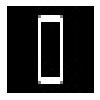

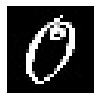

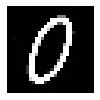

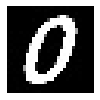

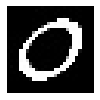

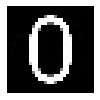

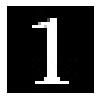

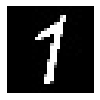

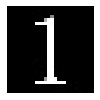

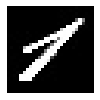

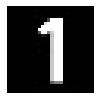

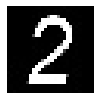

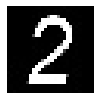

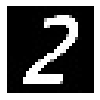

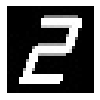

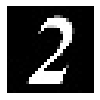

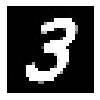

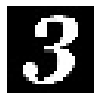

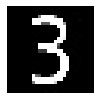

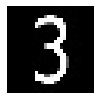

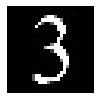

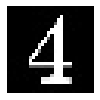

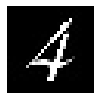

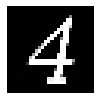

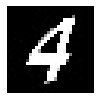

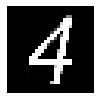

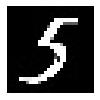

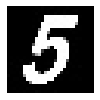

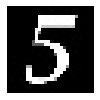

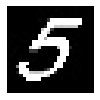

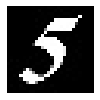

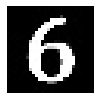

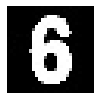

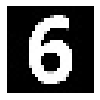

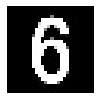

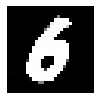

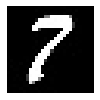

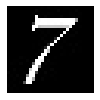

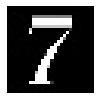

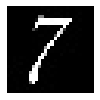

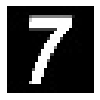

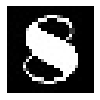

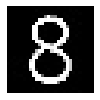

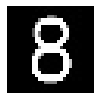

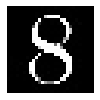

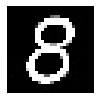

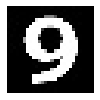

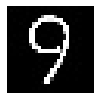

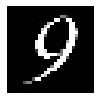

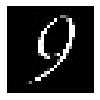

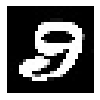

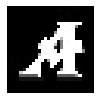

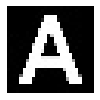

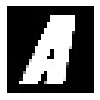

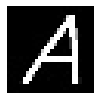

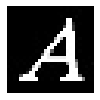

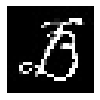

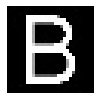

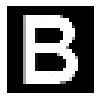

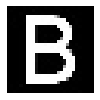

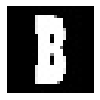

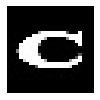

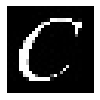

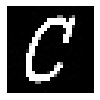

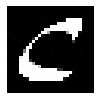

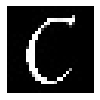

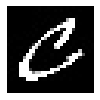

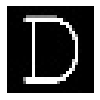

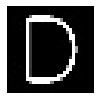

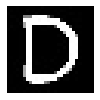

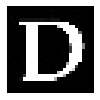

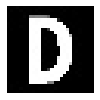

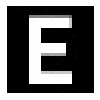

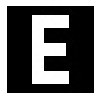

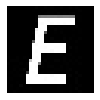

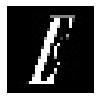

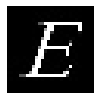

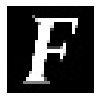

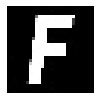

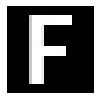

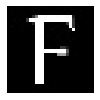

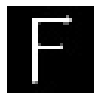

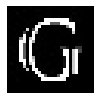

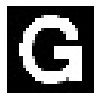

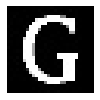

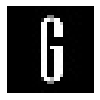

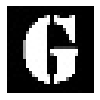

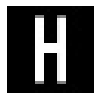

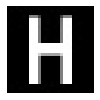

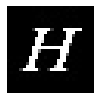

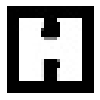

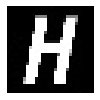

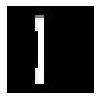

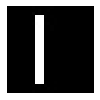

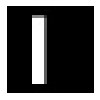

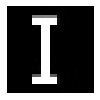

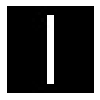

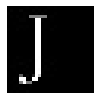

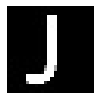

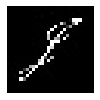

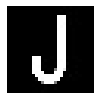

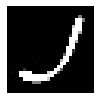

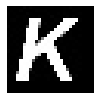

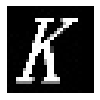

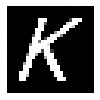

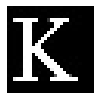

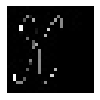

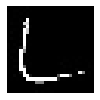

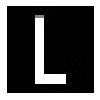

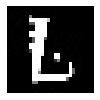

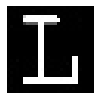

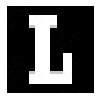

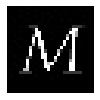

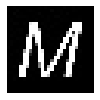

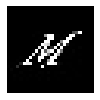

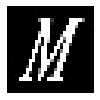

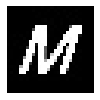

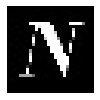

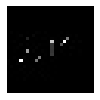

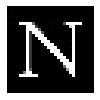

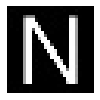

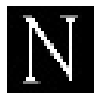

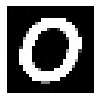

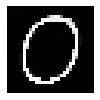

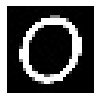

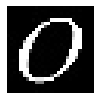

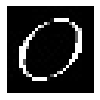

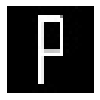

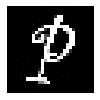

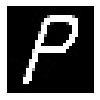

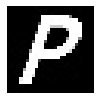

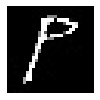

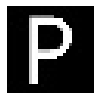

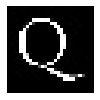

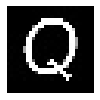

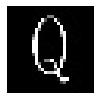

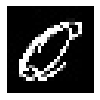

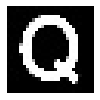

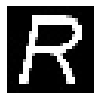

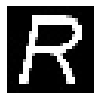

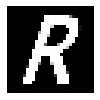

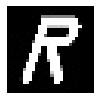

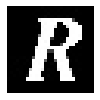

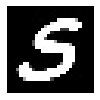

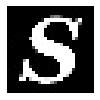

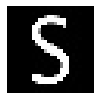

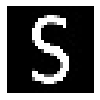

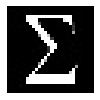

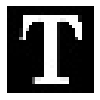

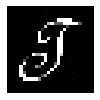

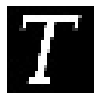

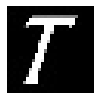

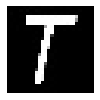

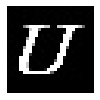

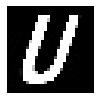

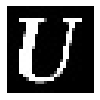

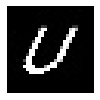

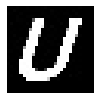

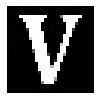

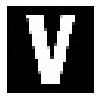

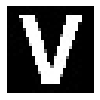

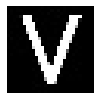

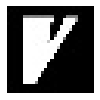

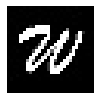

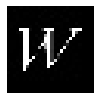

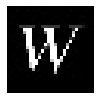

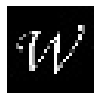

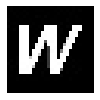

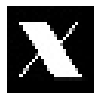

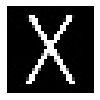

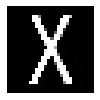

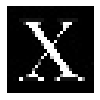

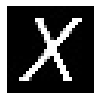

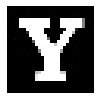

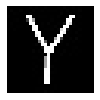

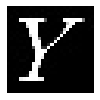

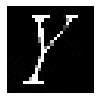

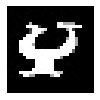

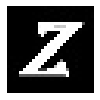

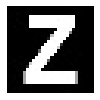

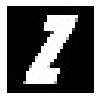

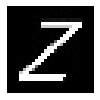

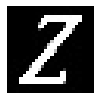

In [4]:
#Visulize the data
# for i in range(0,36575,200):
#     fig = plt.figure()
#     ax1 = fig.add_axes([0.1, 0.1, 0.2, 0.8])
#     ax1.set_axis_off()
#     ax1.imshow(data[i],cmap="gray")
#     fig.show()

In [2]:
def plot_images(img1, img2, title1="", title2=""):
    fig = plt.figure(figsize=[15,15])
    ax1 = fig.add_subplot(121)
    ax1.imshow(img1, cmap="gray")
    ax1.set(xticks=[], yticks=[], title=title1)

    ax2 = fig.add_subplot(122)
    ax2.imshow(img2, cmap="gray")
    ax2.set(xticks=[], yticks=[], title=title2)

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


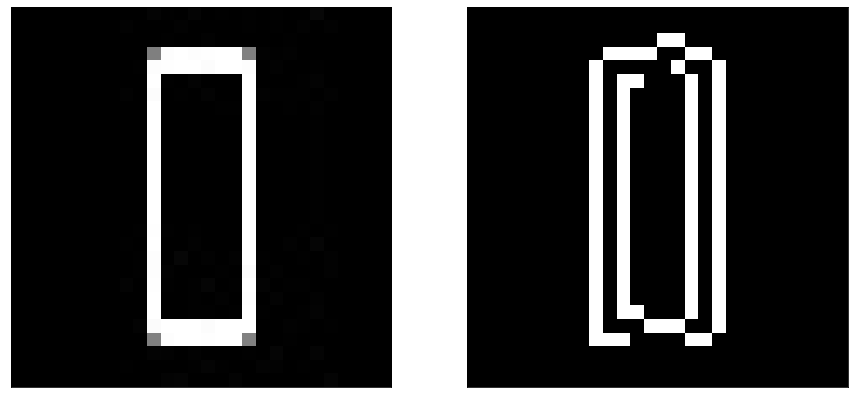

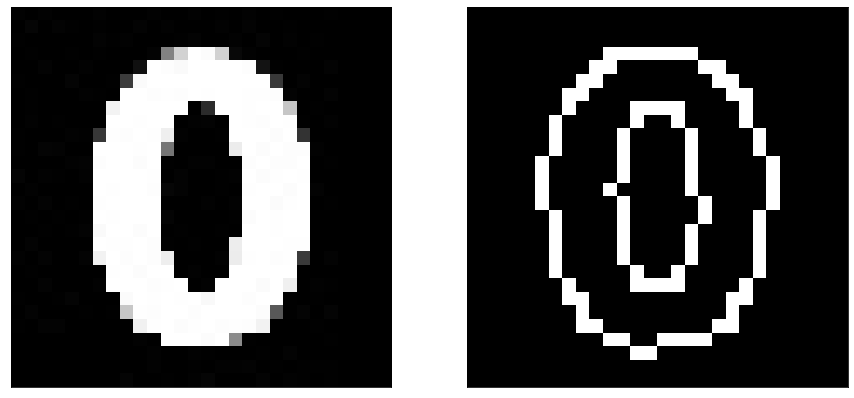

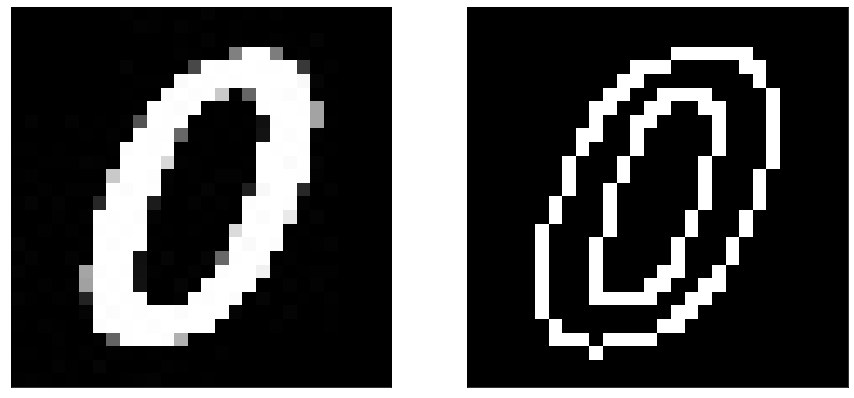

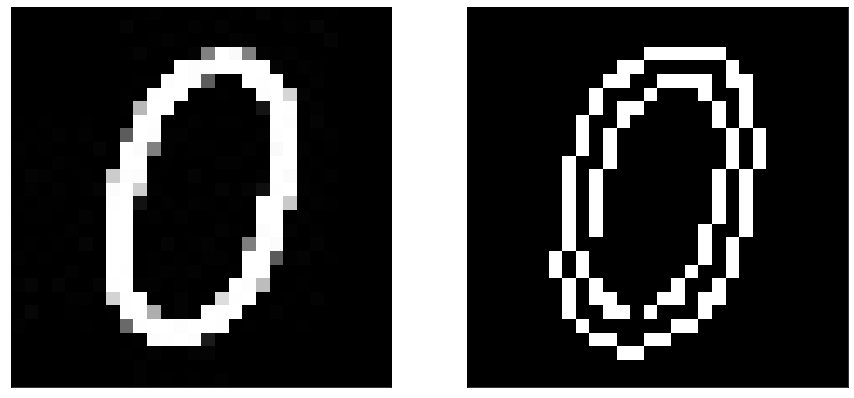

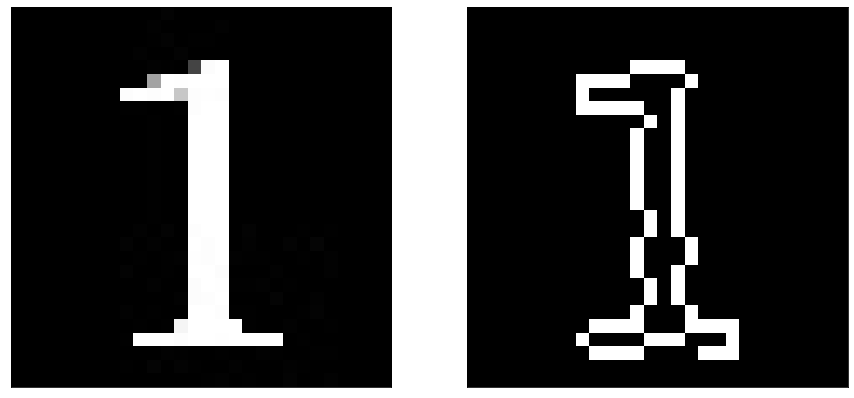

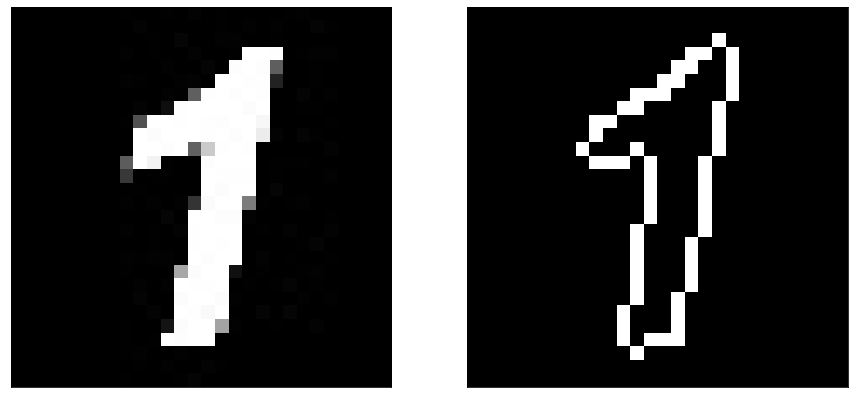

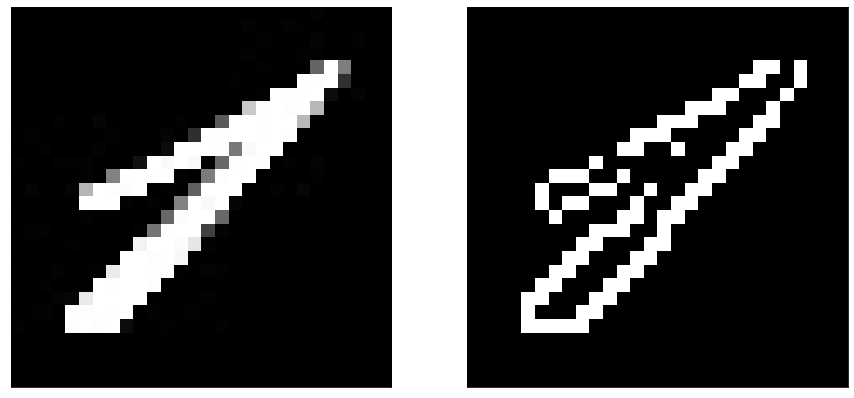

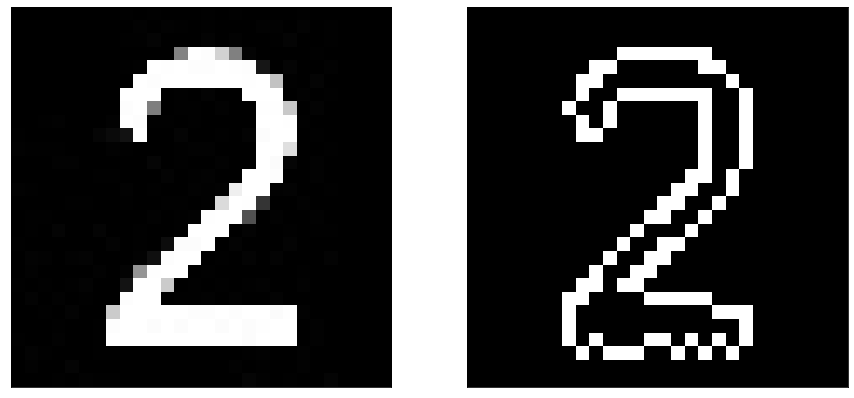

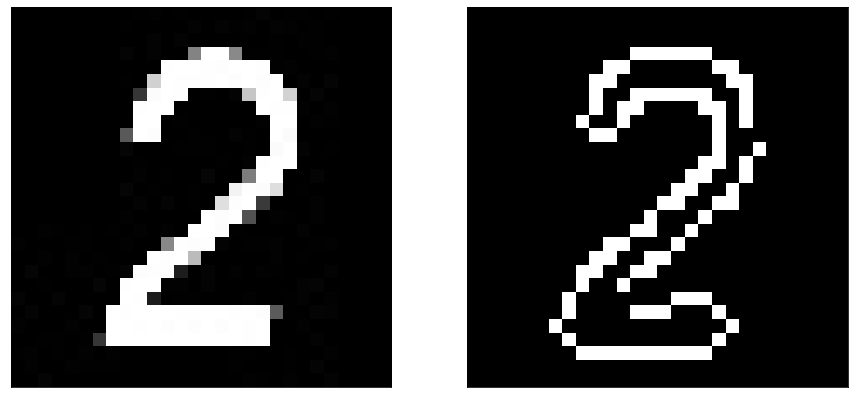

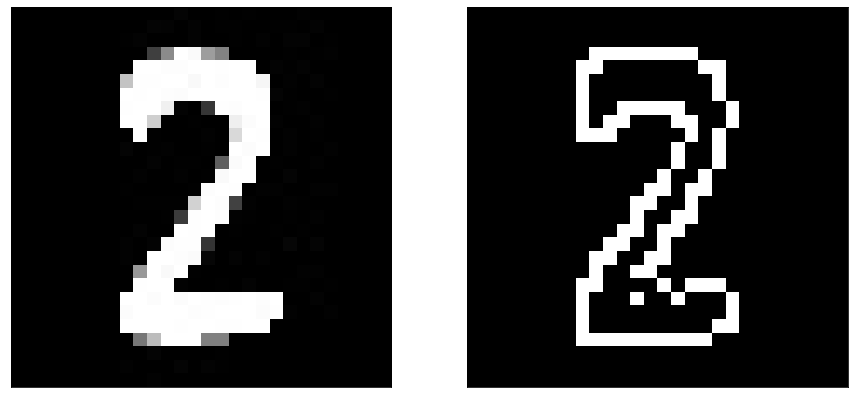

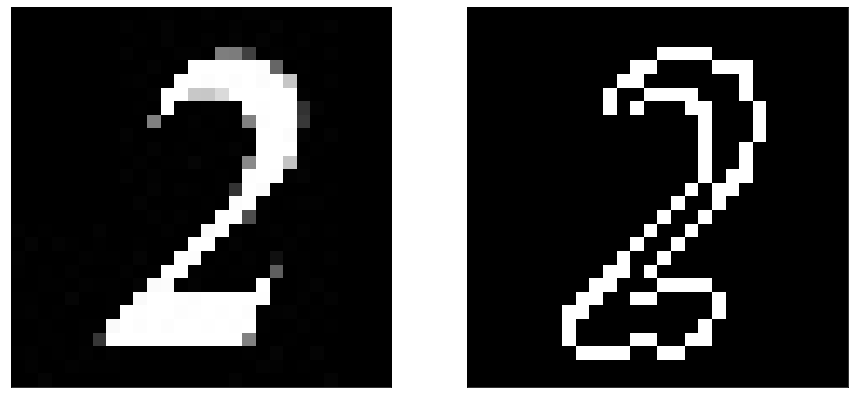

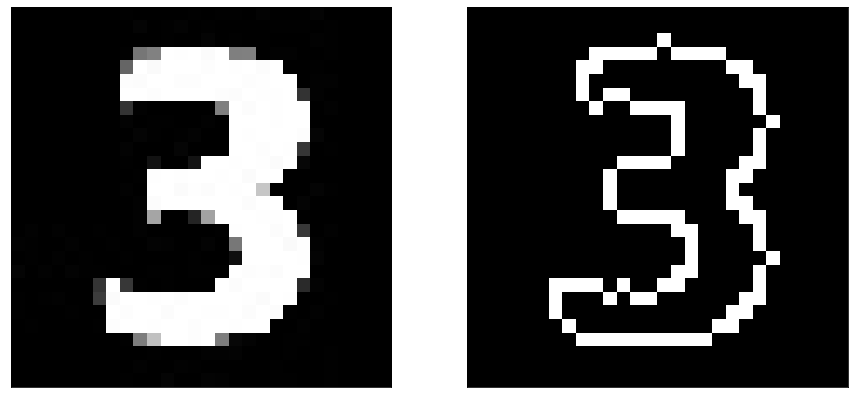

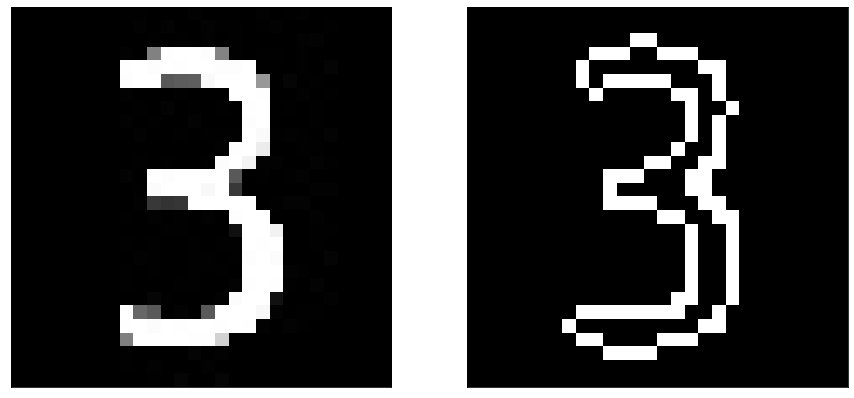

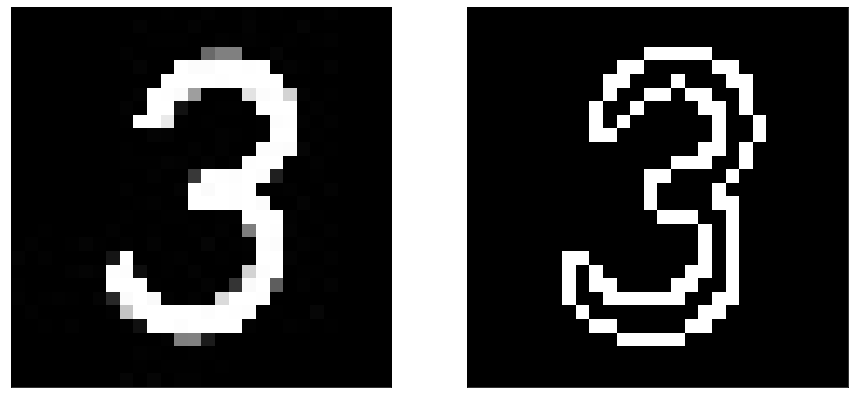

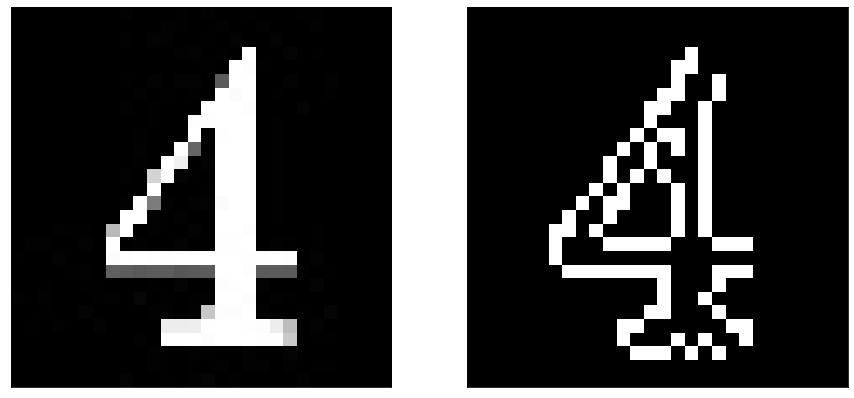

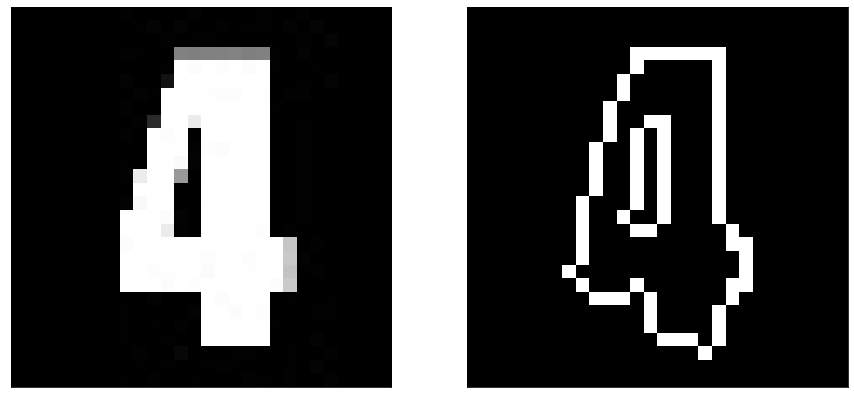

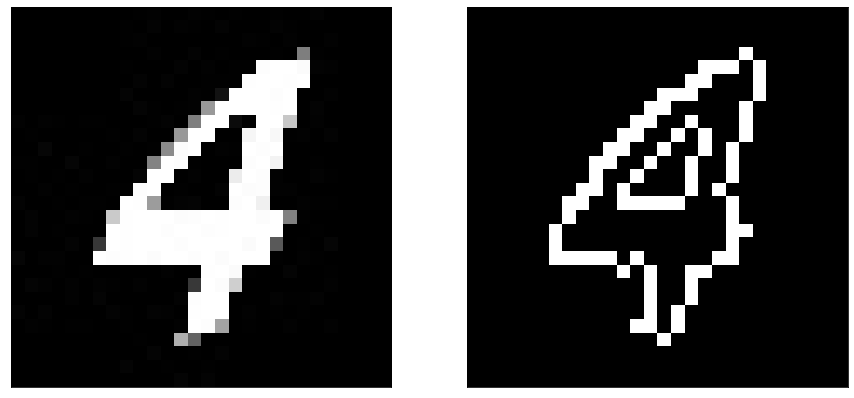

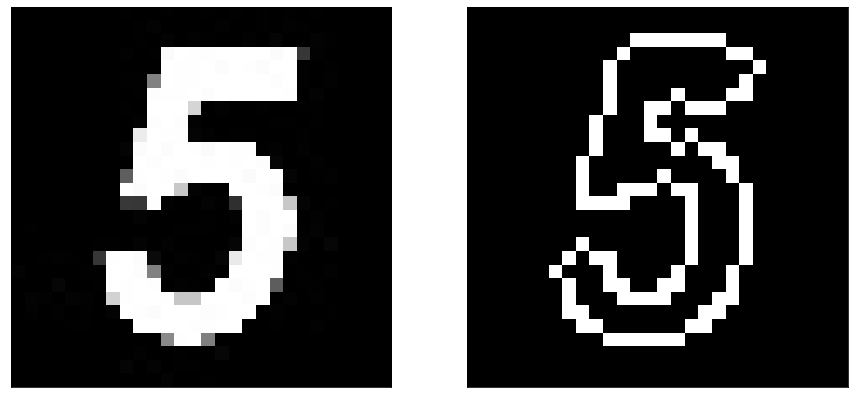

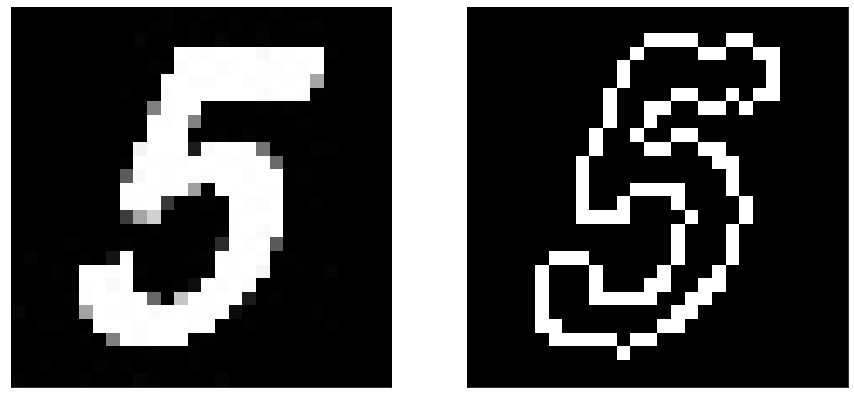

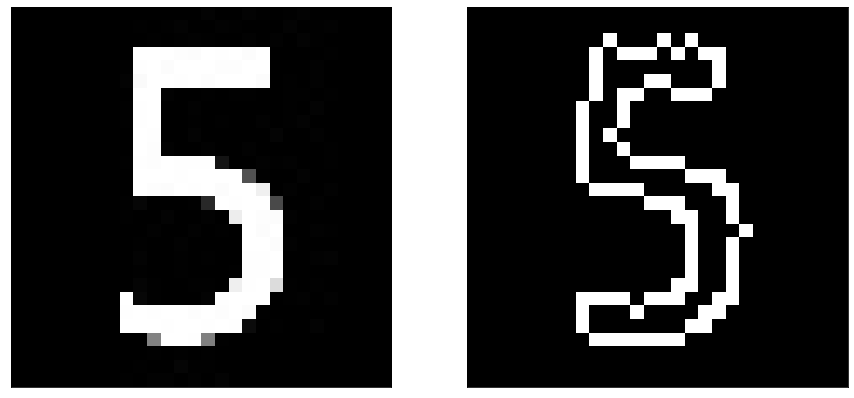

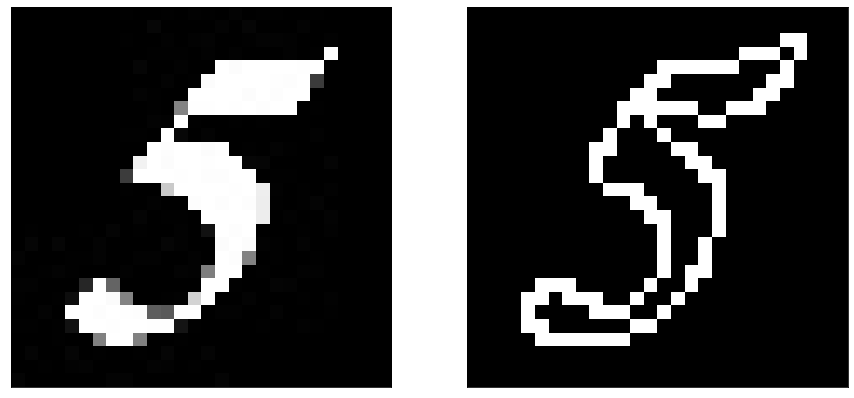

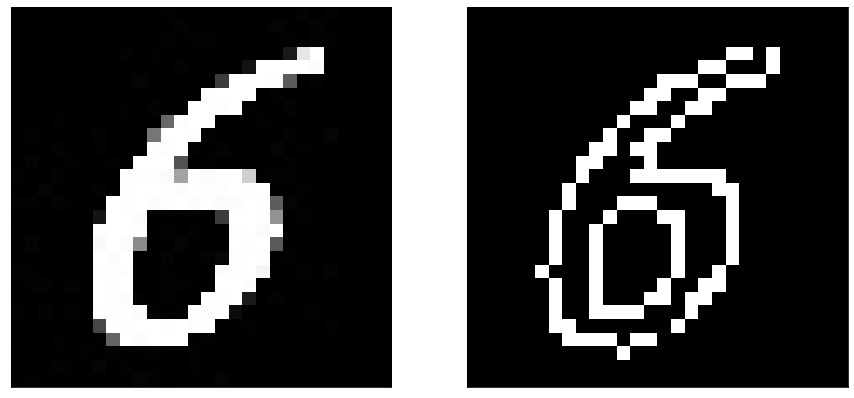

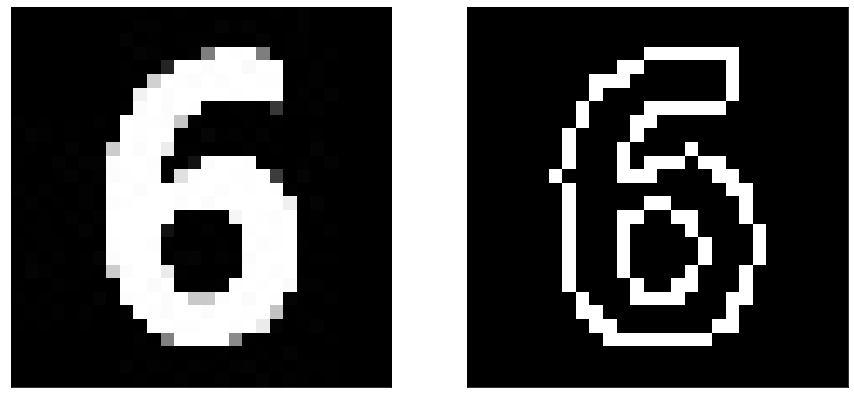

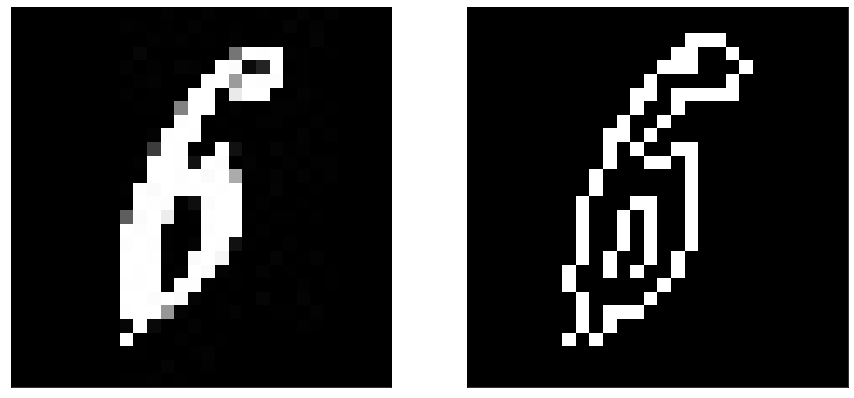

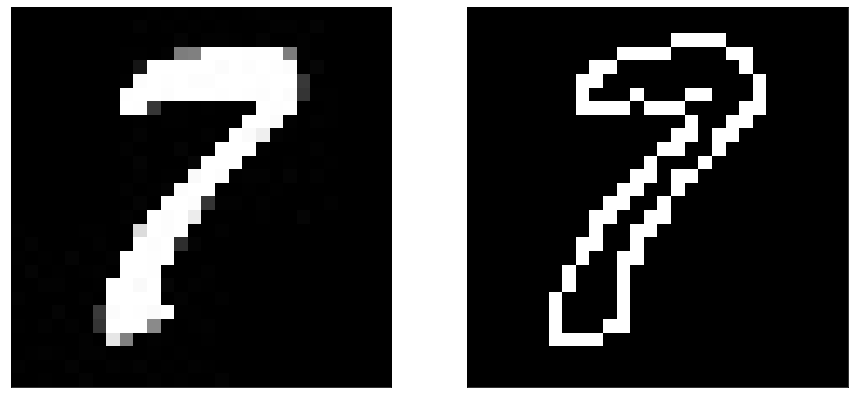

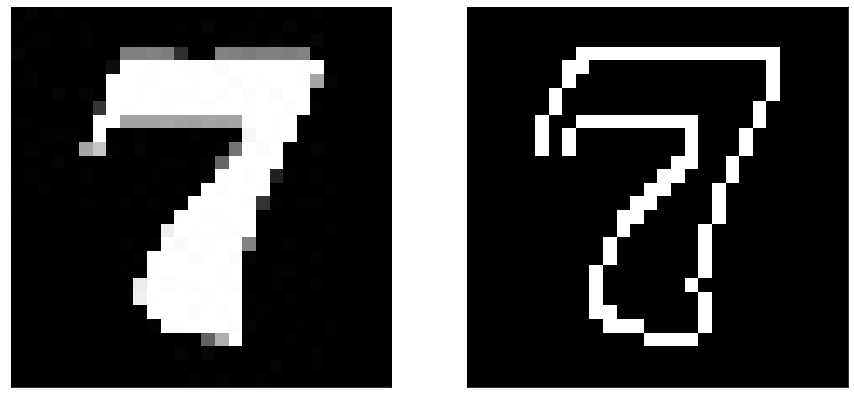

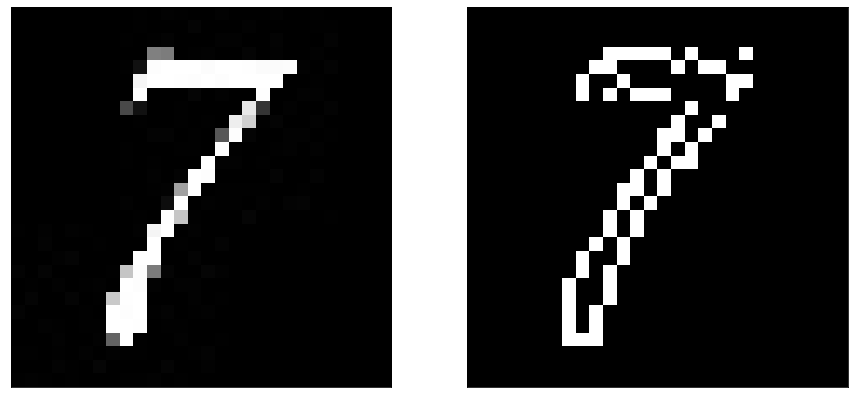

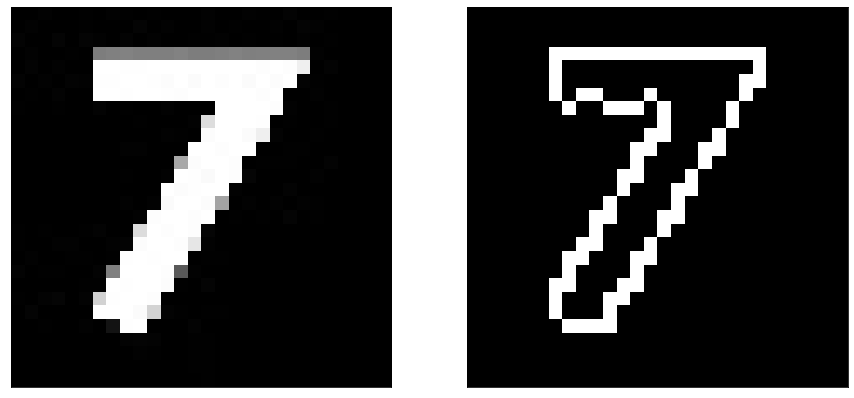

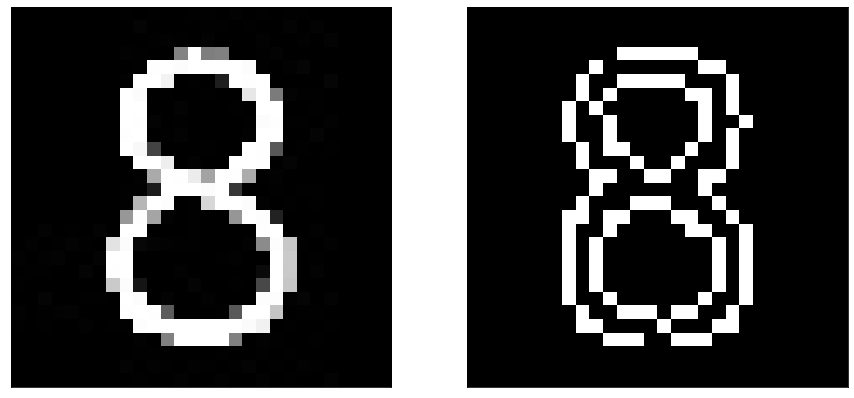

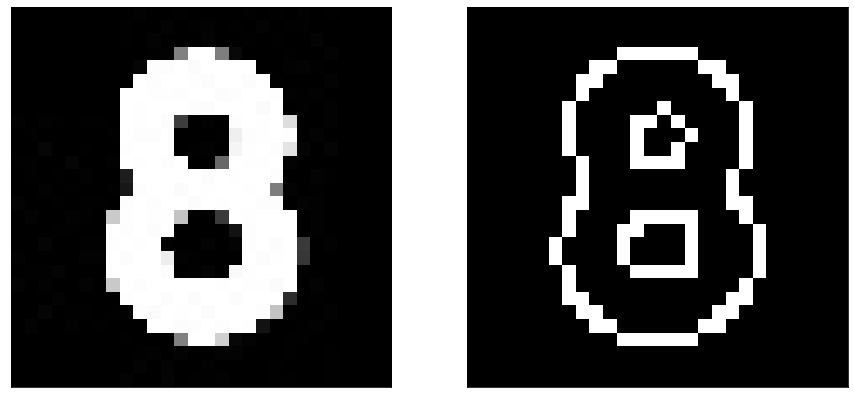

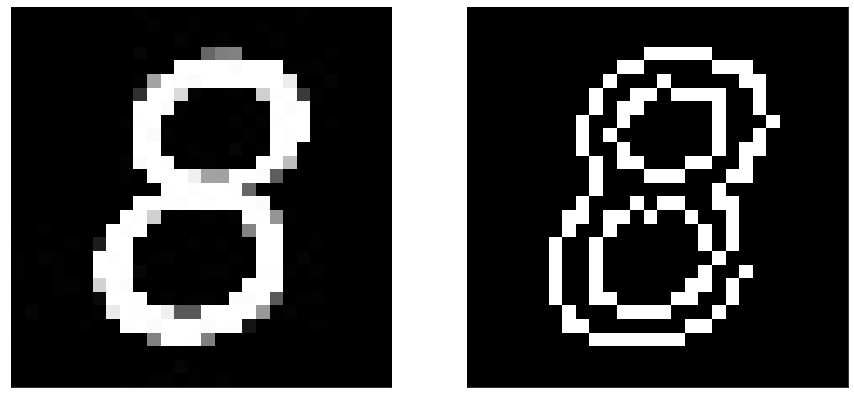

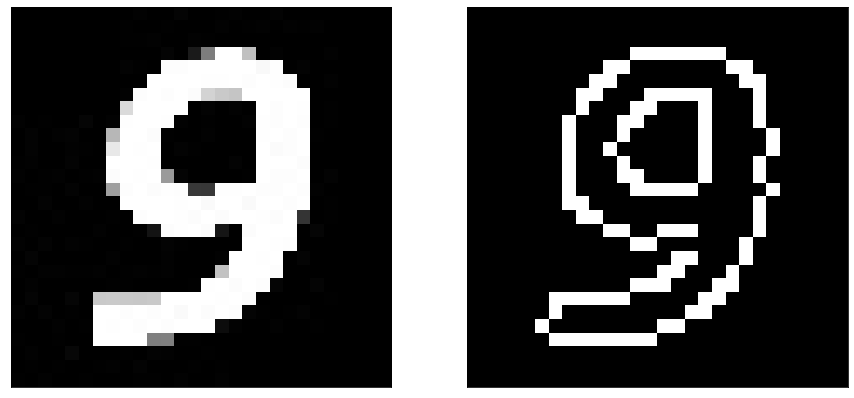

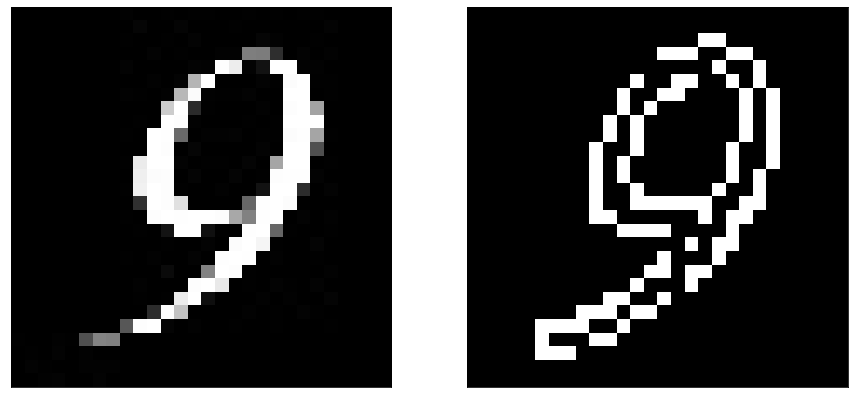

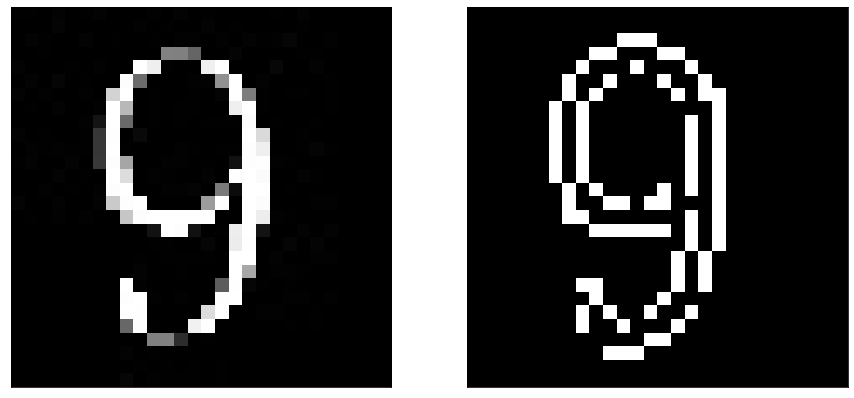

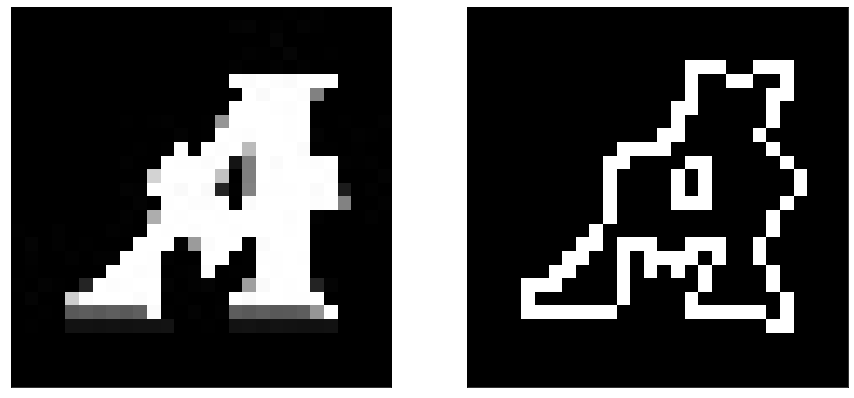

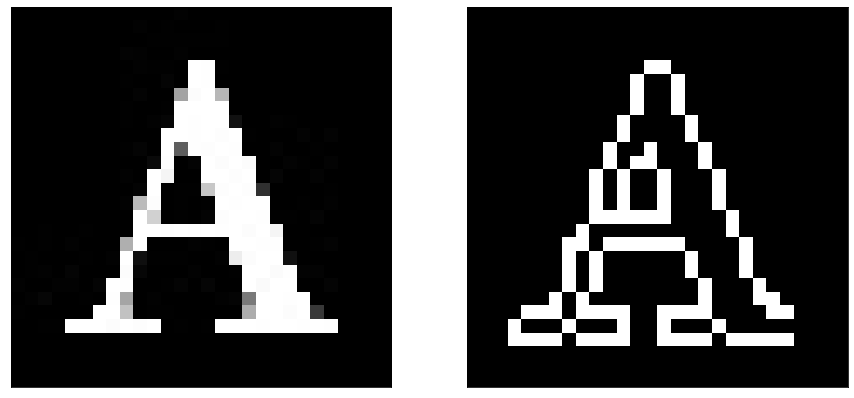

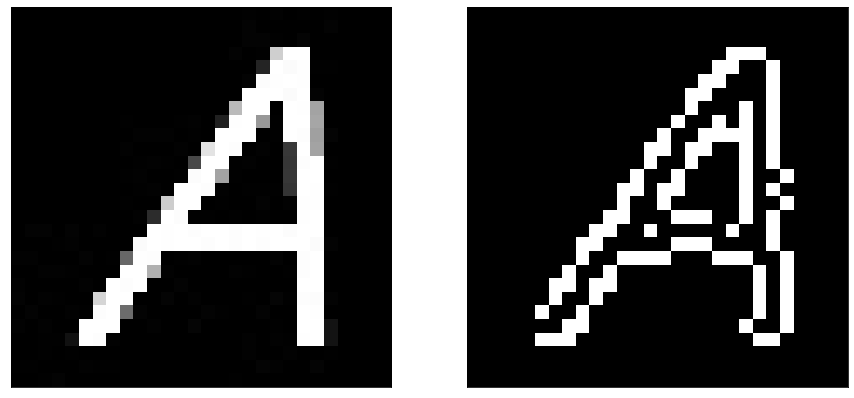

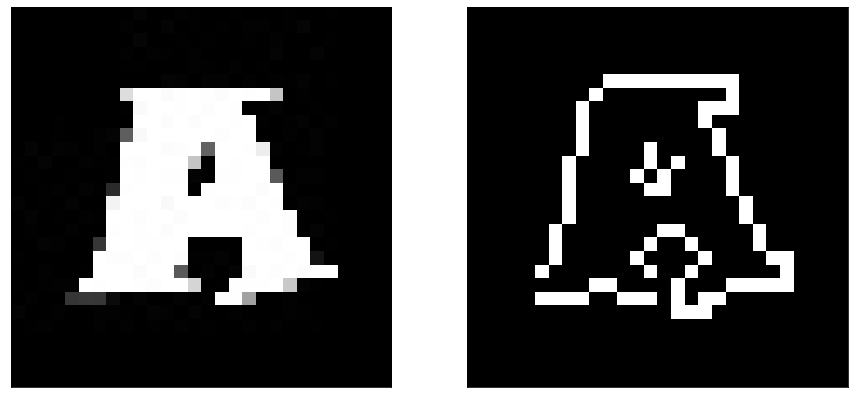

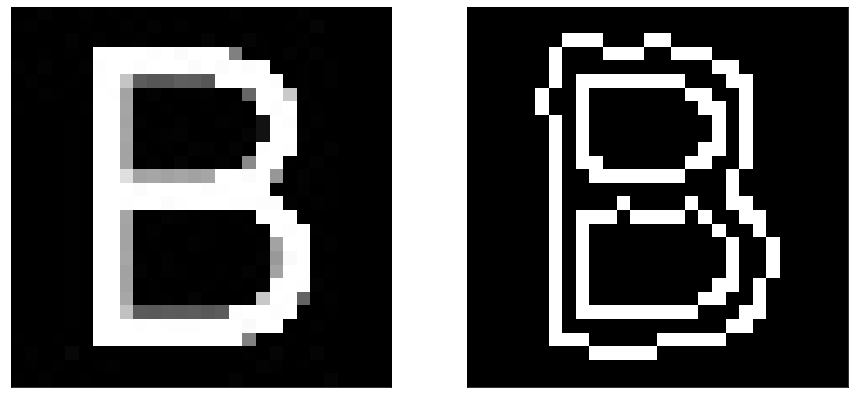

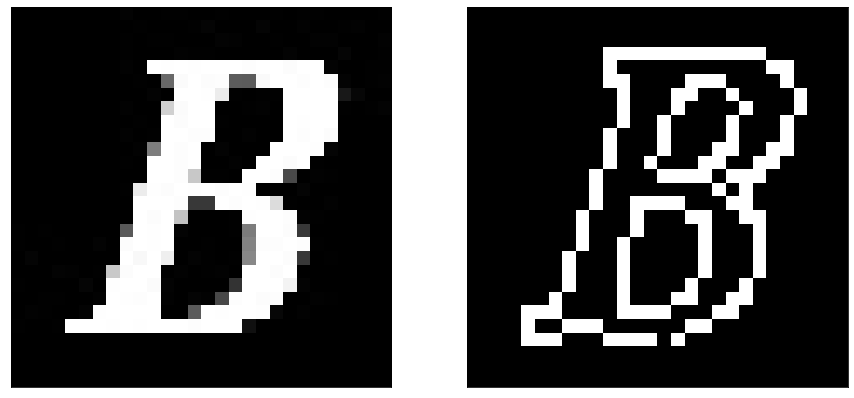

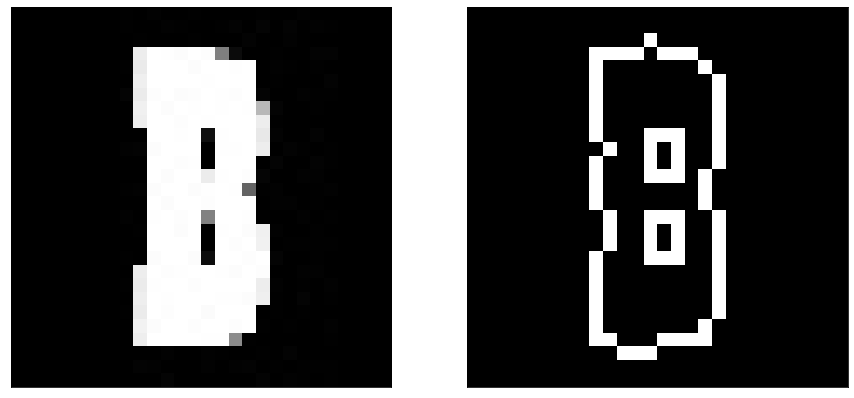

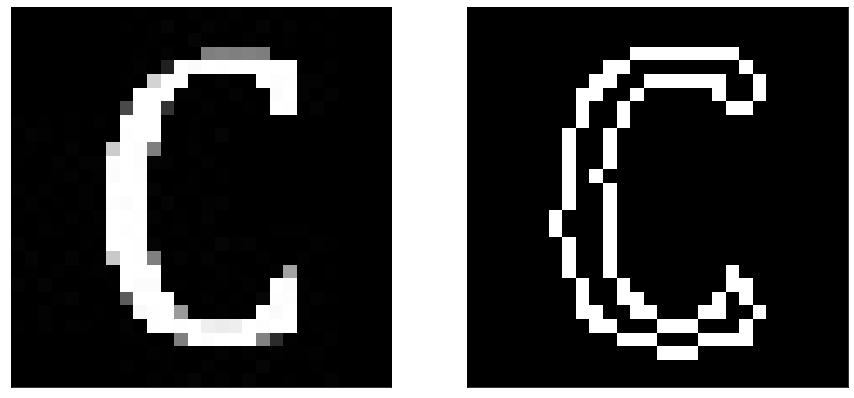

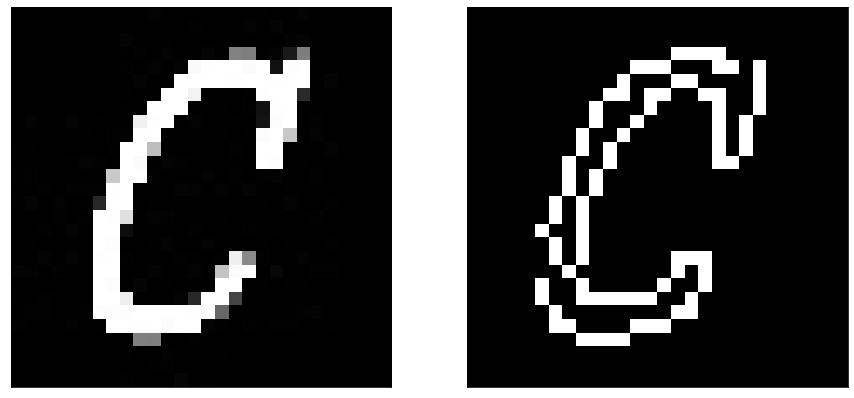

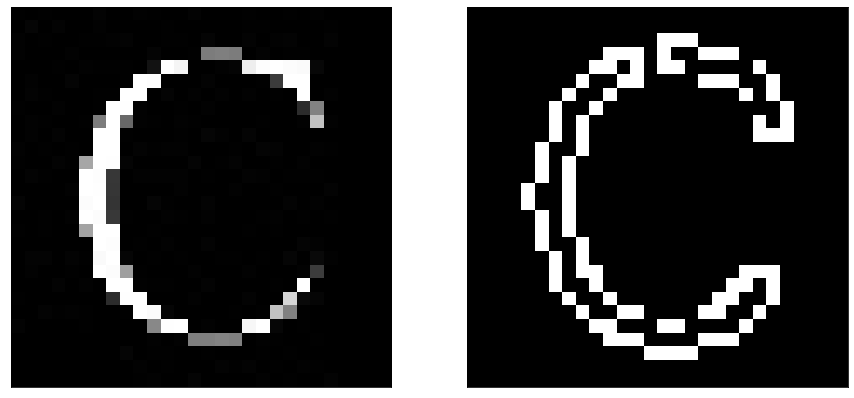

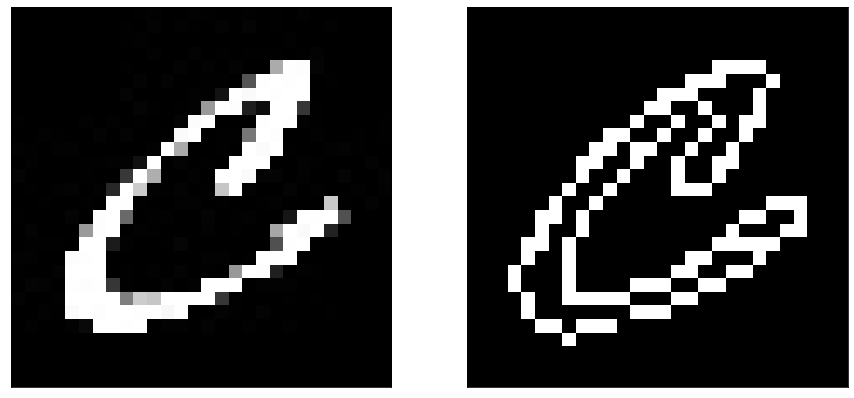

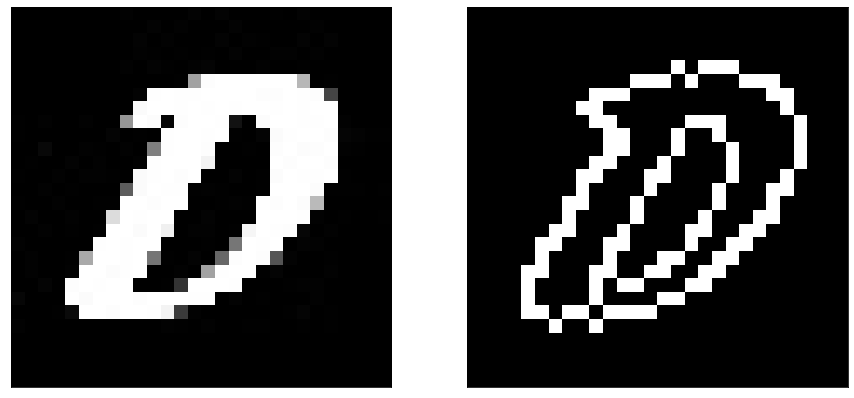

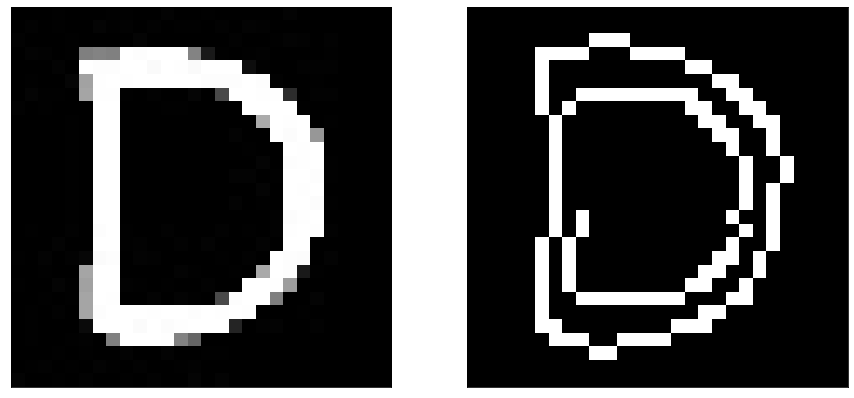

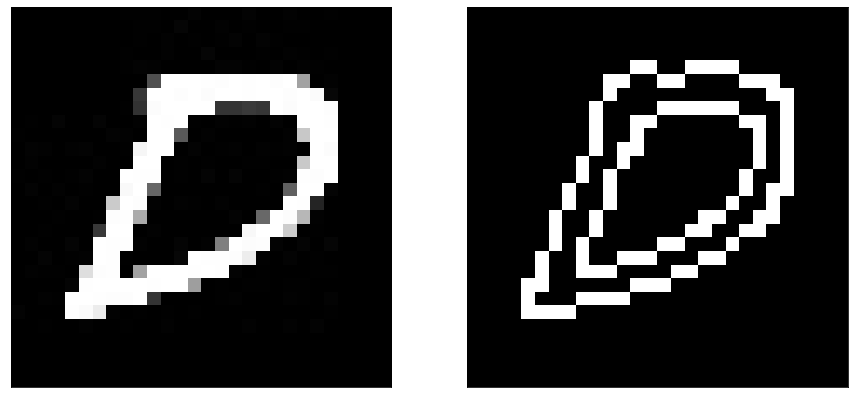

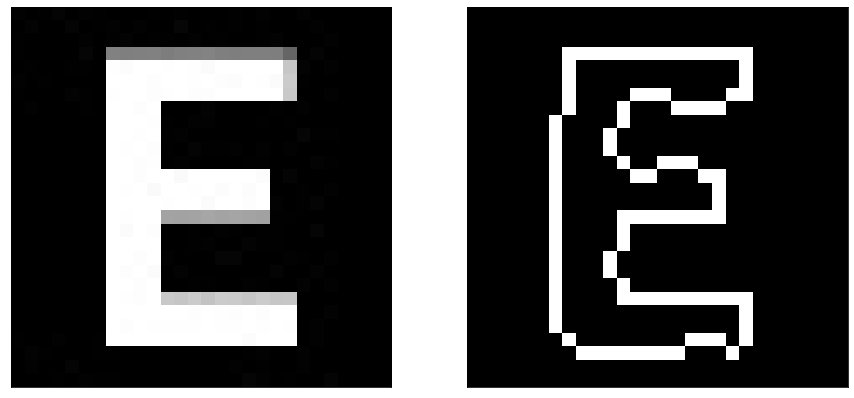

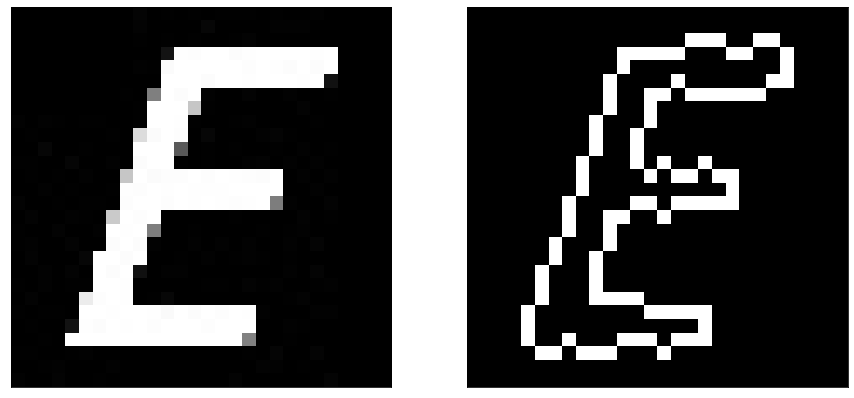

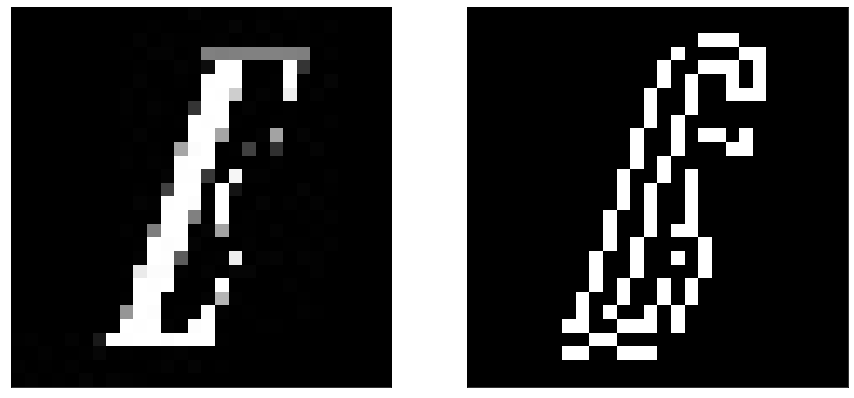

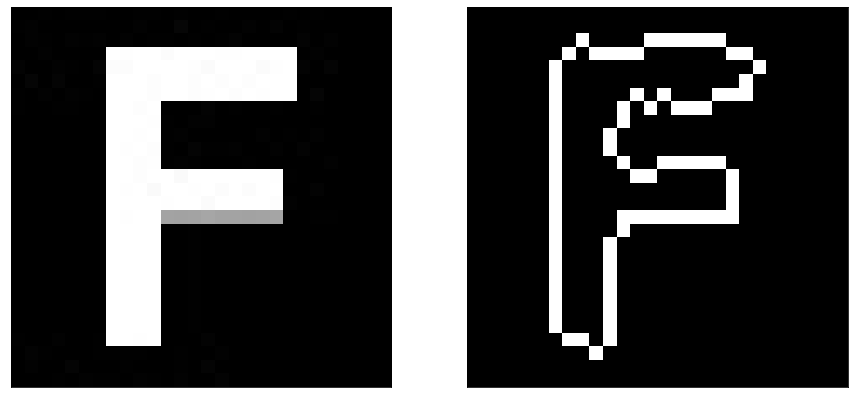

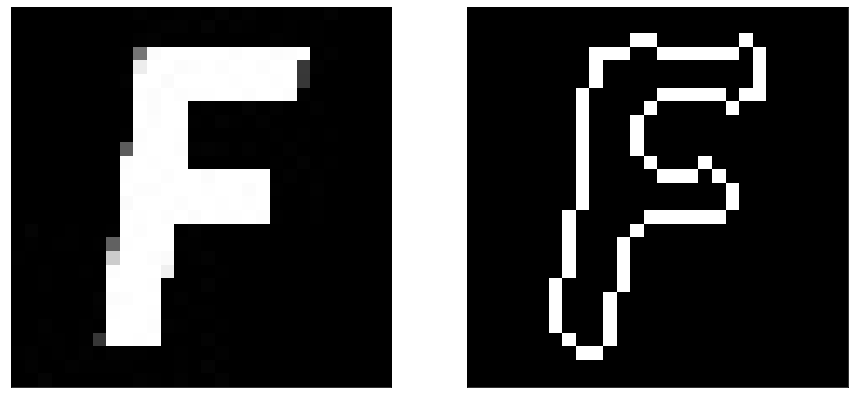

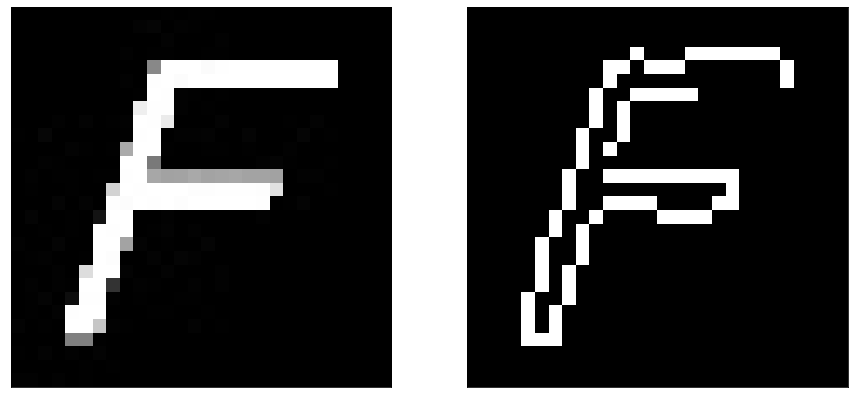

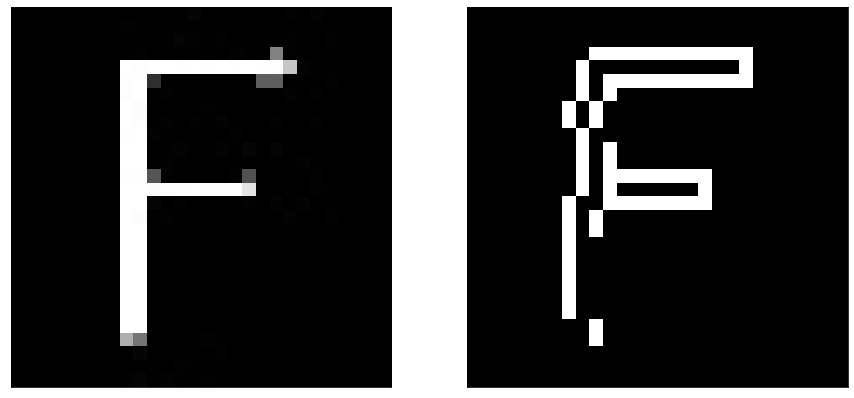

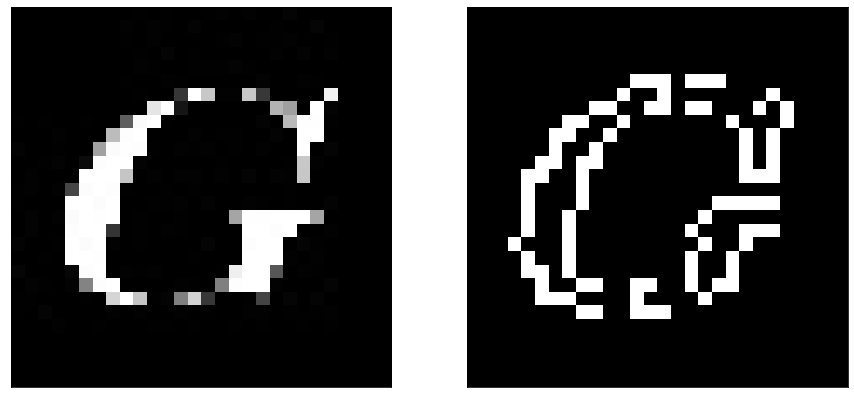

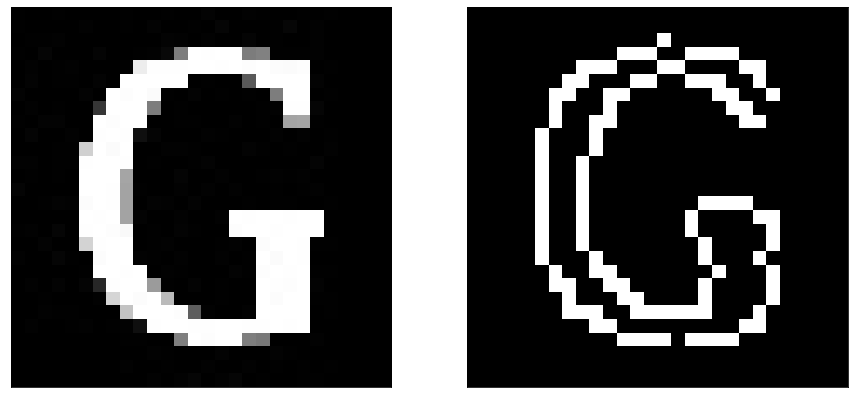

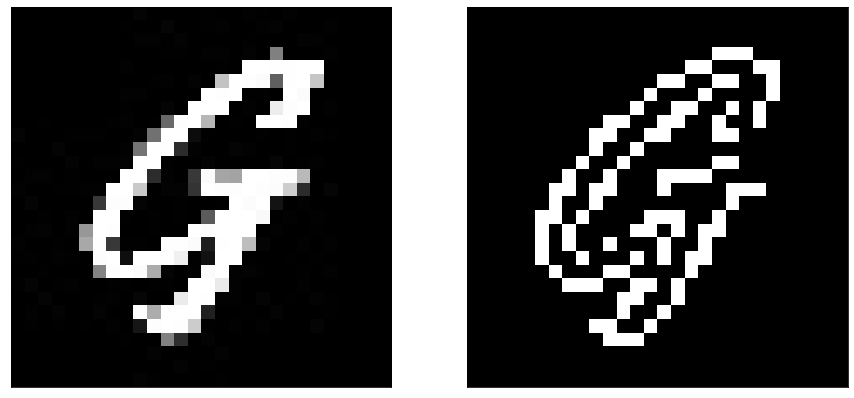

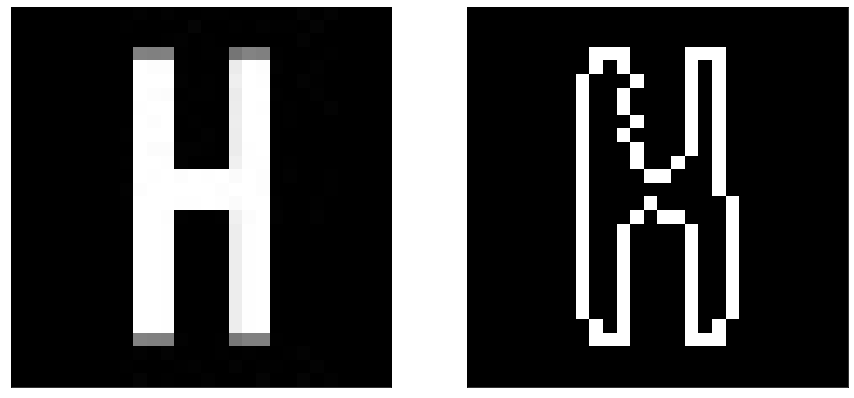

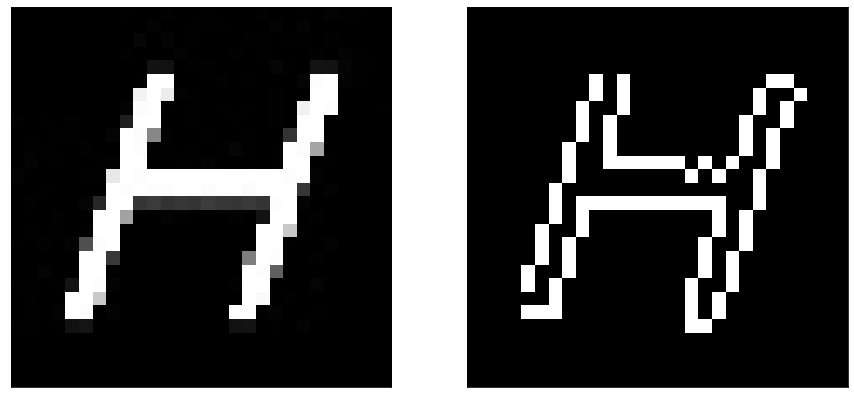

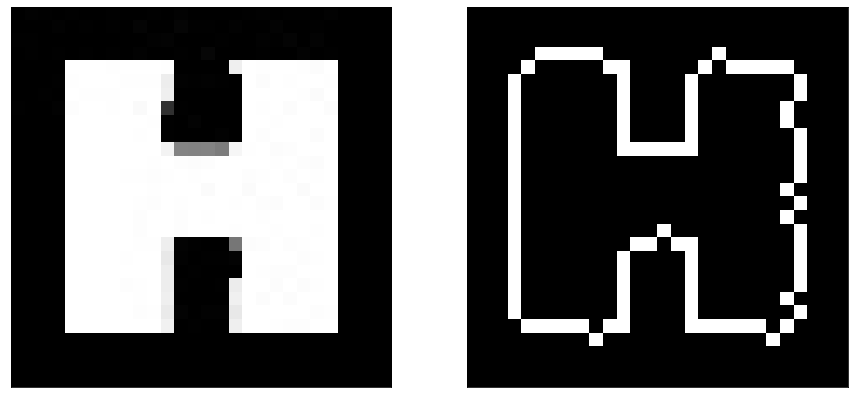

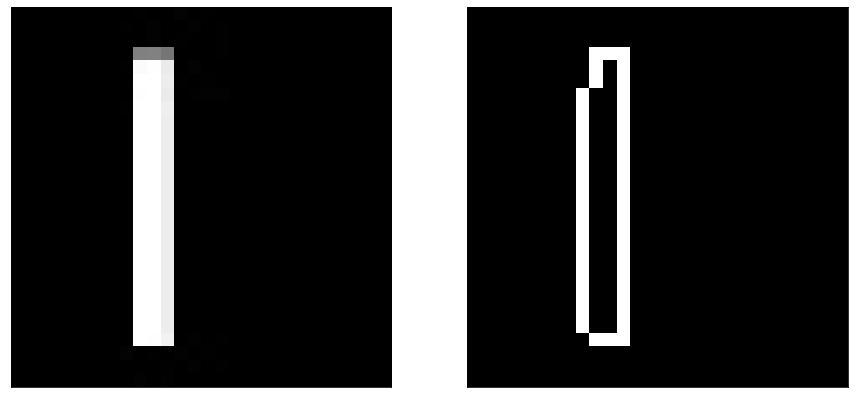

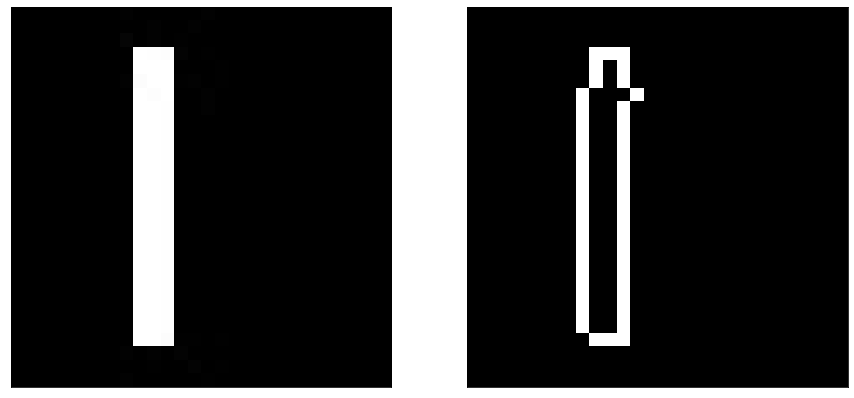

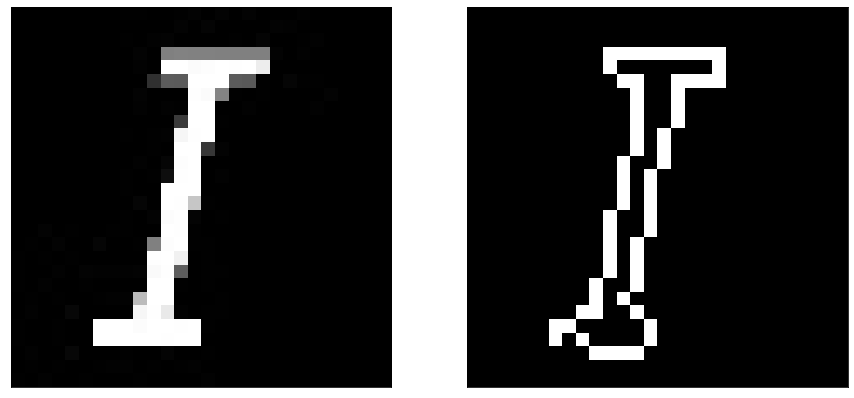

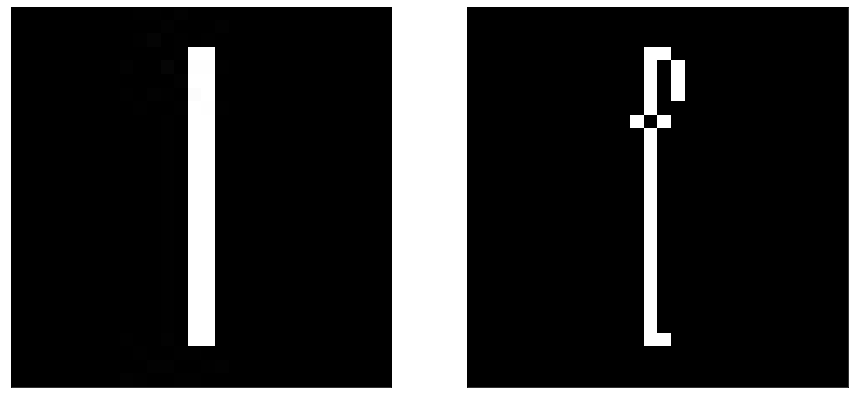

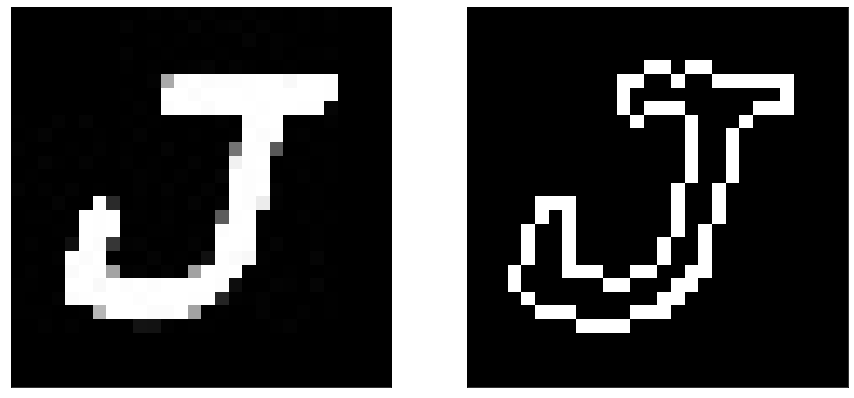

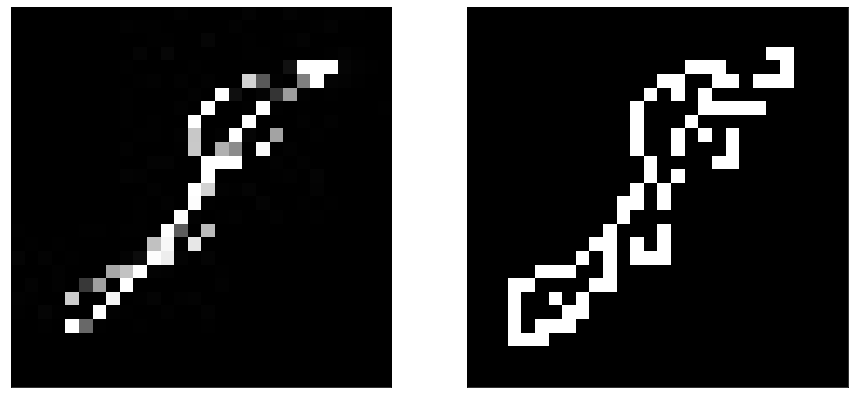

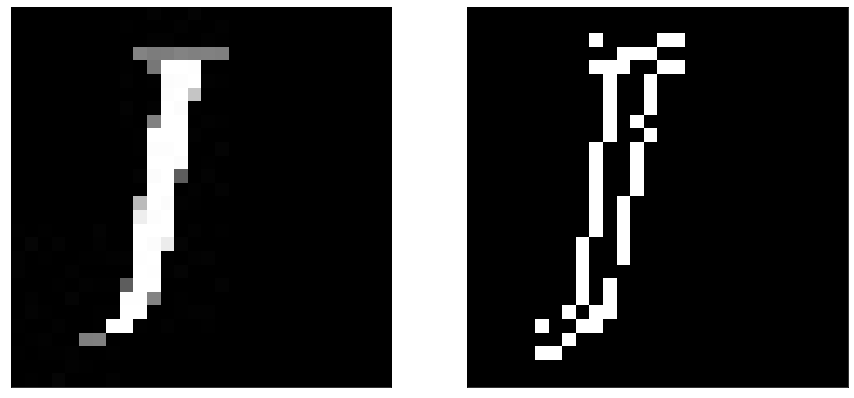

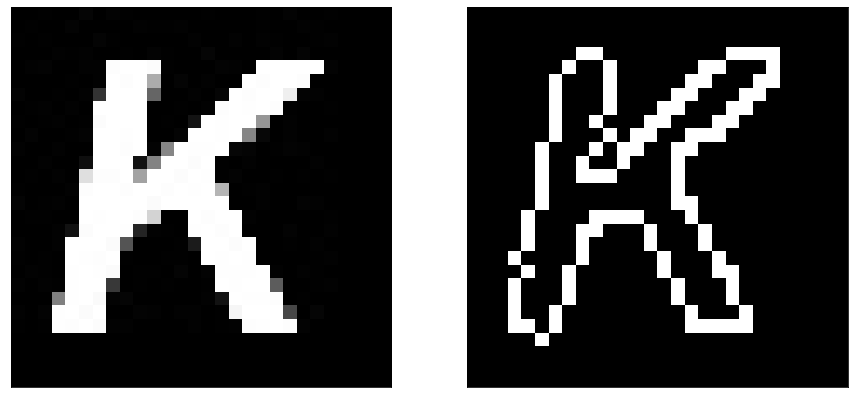

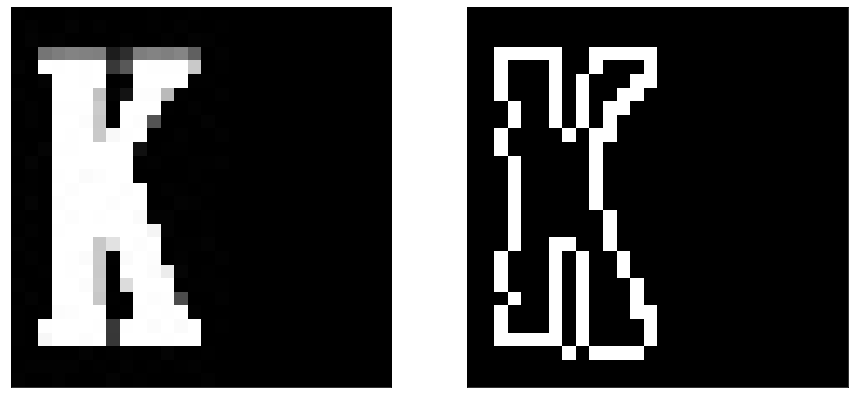

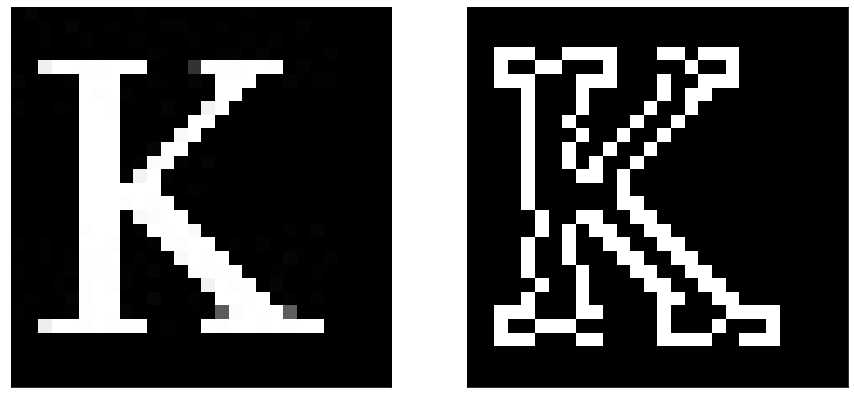

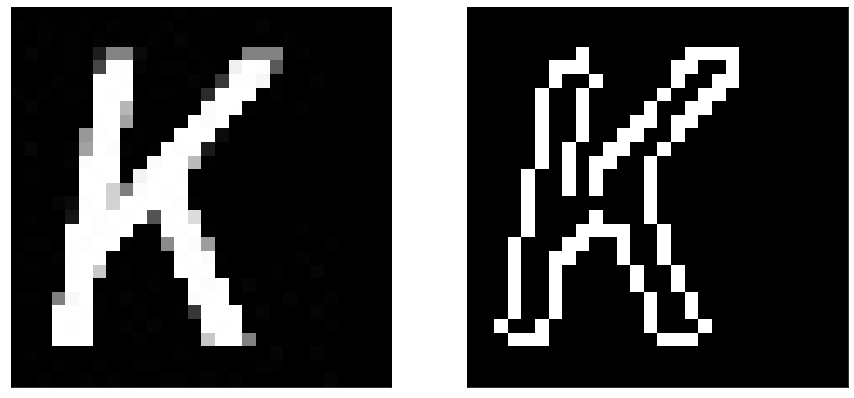

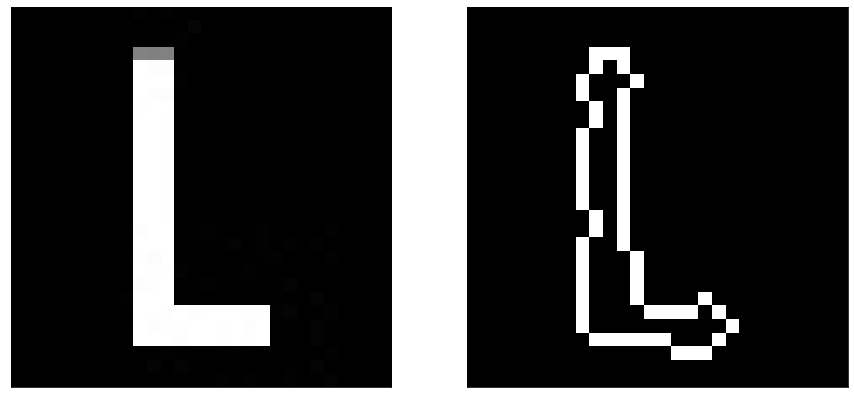

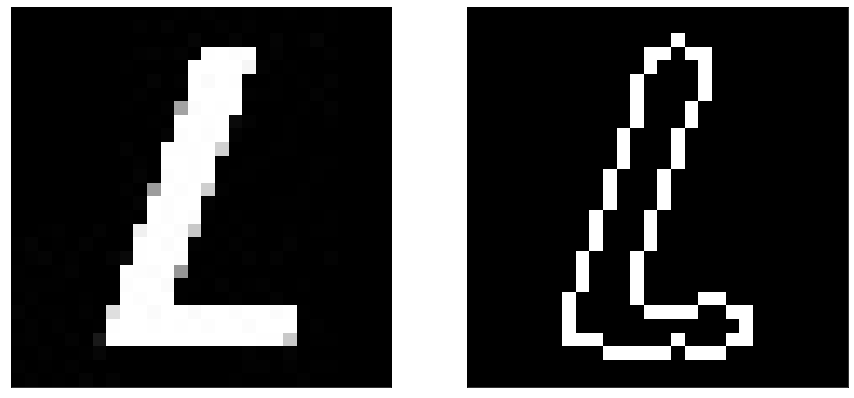

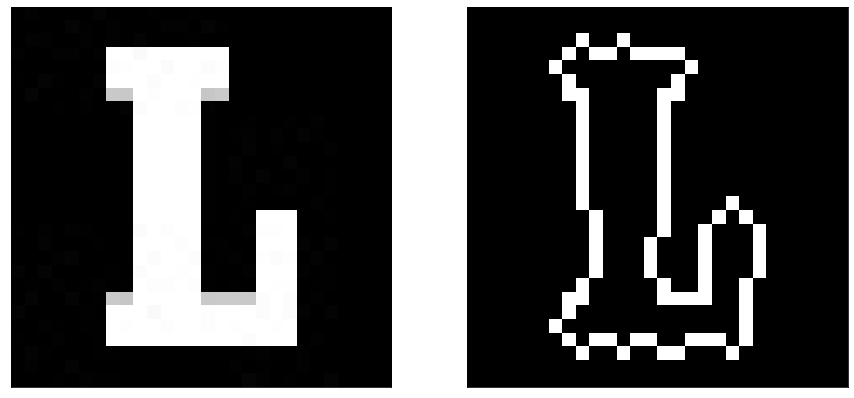

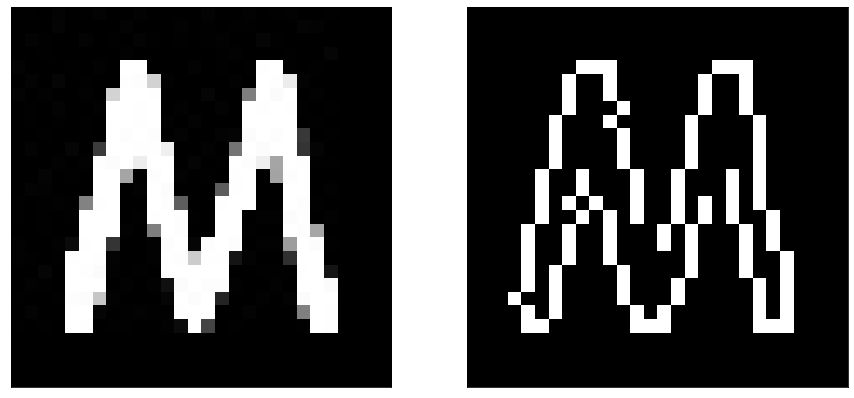

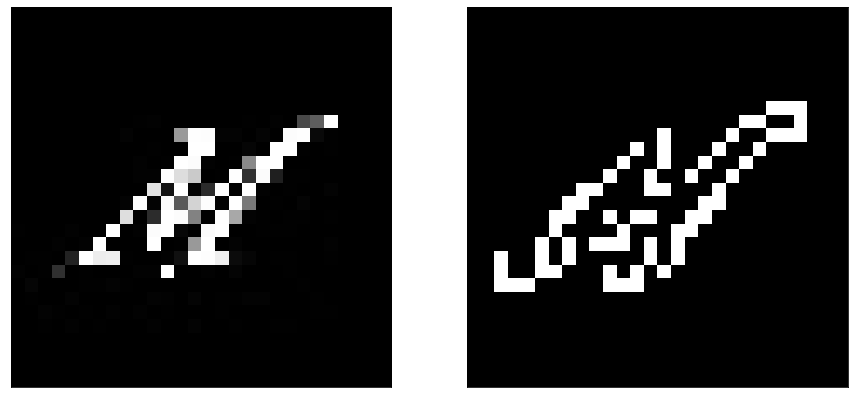

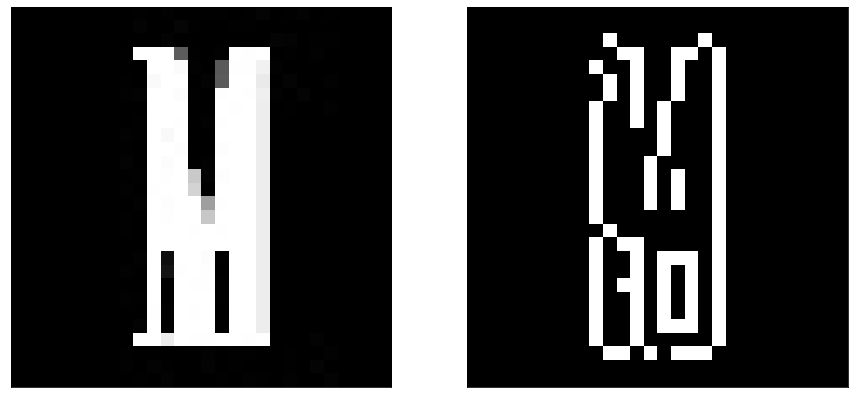

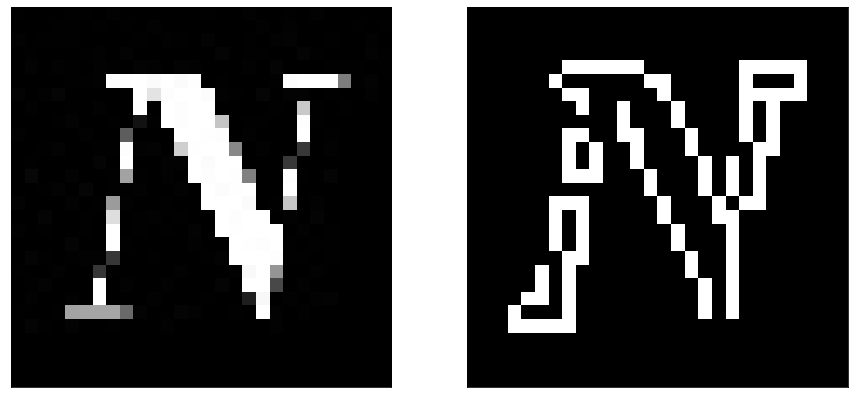

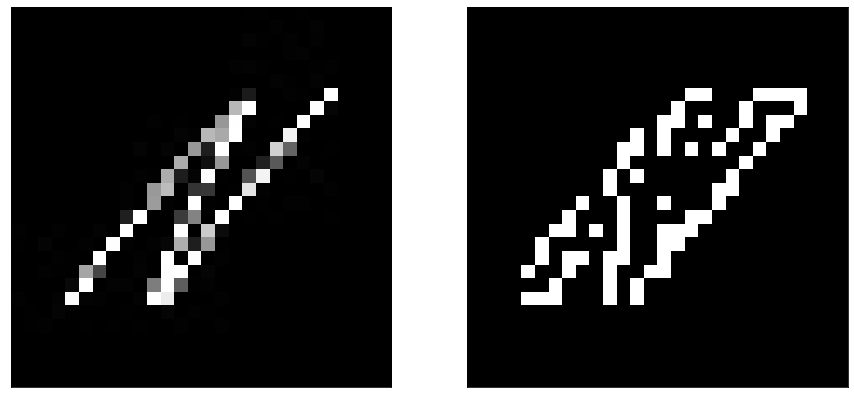

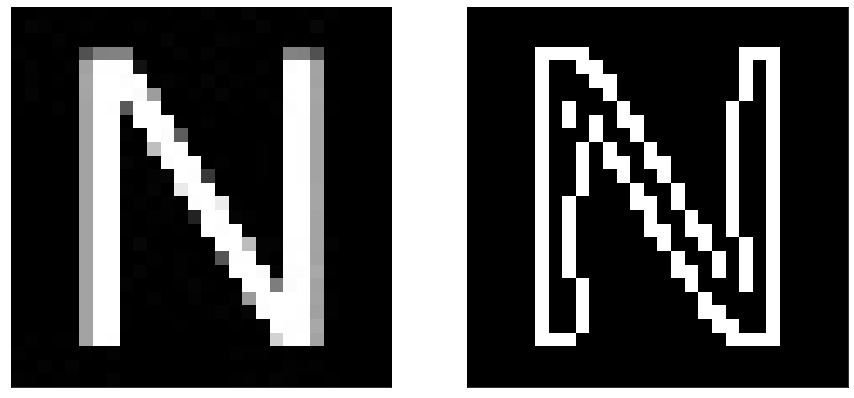

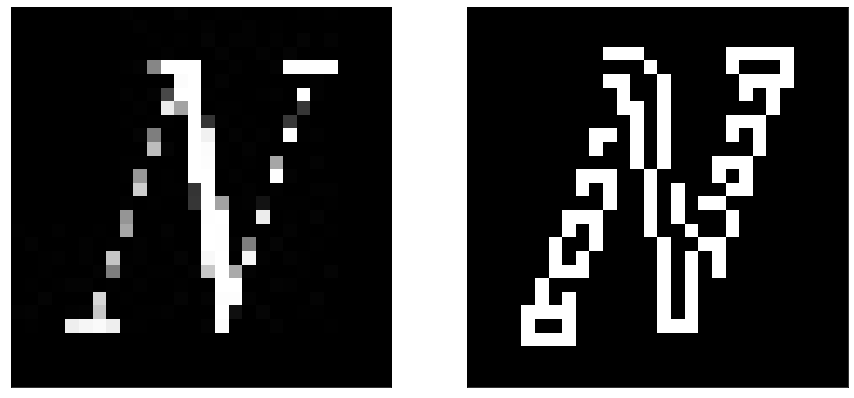

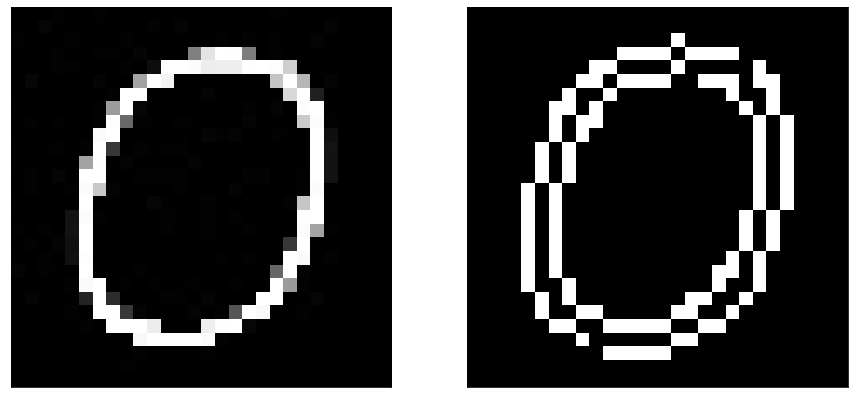

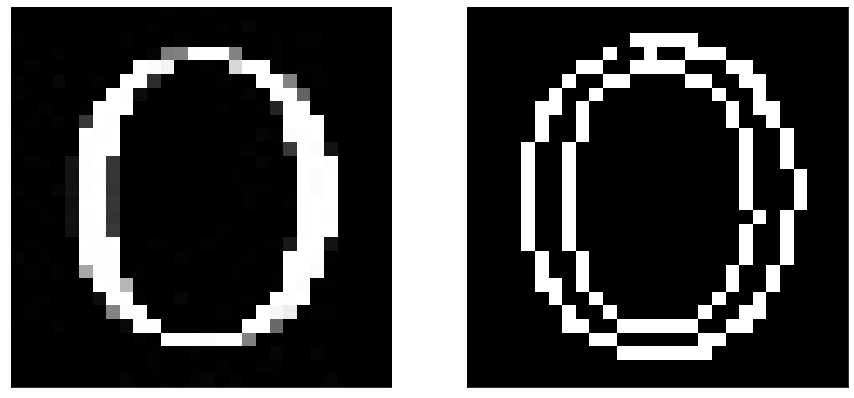

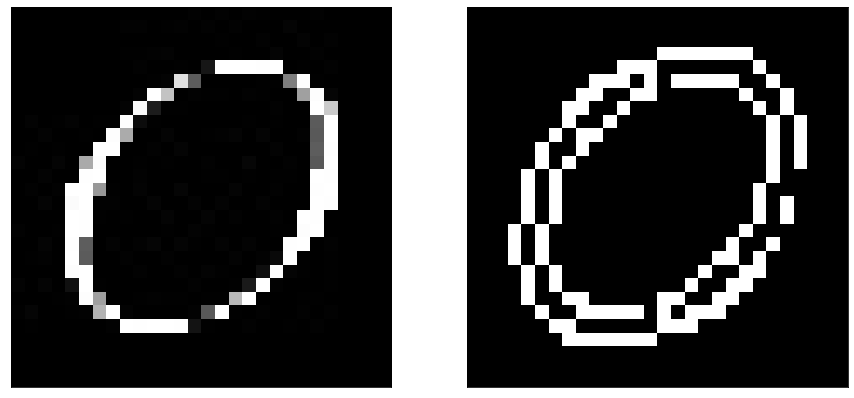

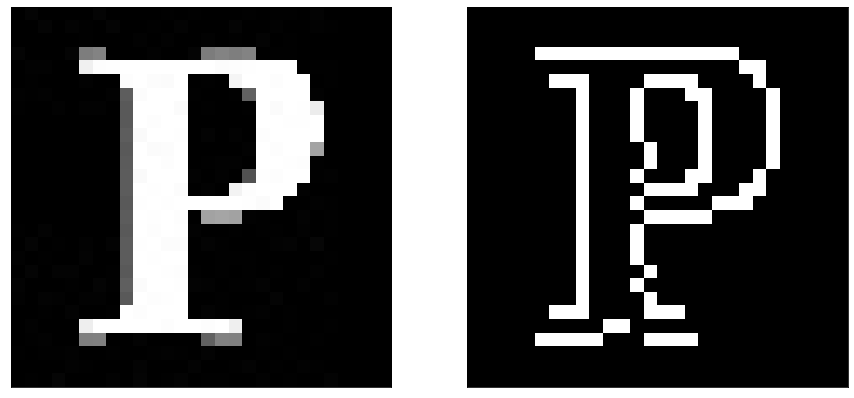

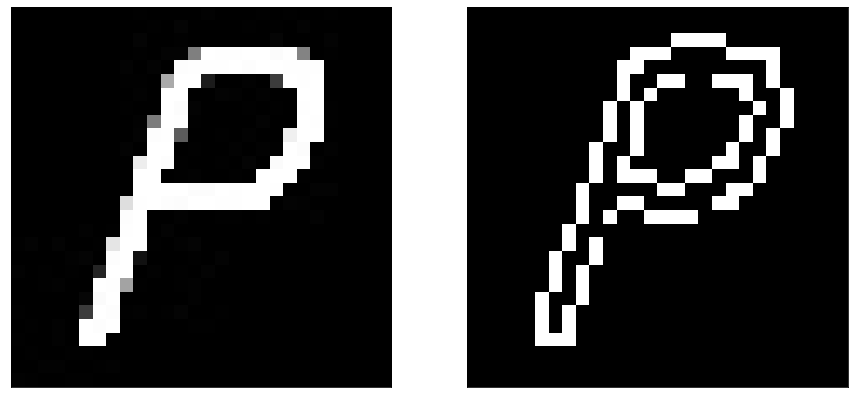

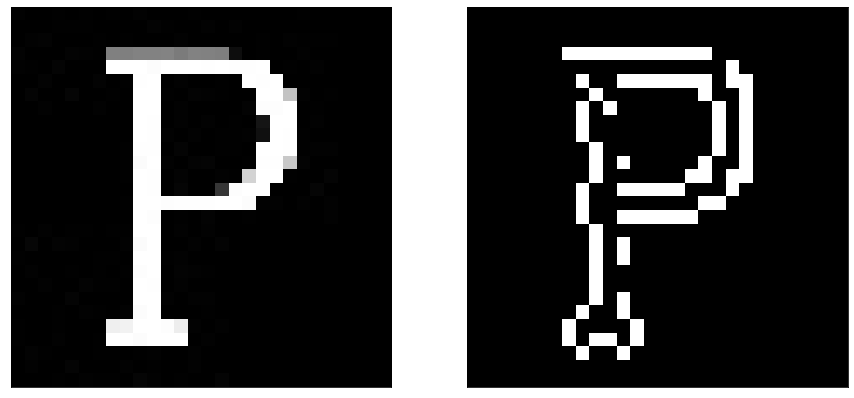

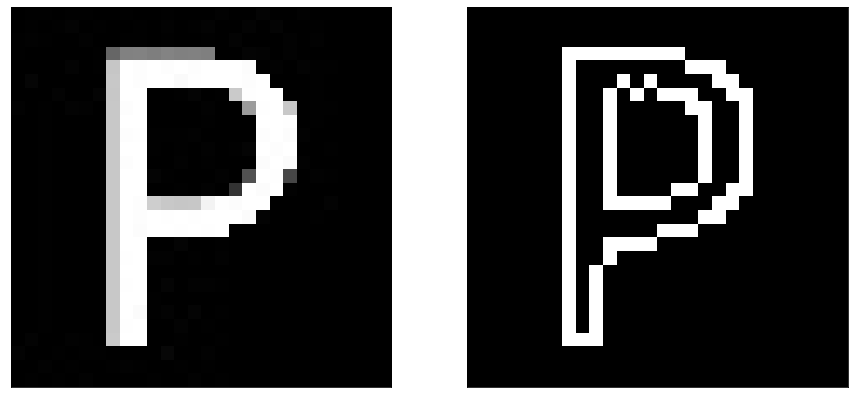

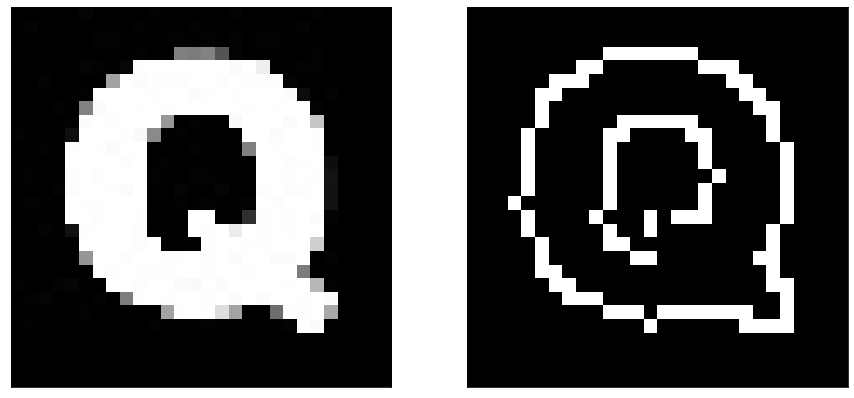

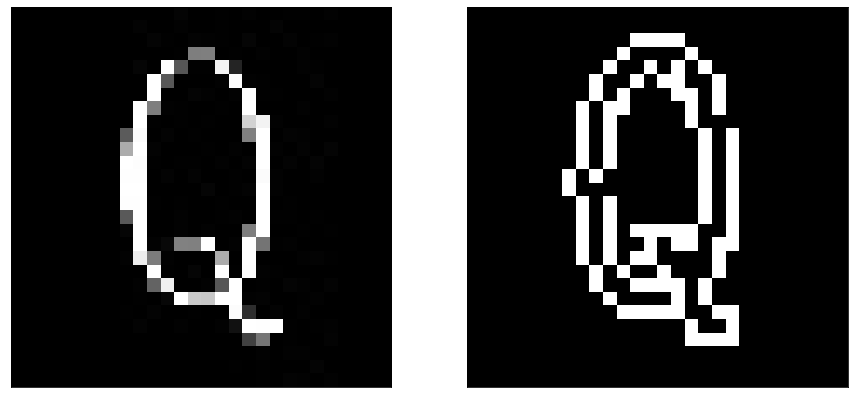

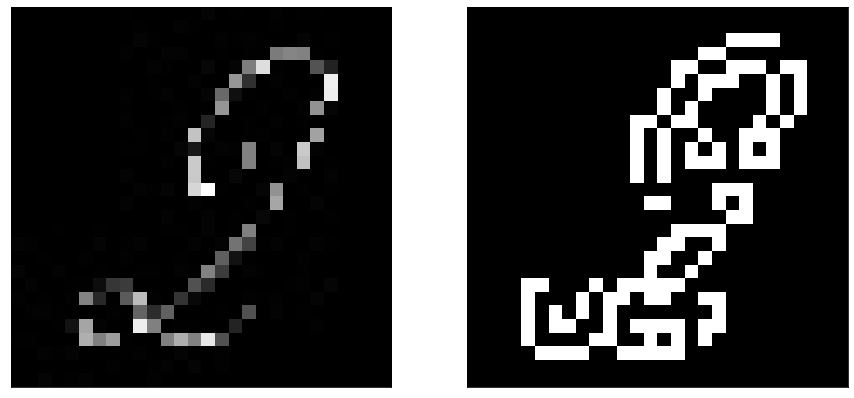

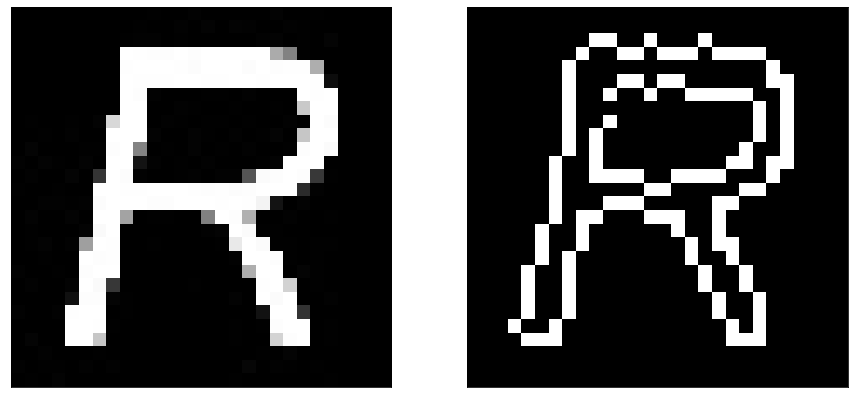

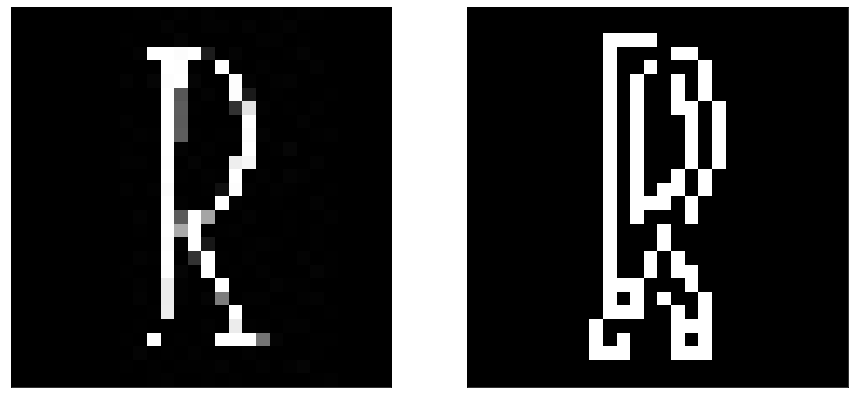

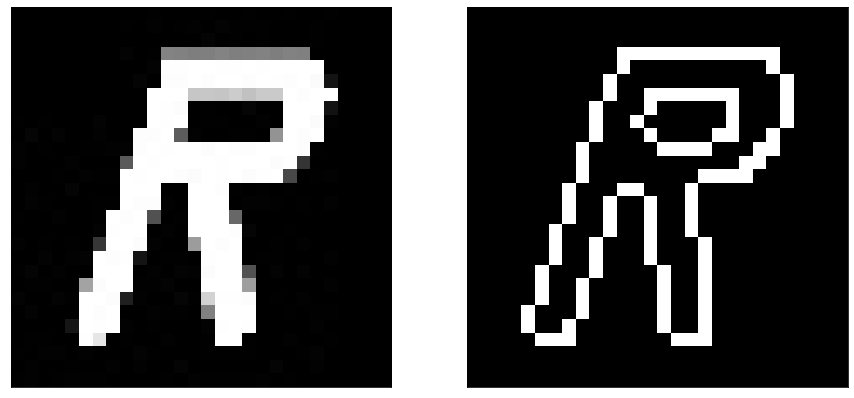

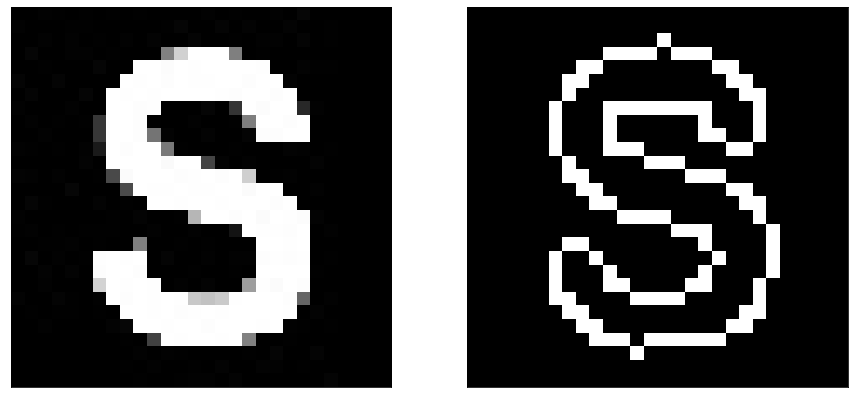

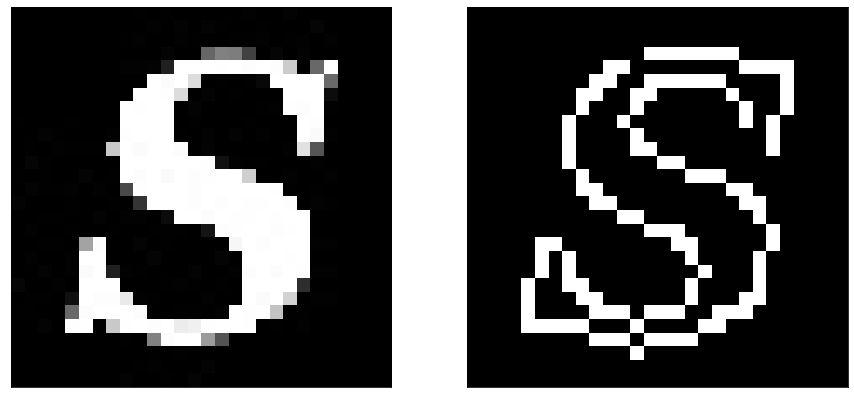

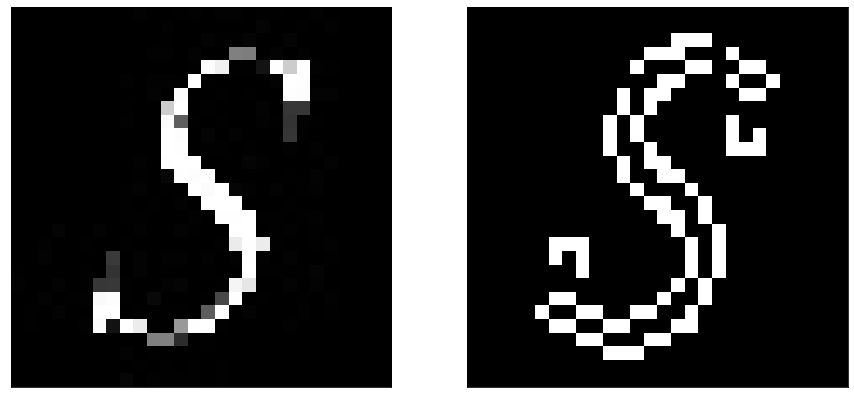

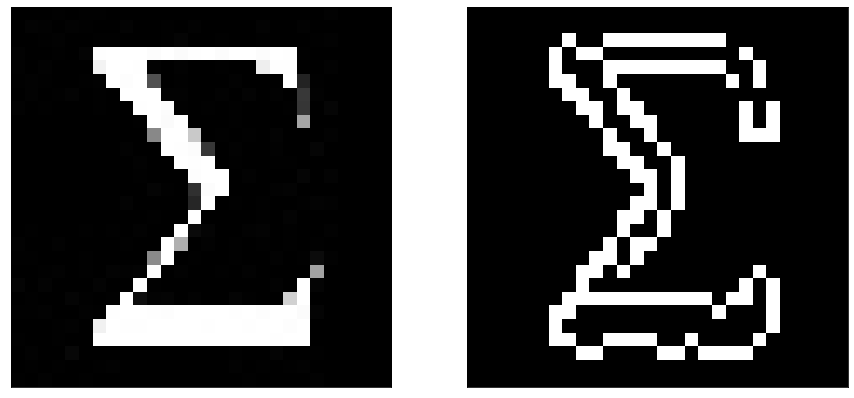

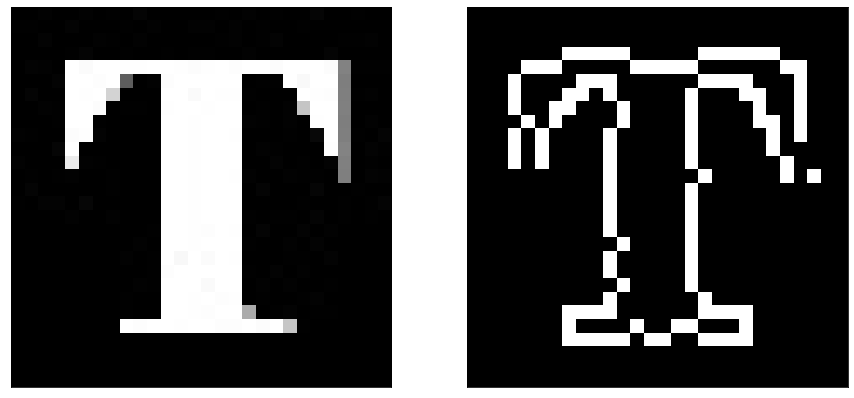

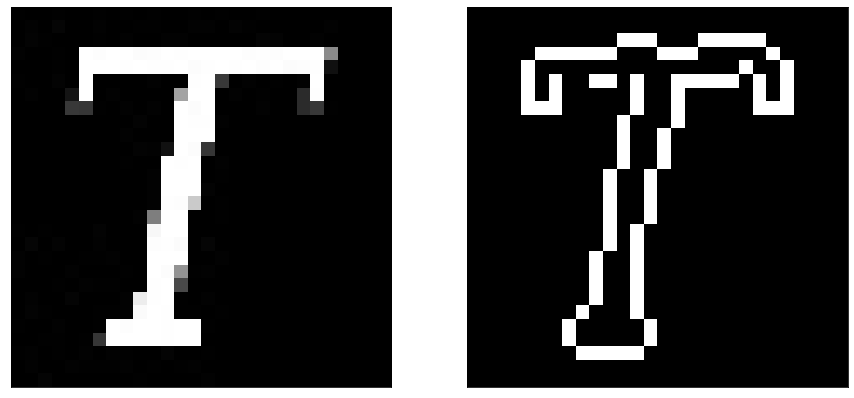

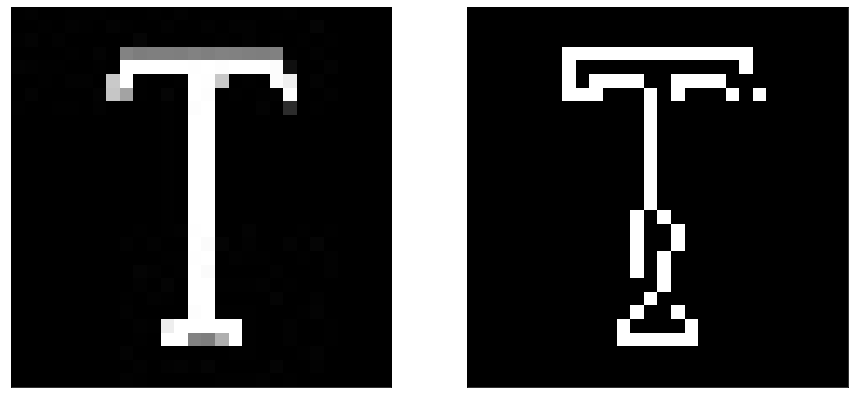

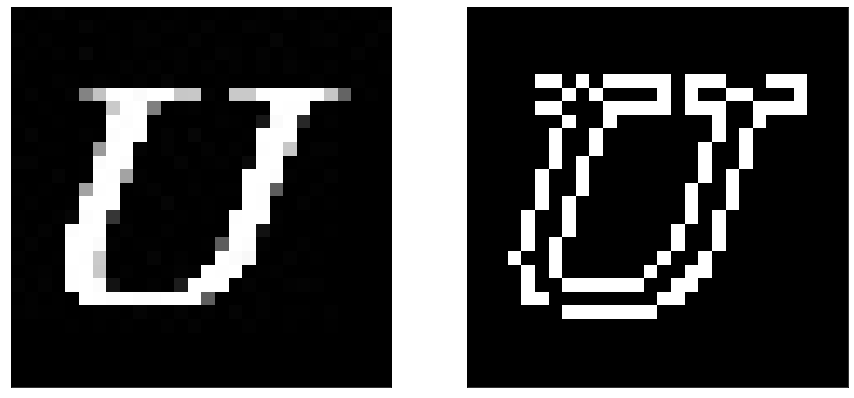

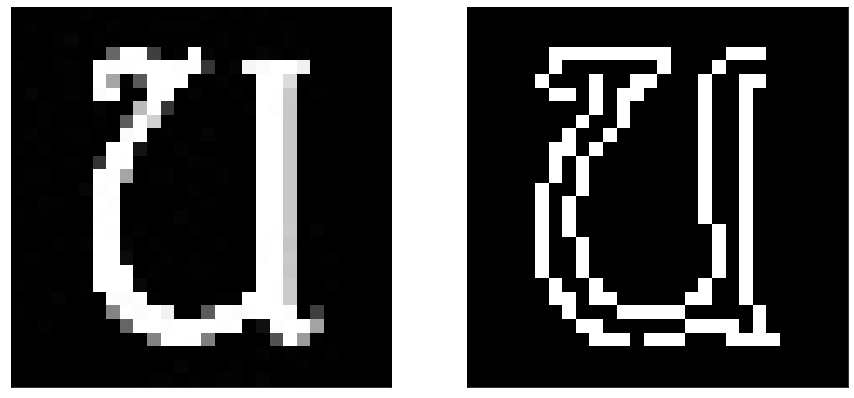

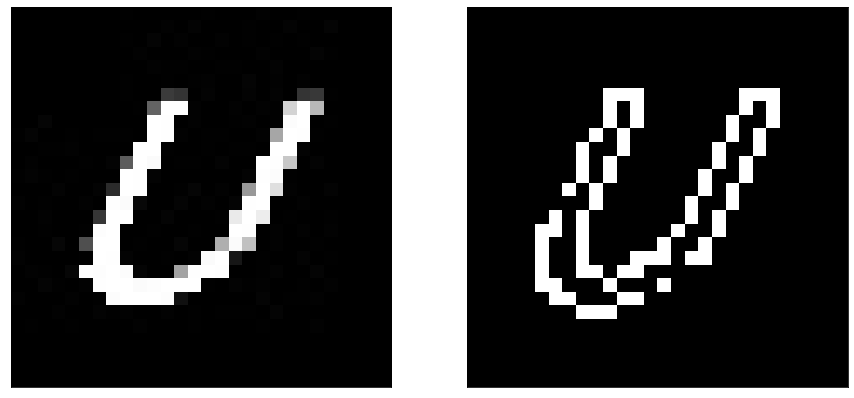

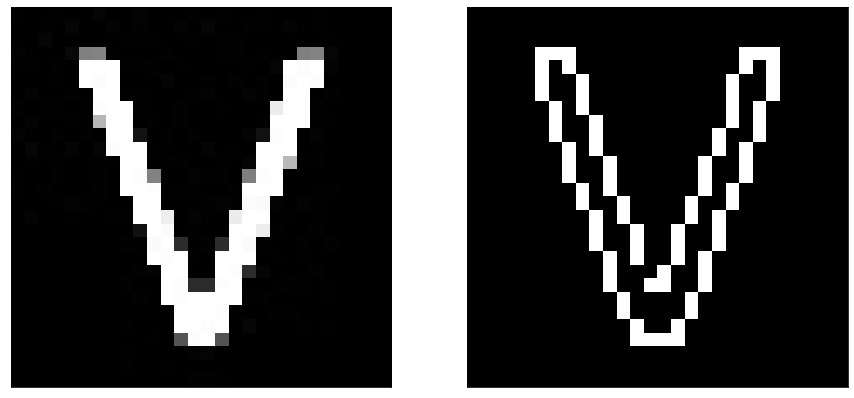

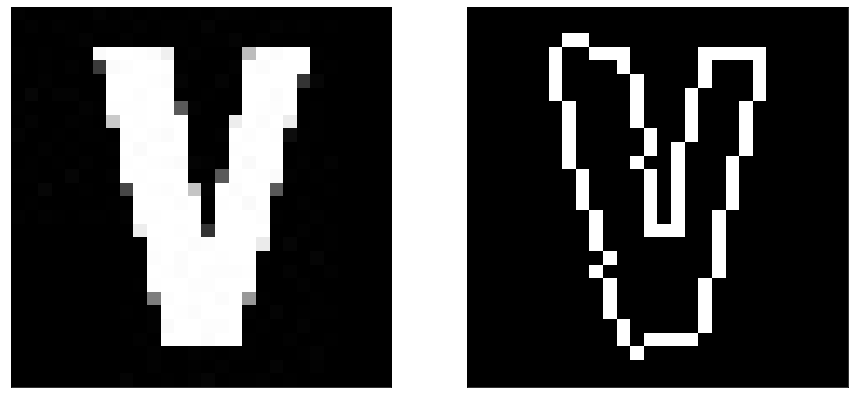

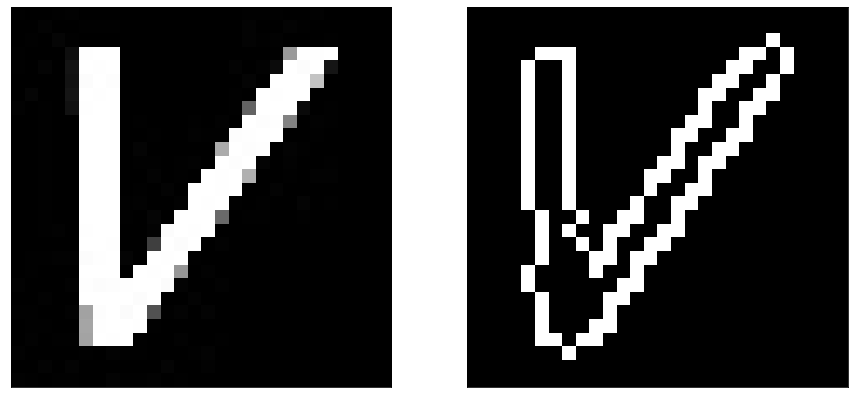

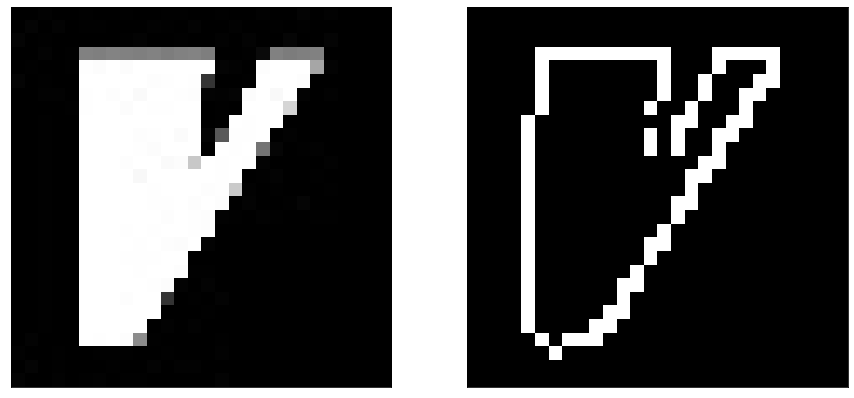

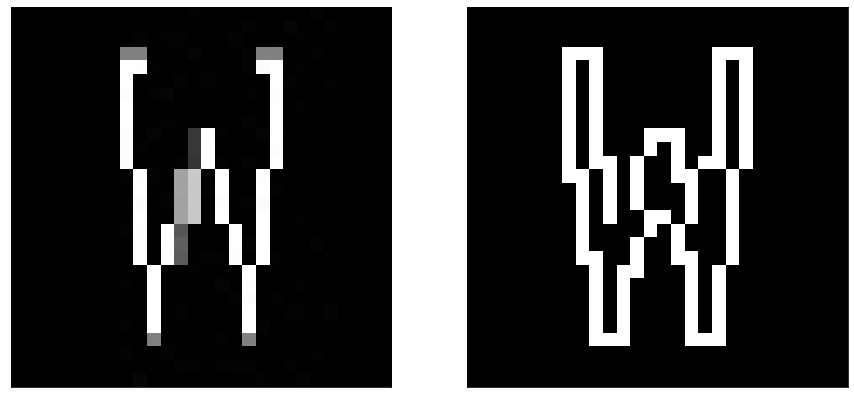

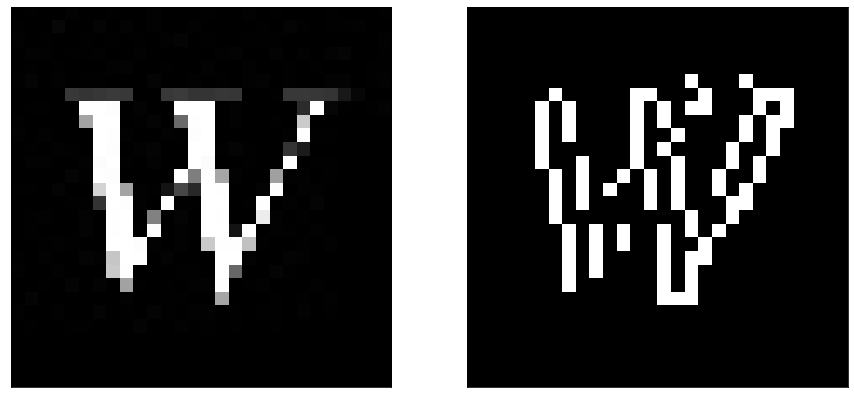

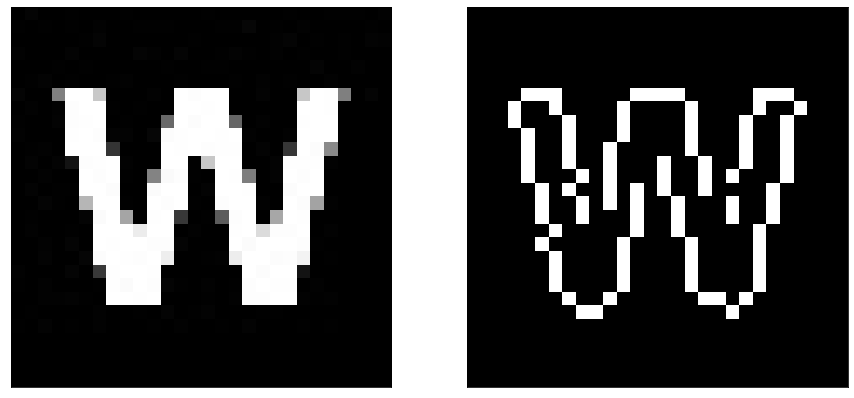

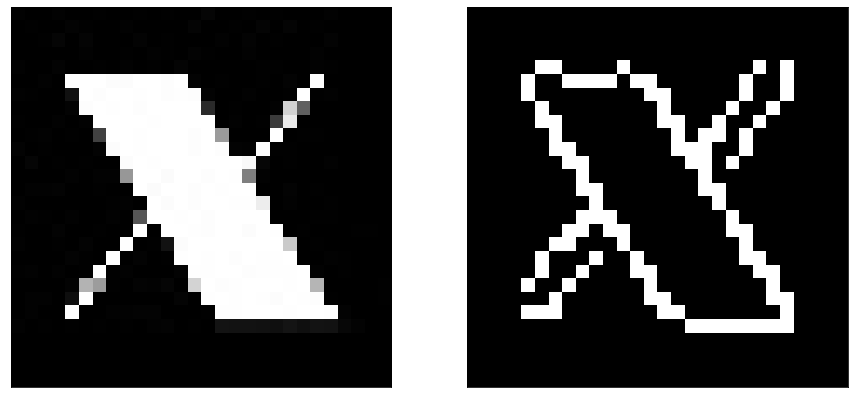

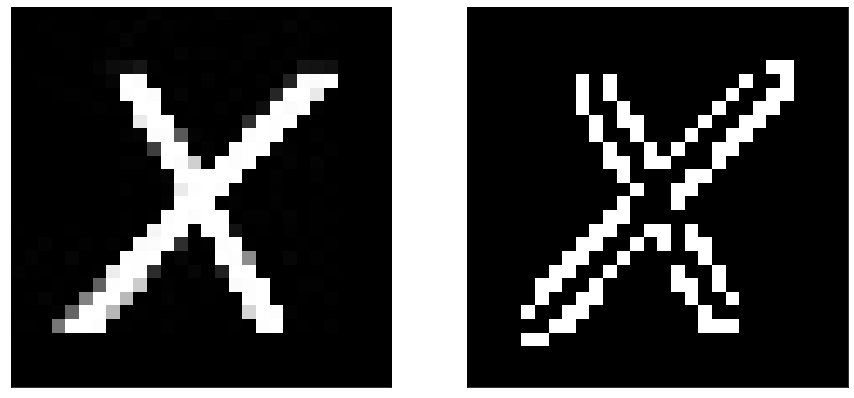

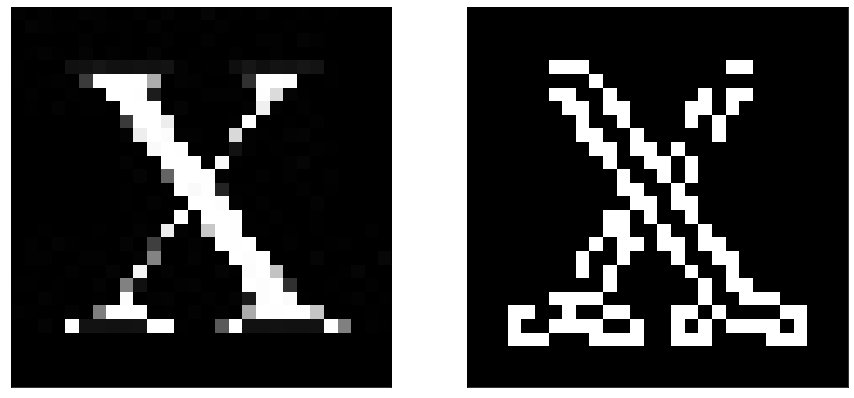

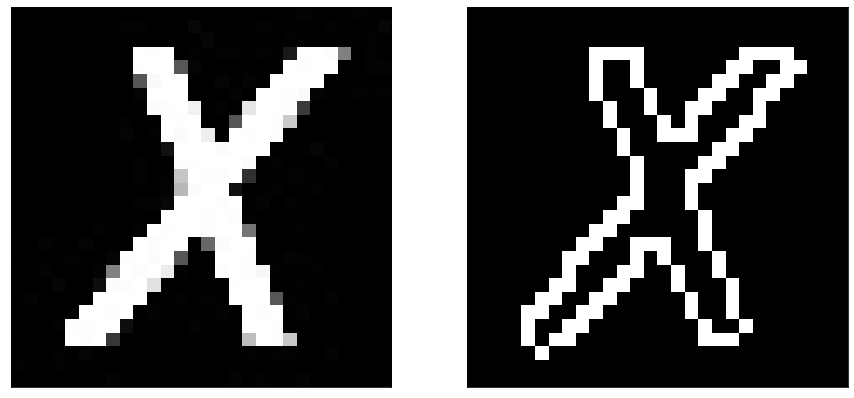

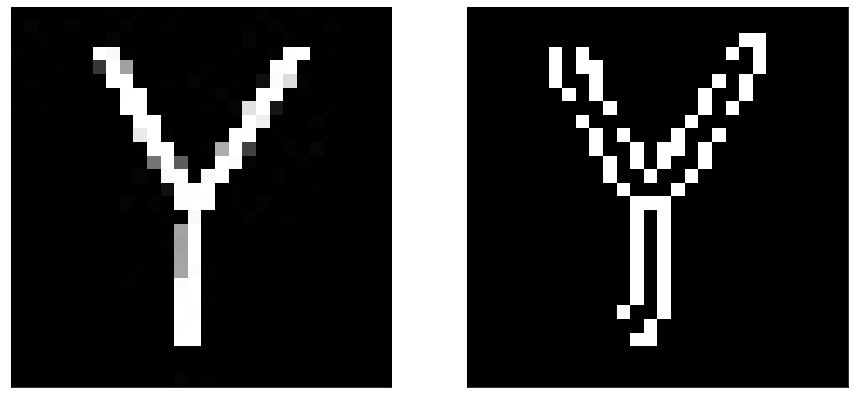

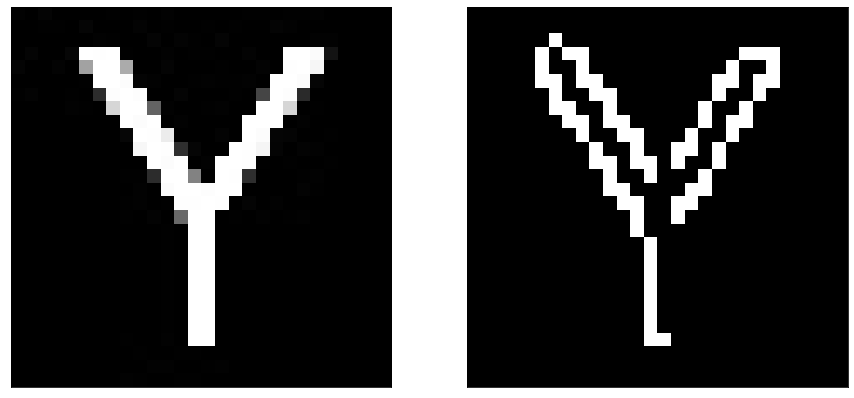

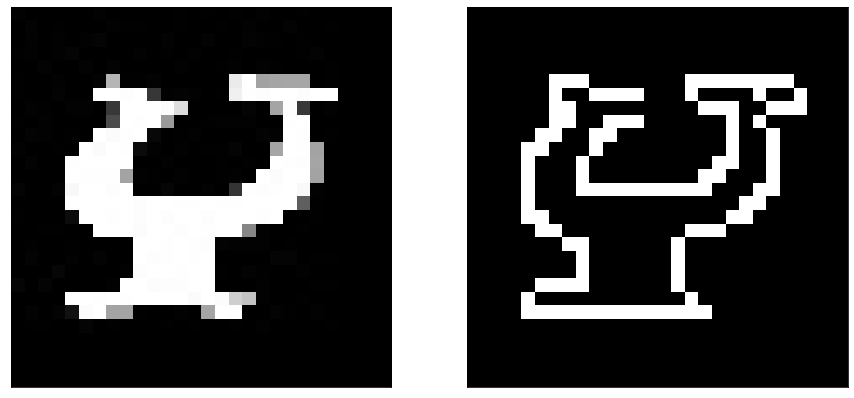

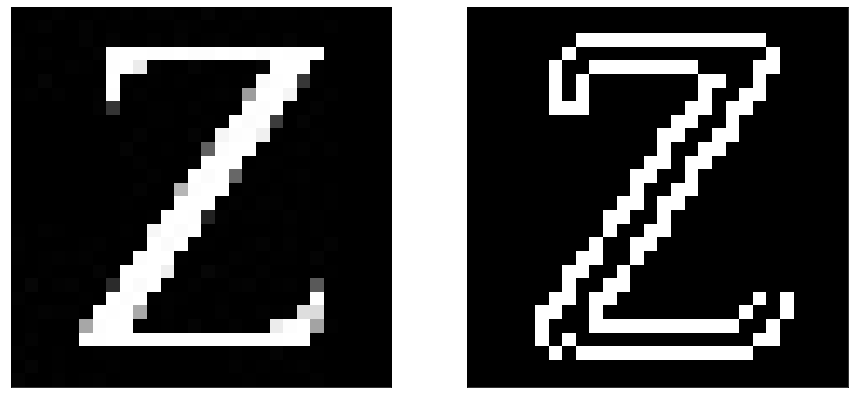

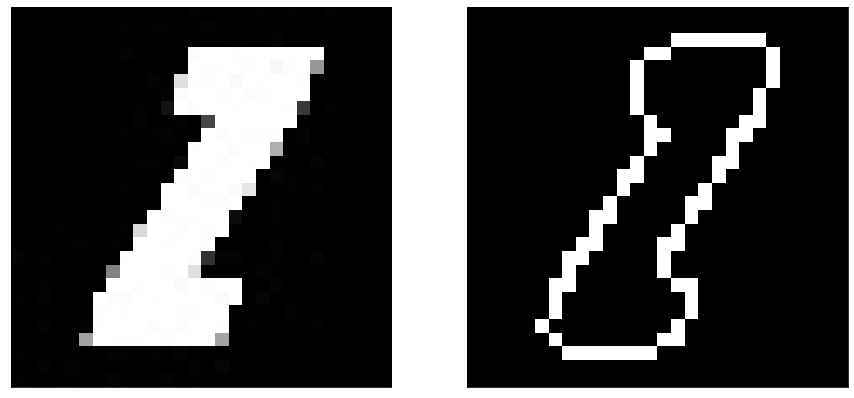

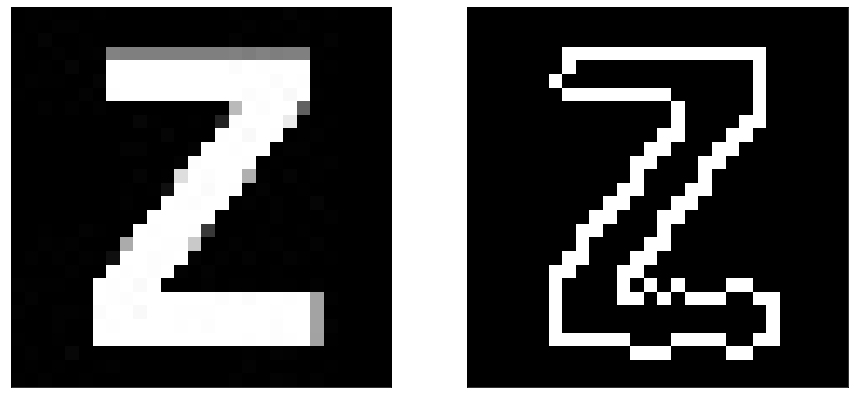

In [6]:
# for i in range(0,36575,300):    
#     edges = cv2.Canny(data[i], 30, 200)
#     plot_images(data[i], edges)

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


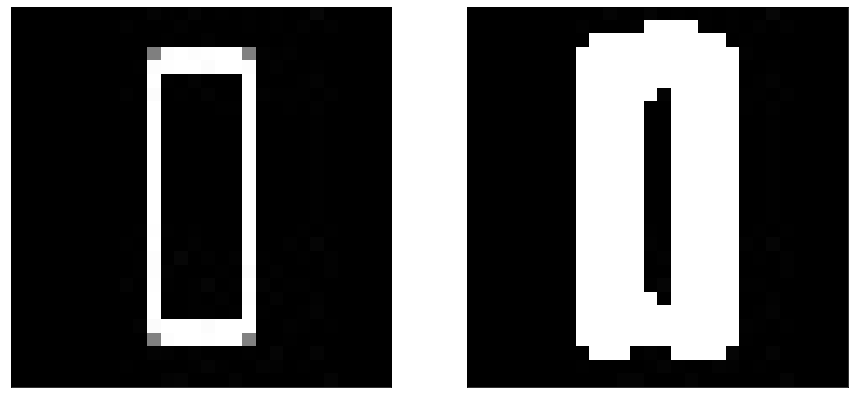

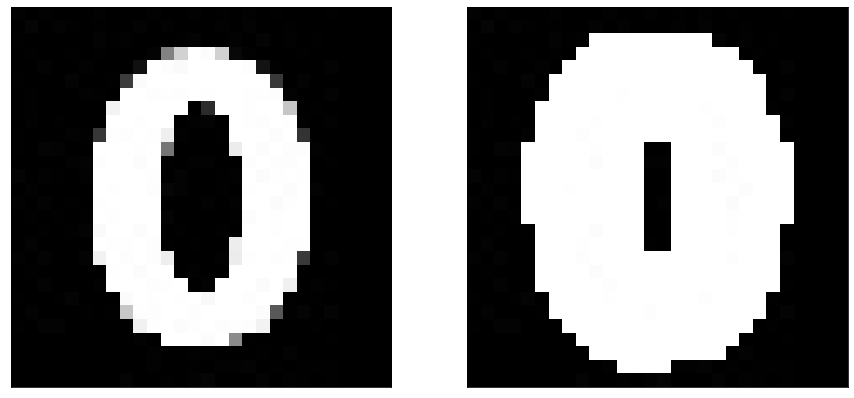

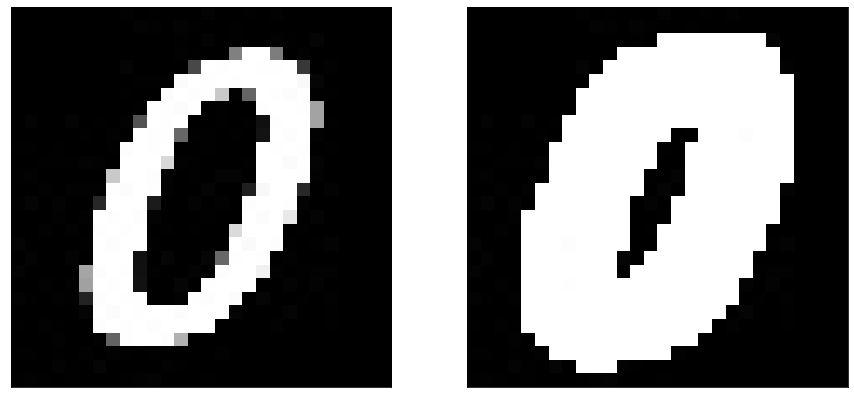

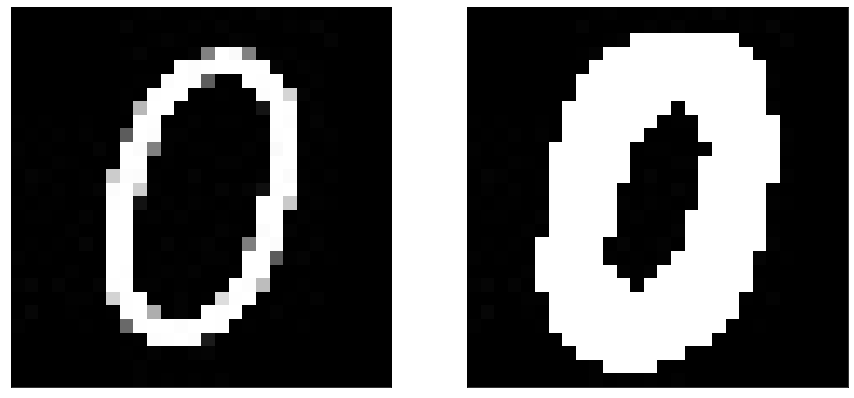

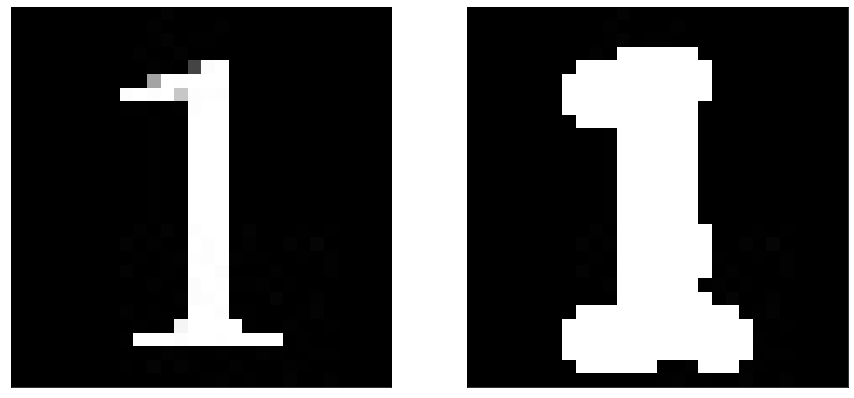

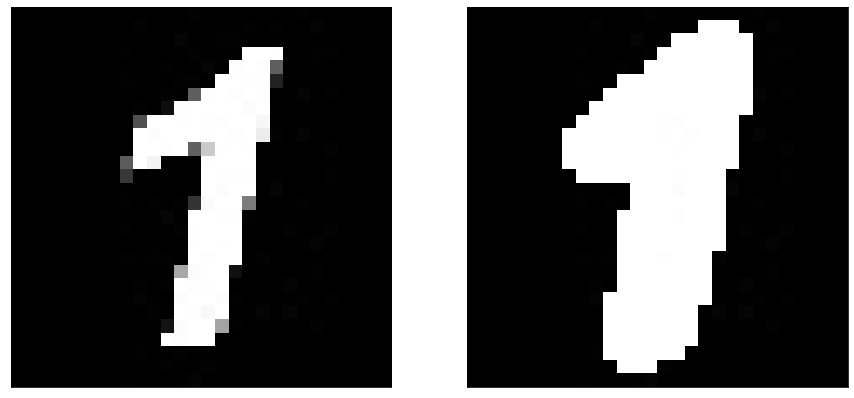

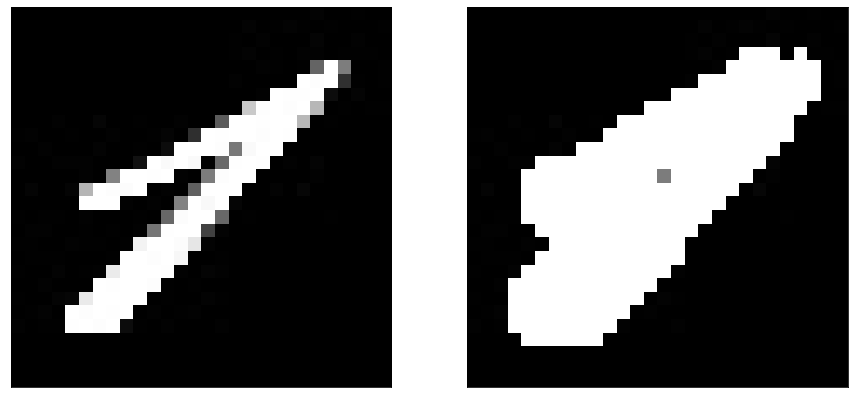

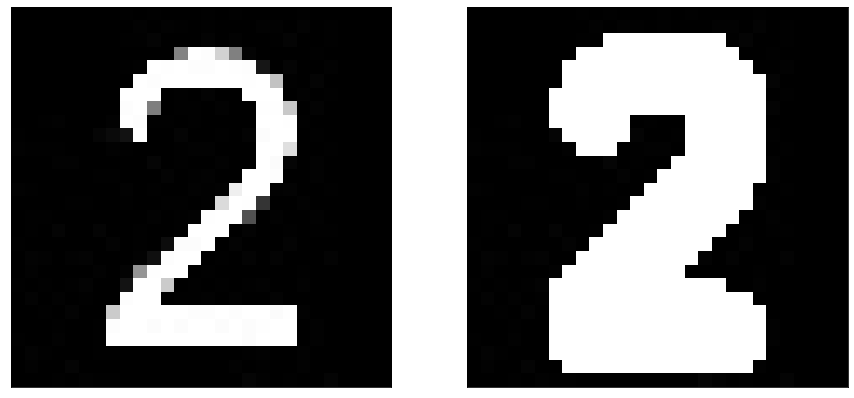

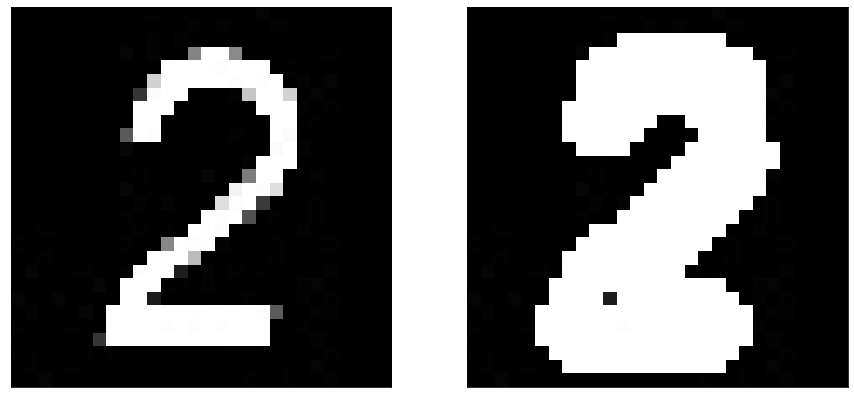

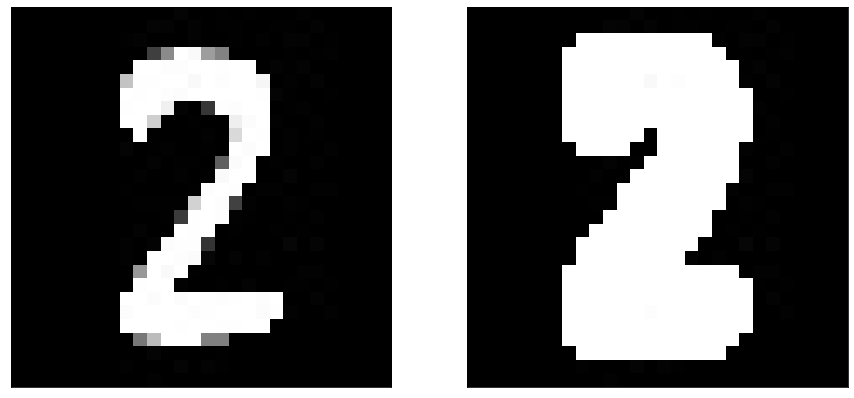

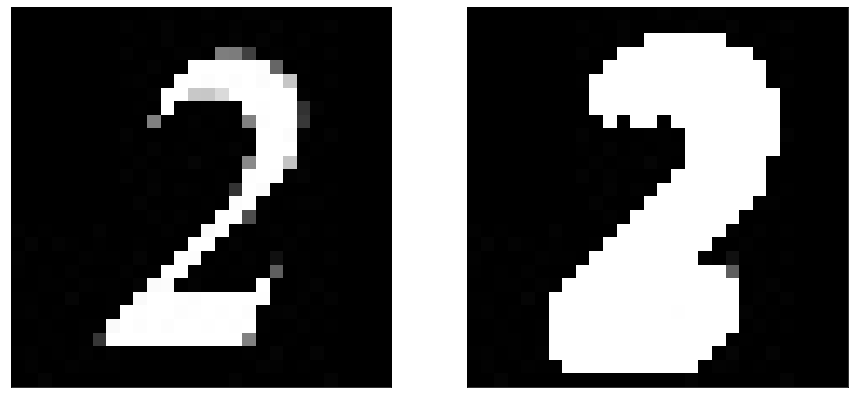

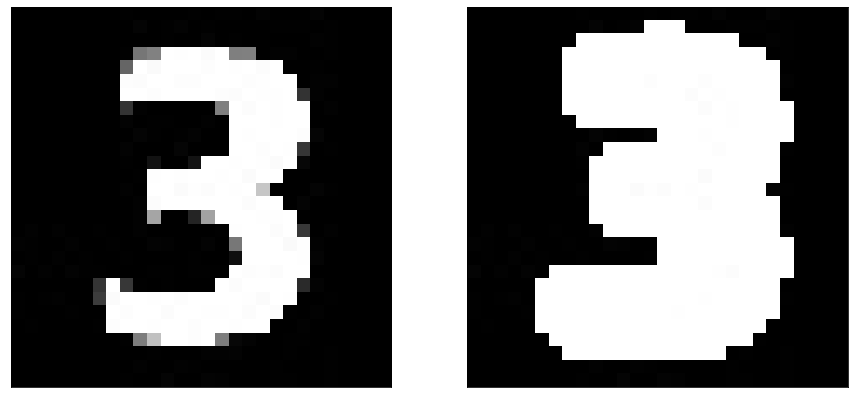

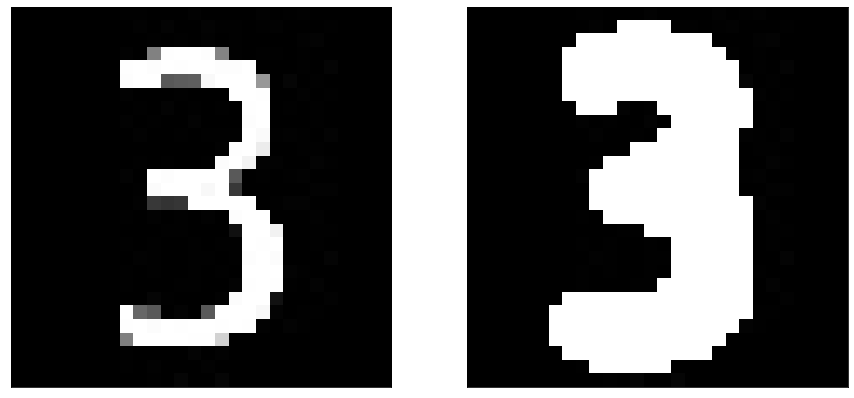

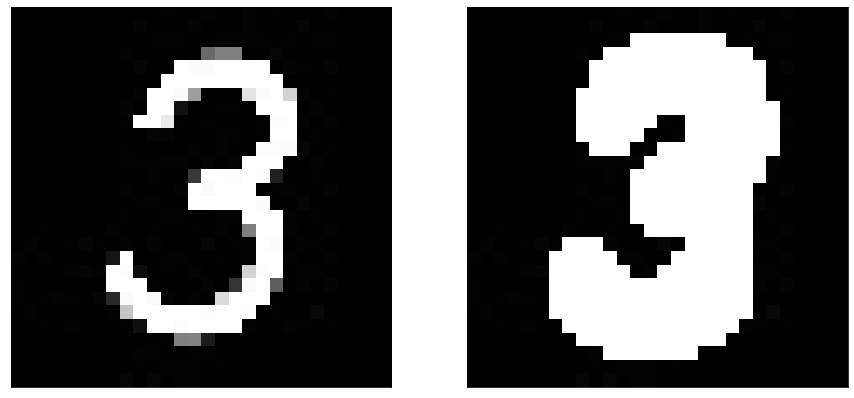

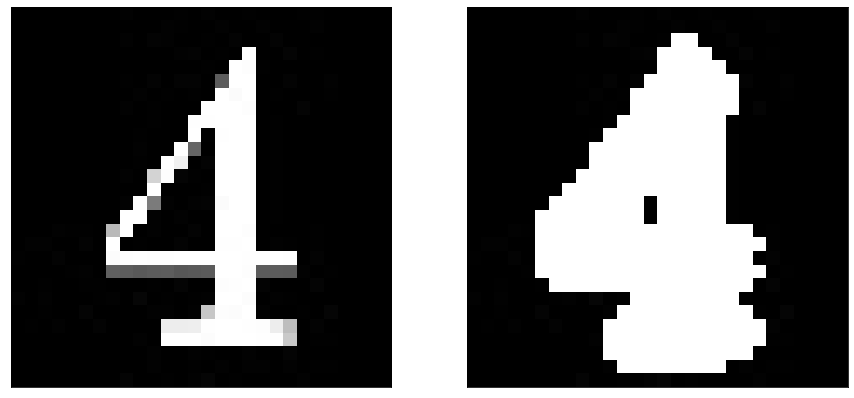

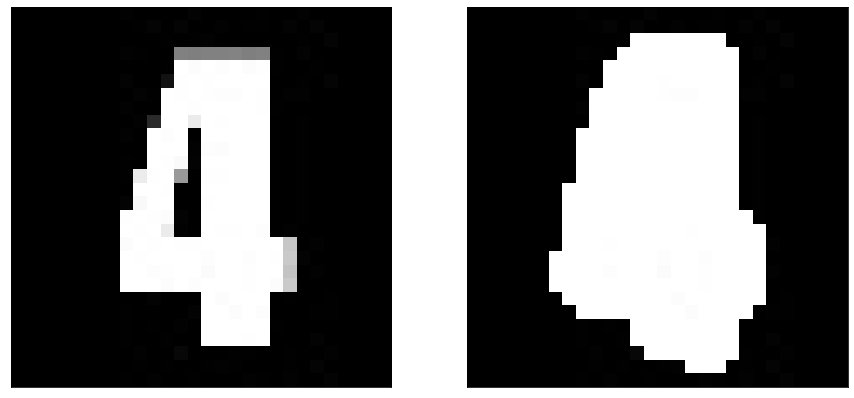

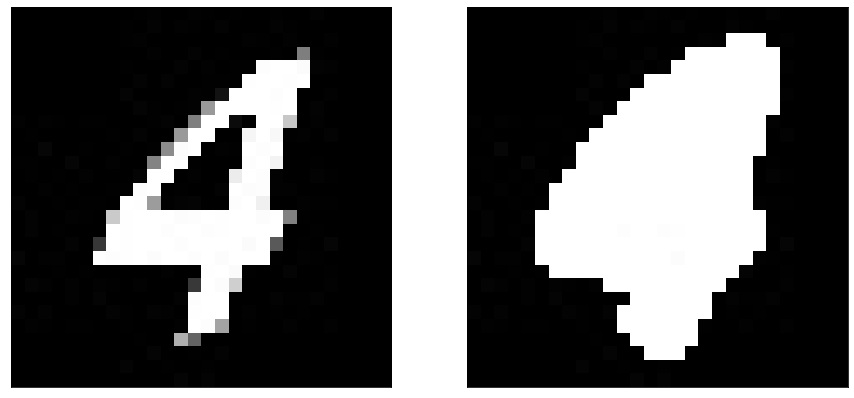

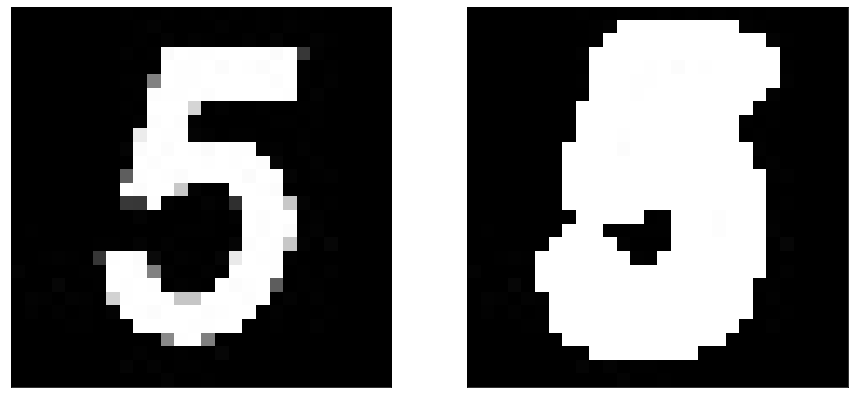

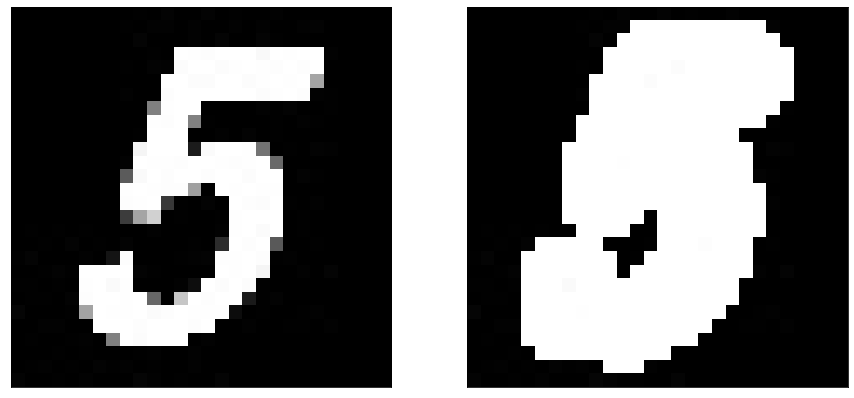

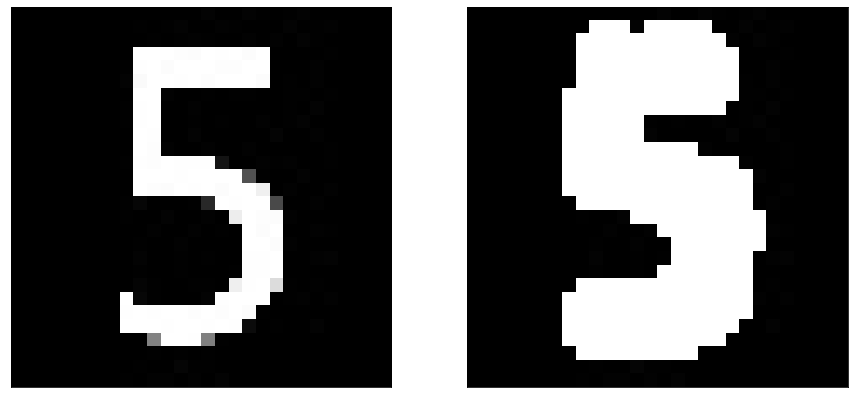

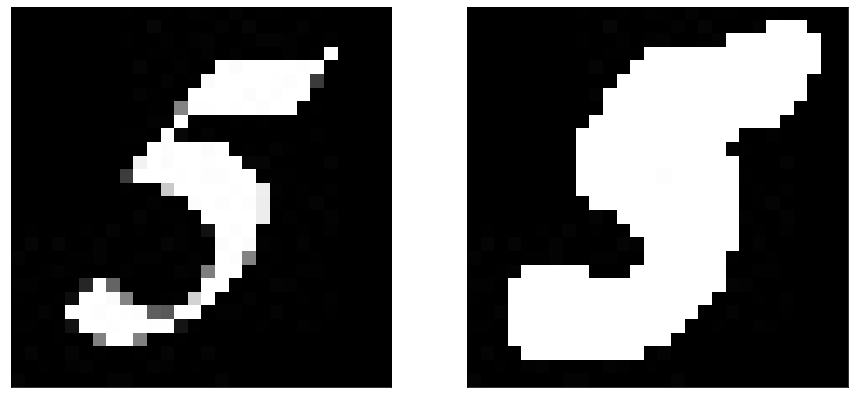

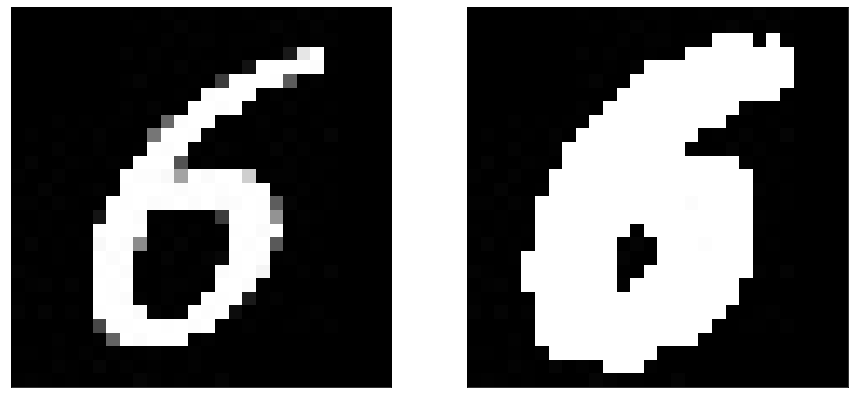

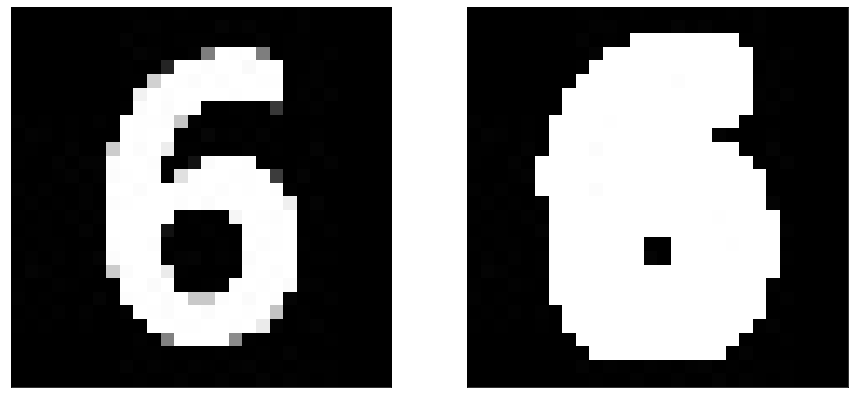

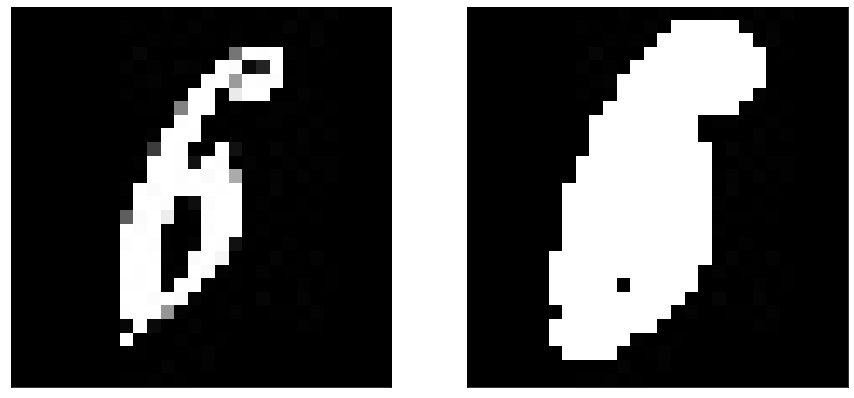

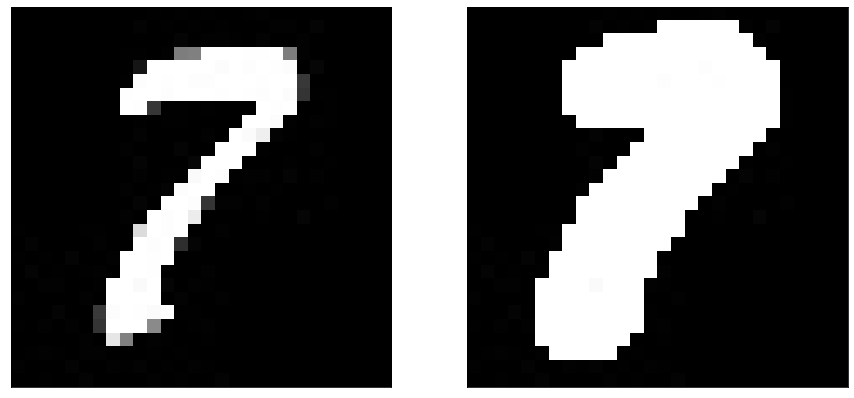

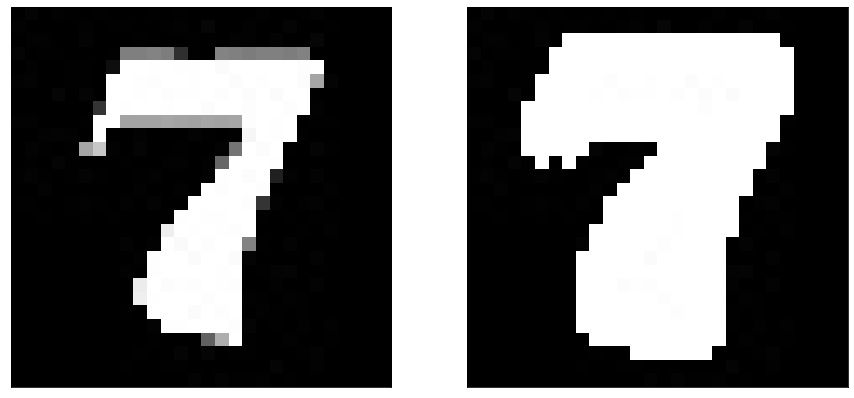

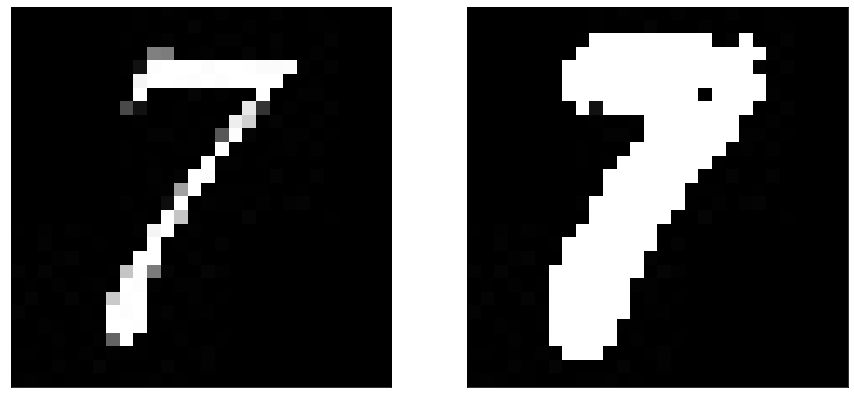

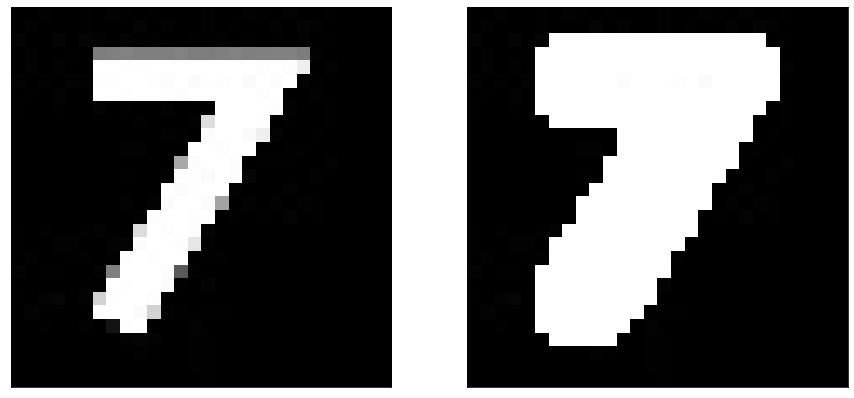

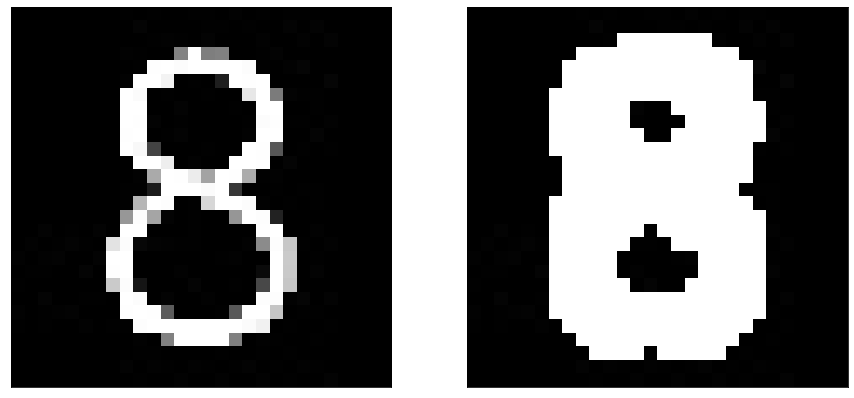

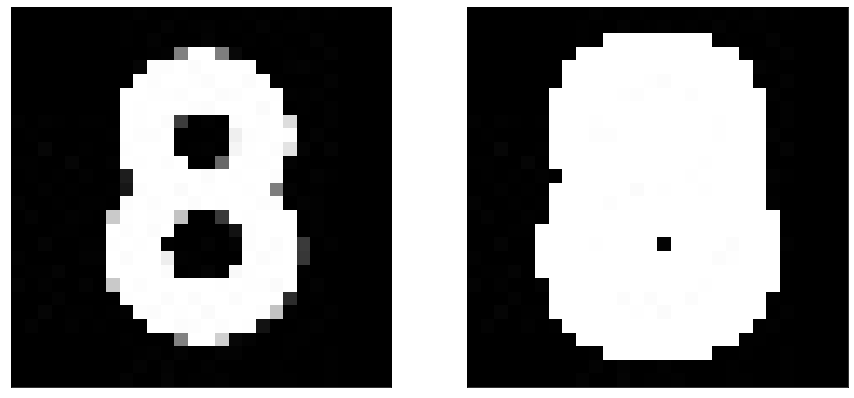

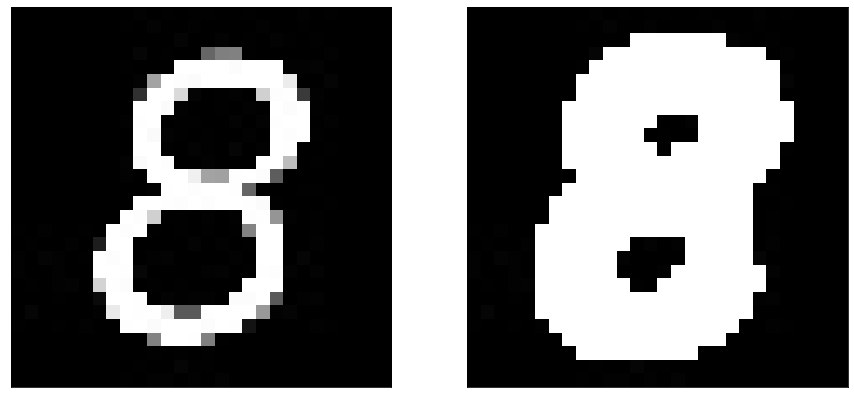

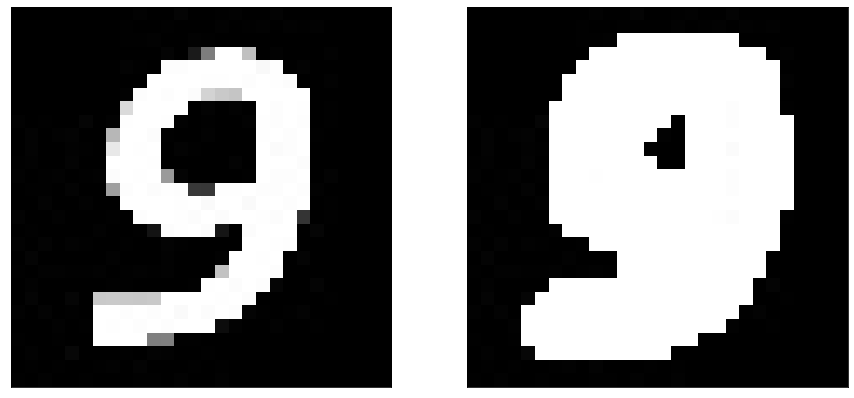

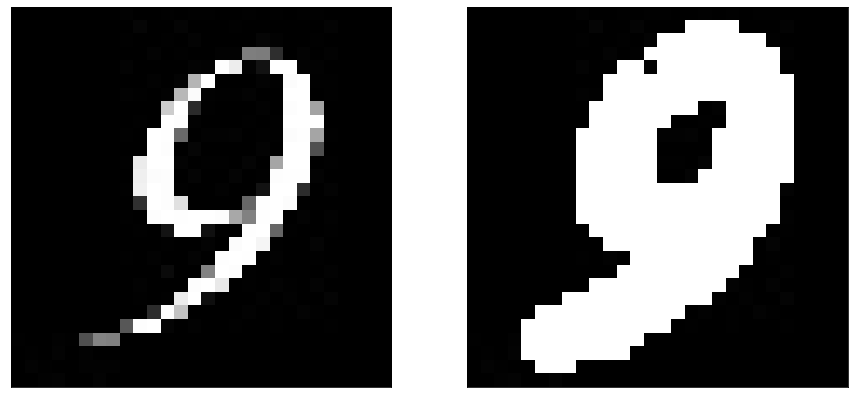

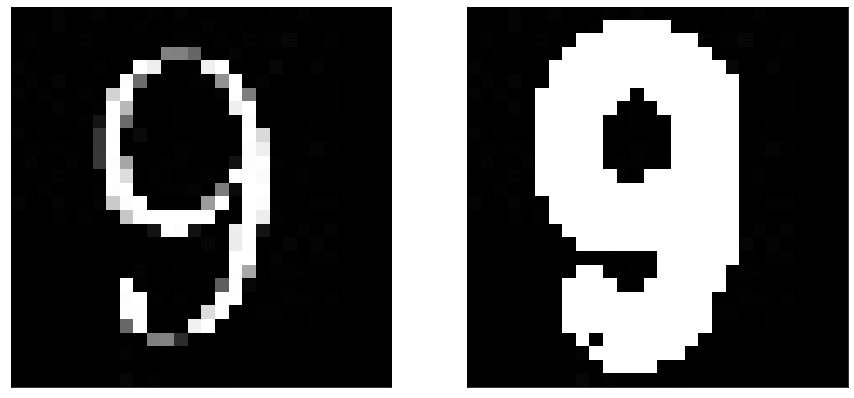

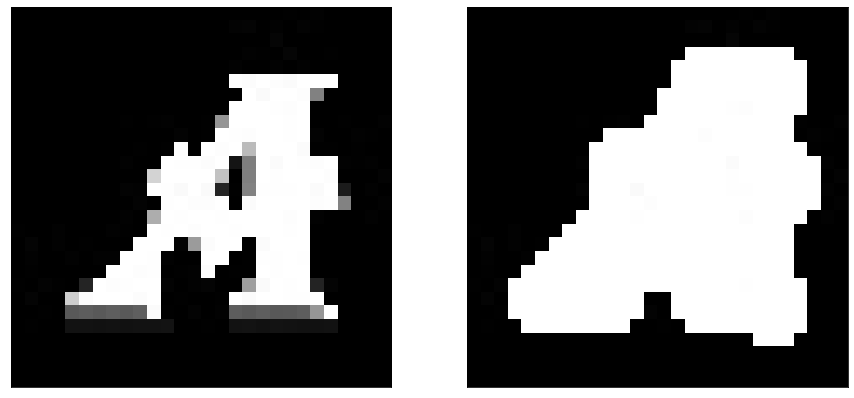

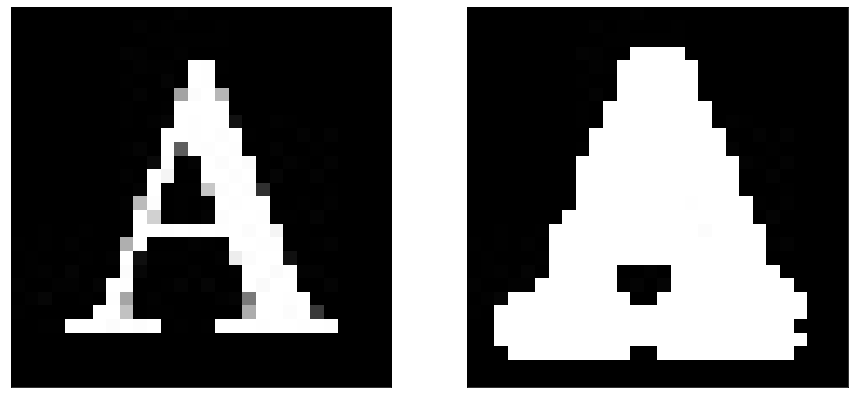

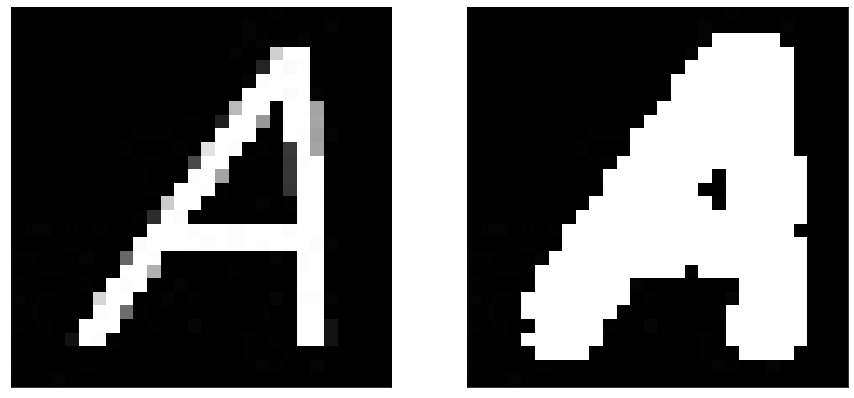

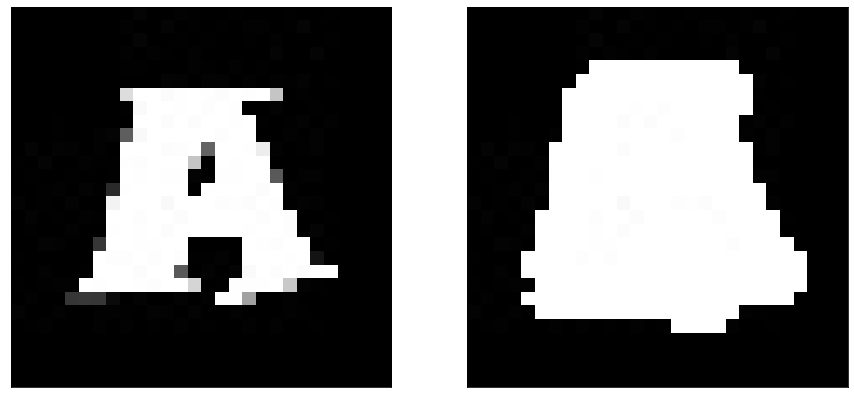

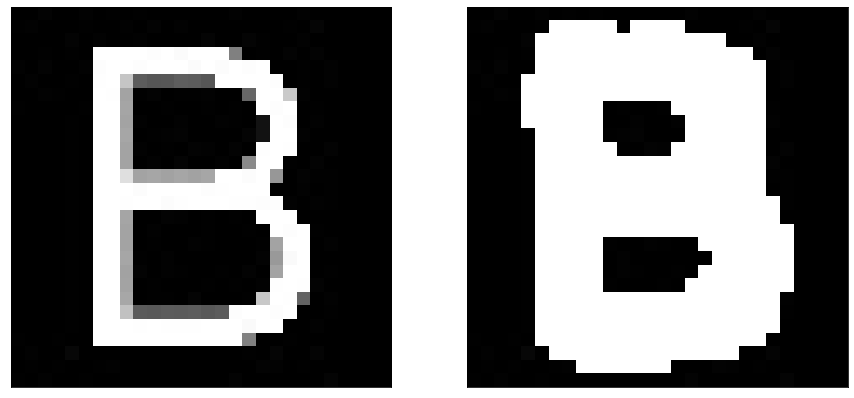

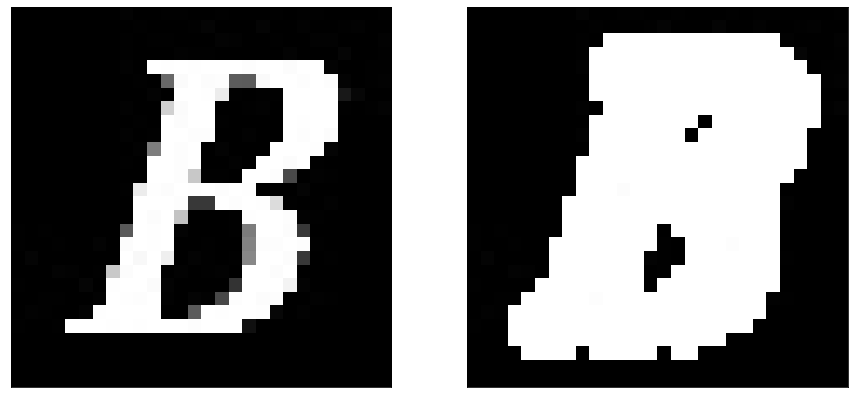

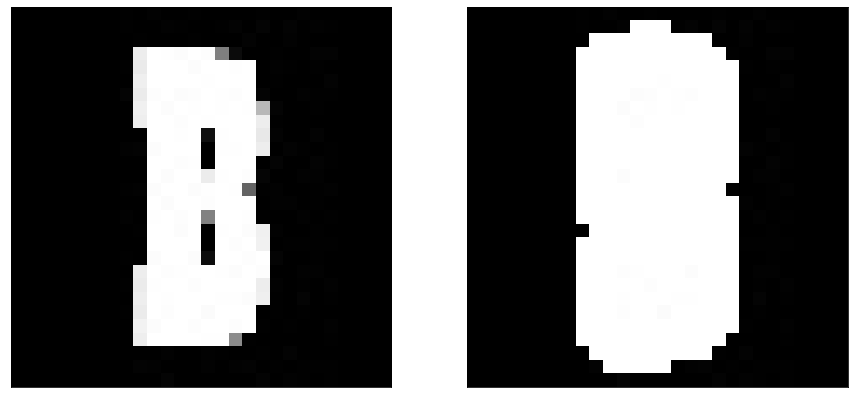

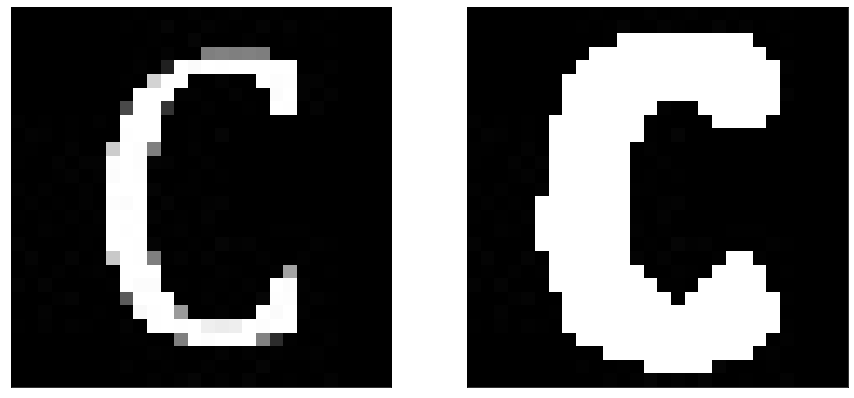

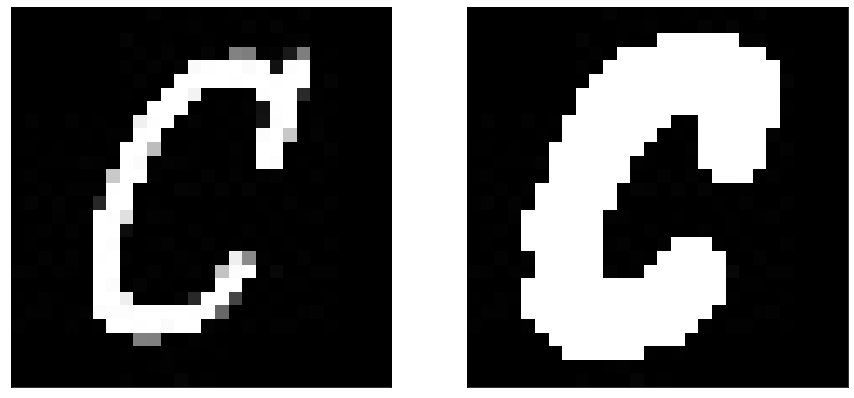

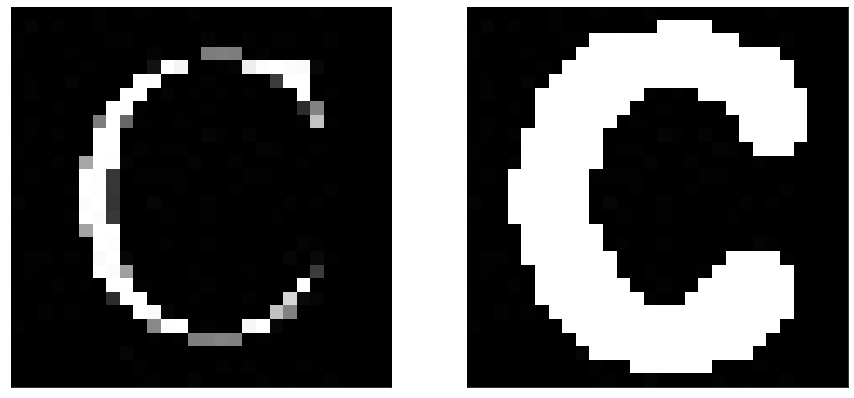

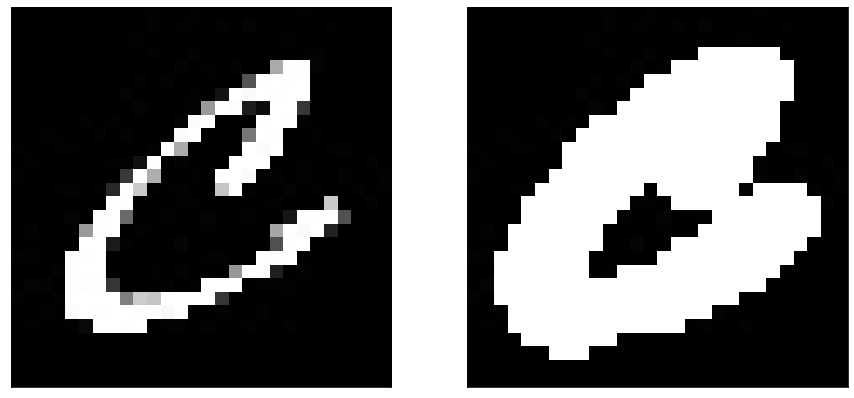

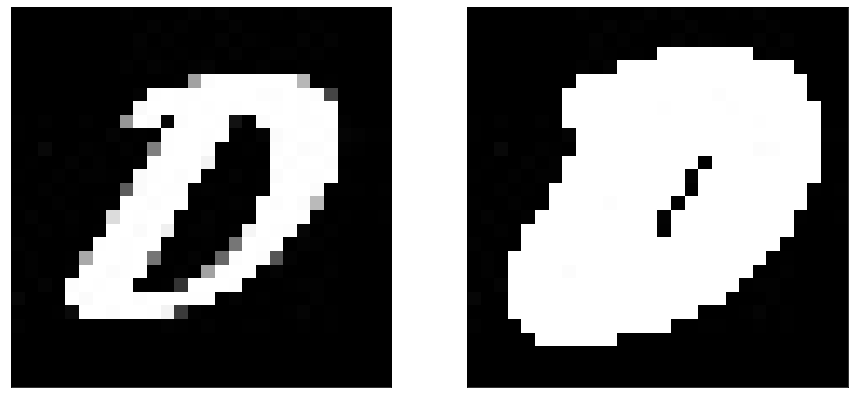

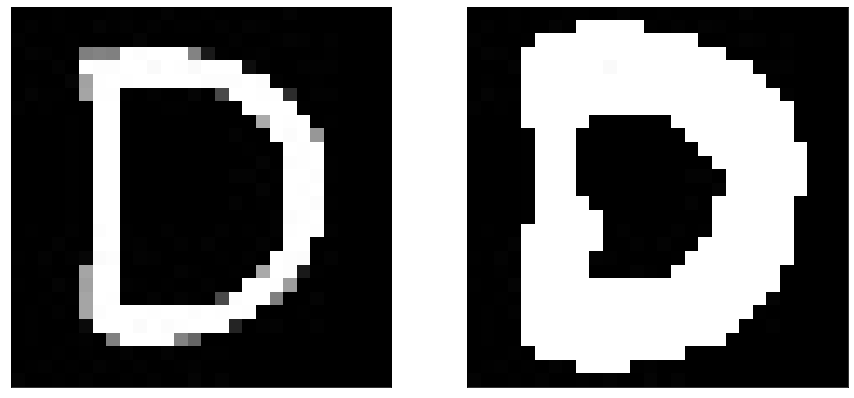

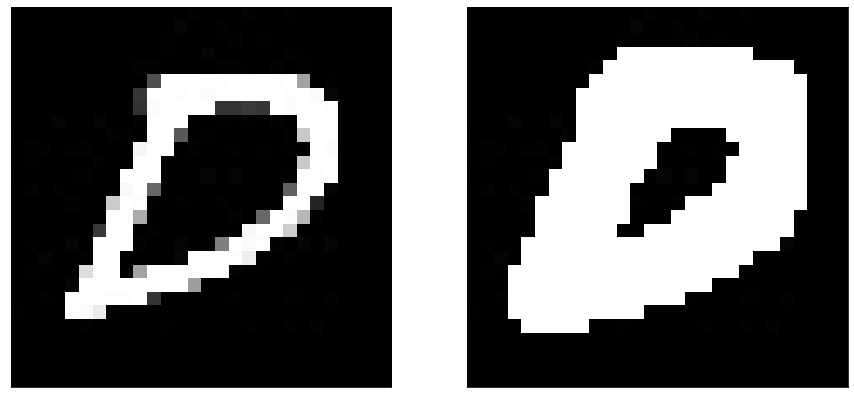

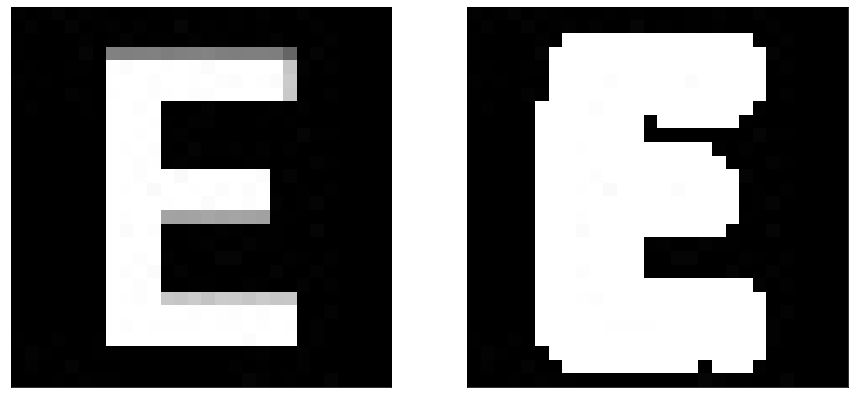

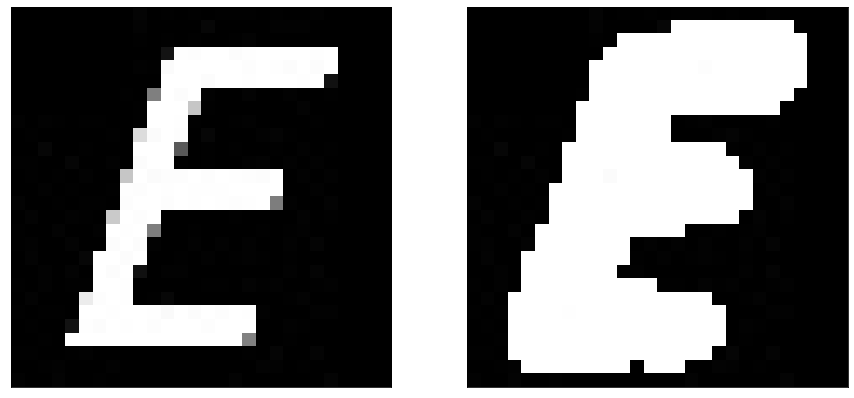

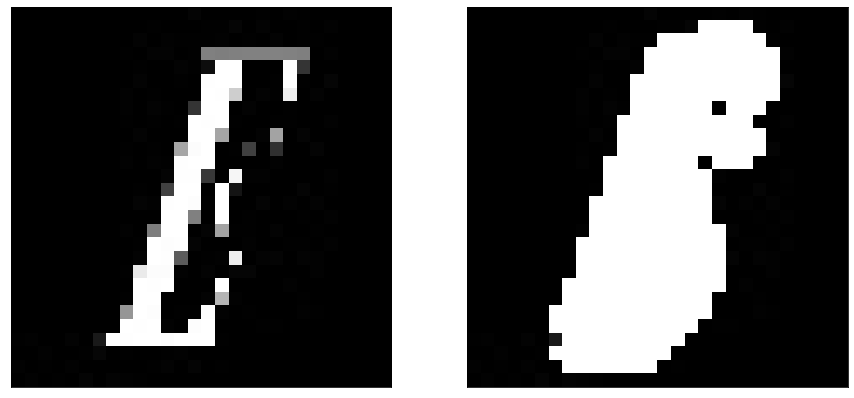

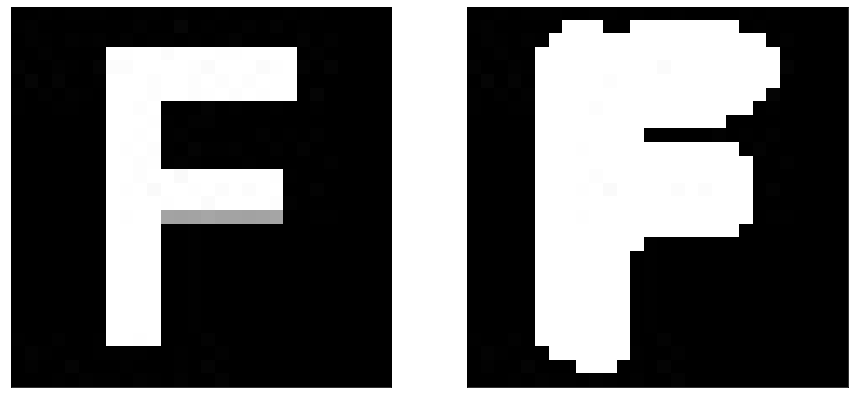

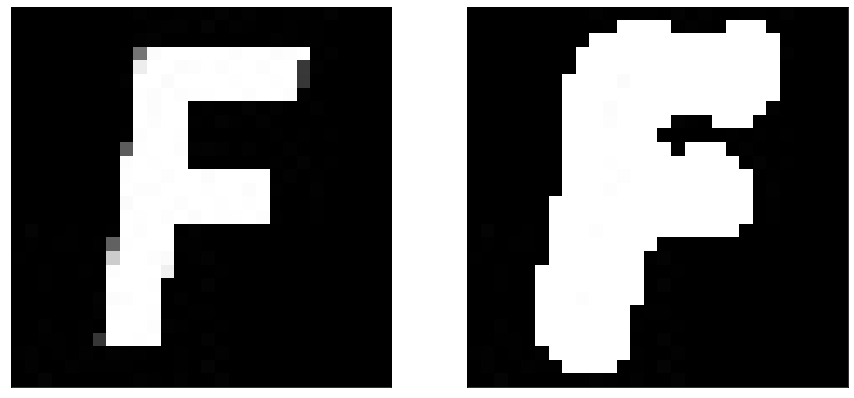

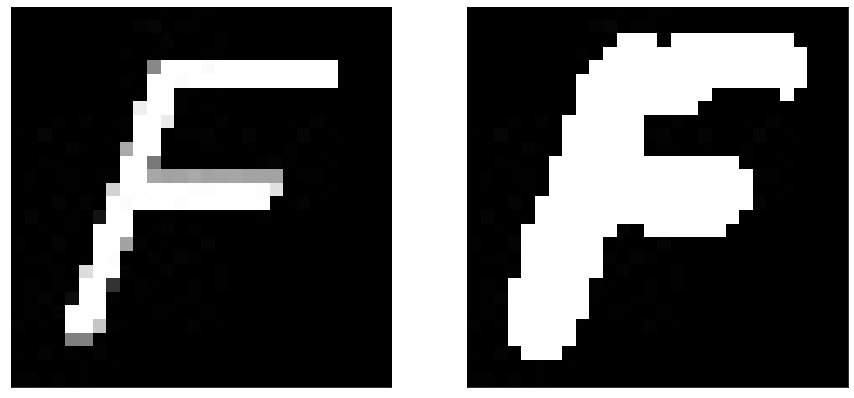

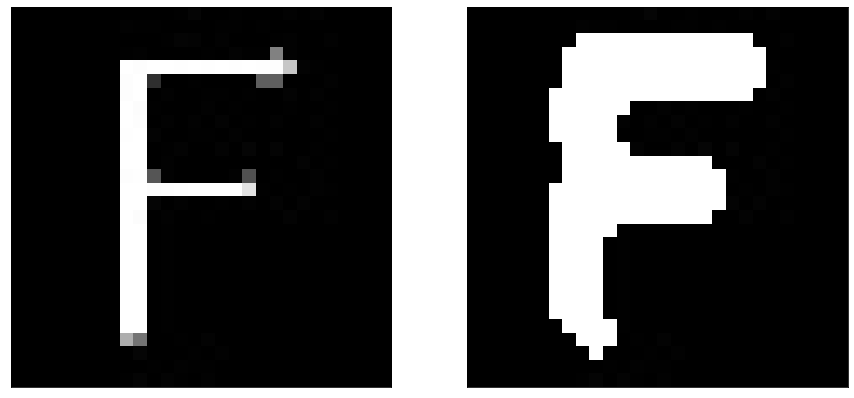

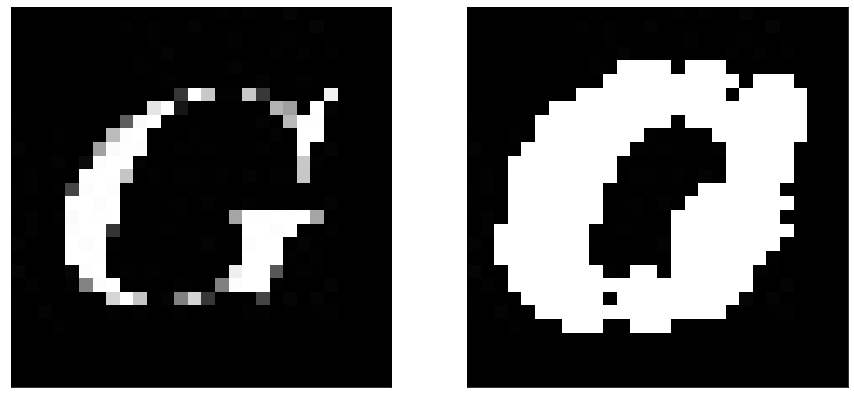

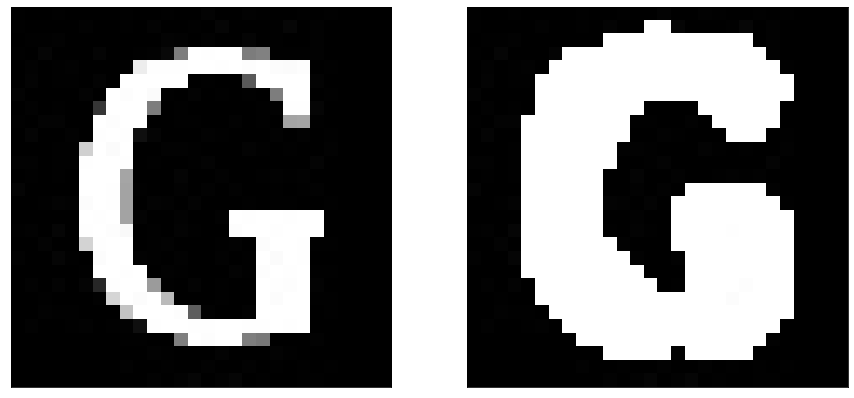

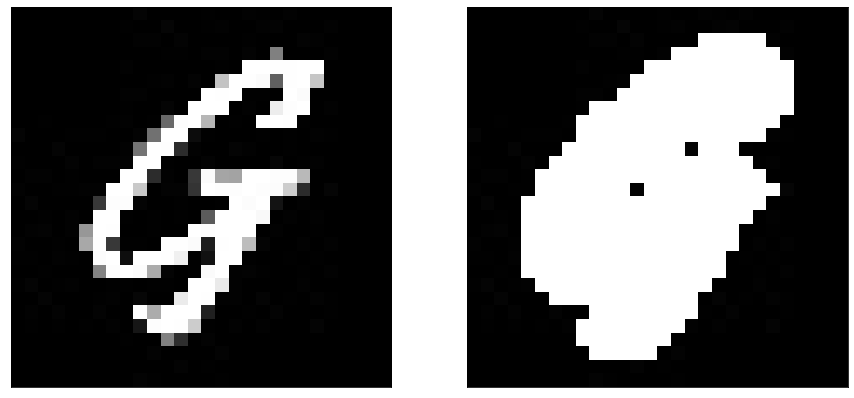

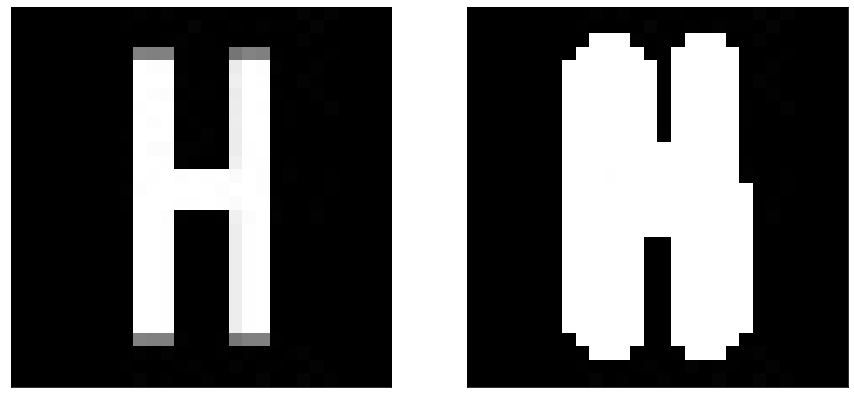

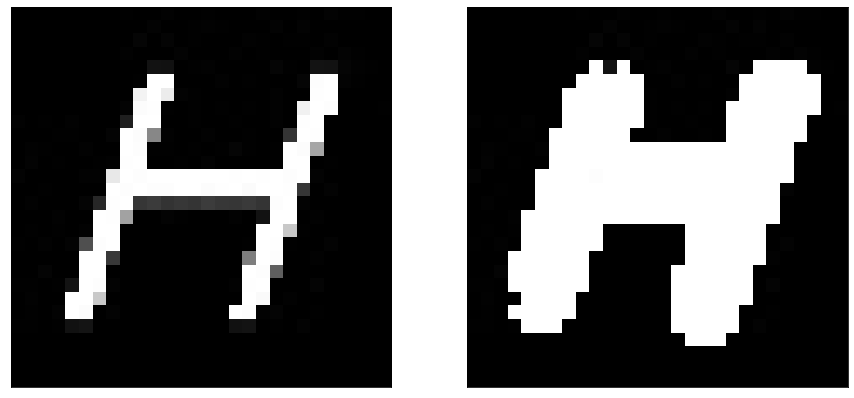

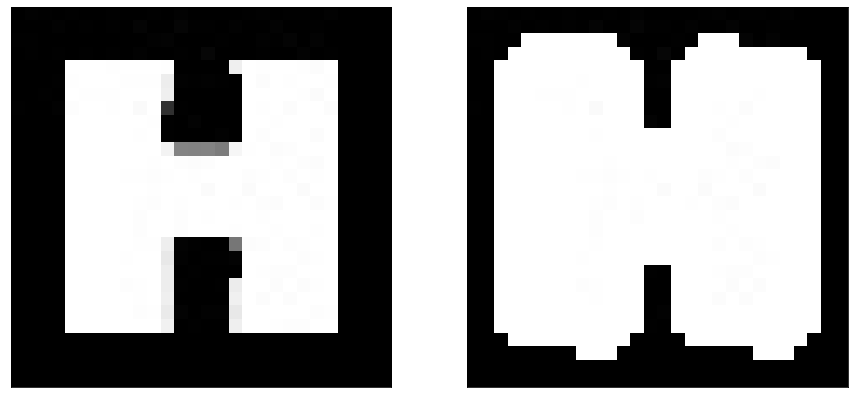

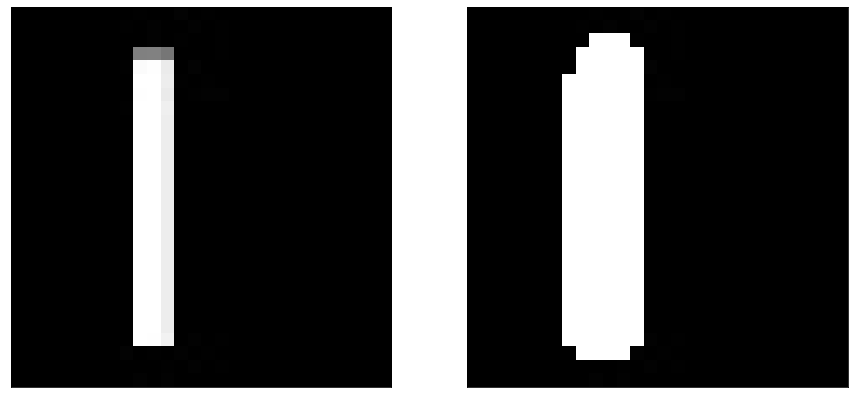

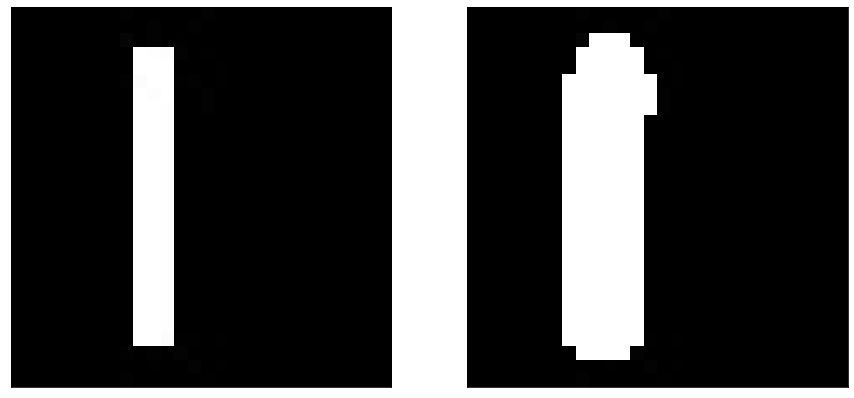

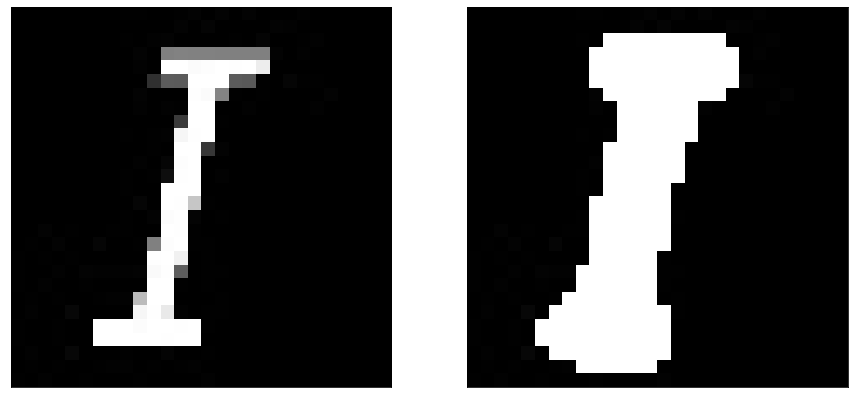

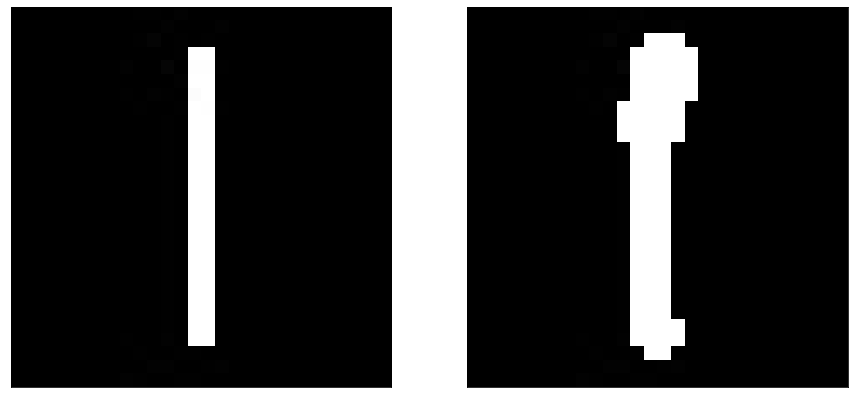

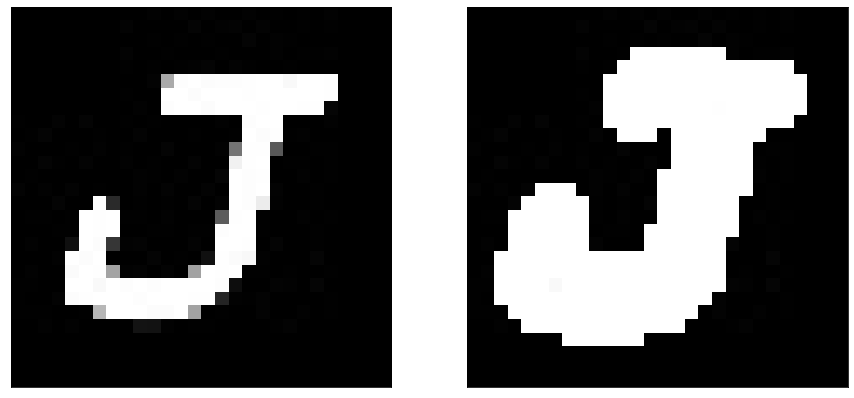

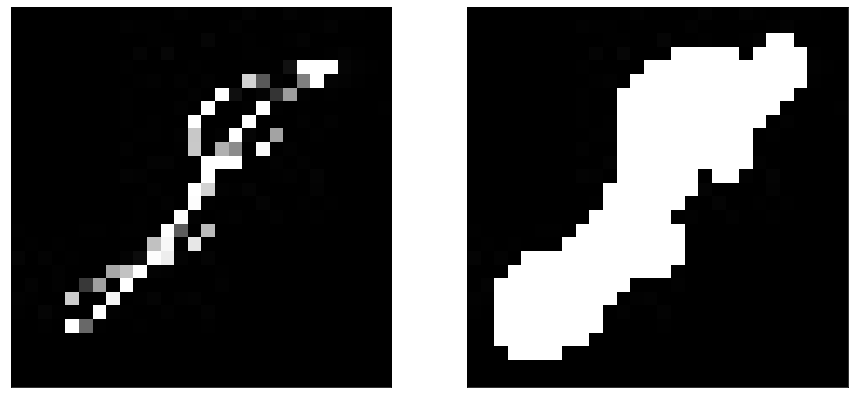

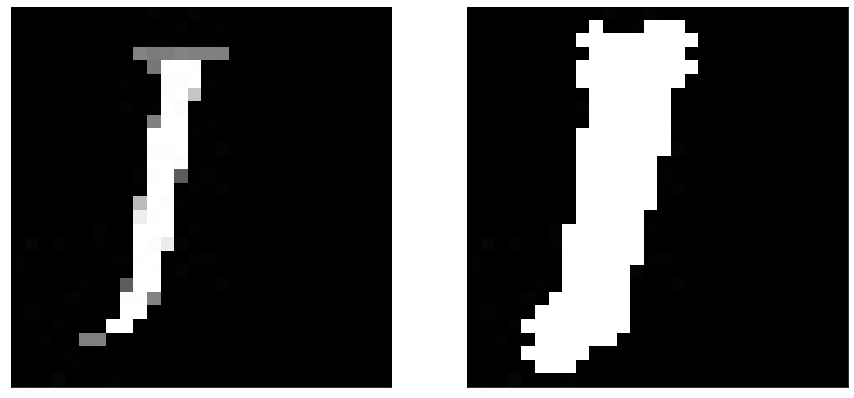

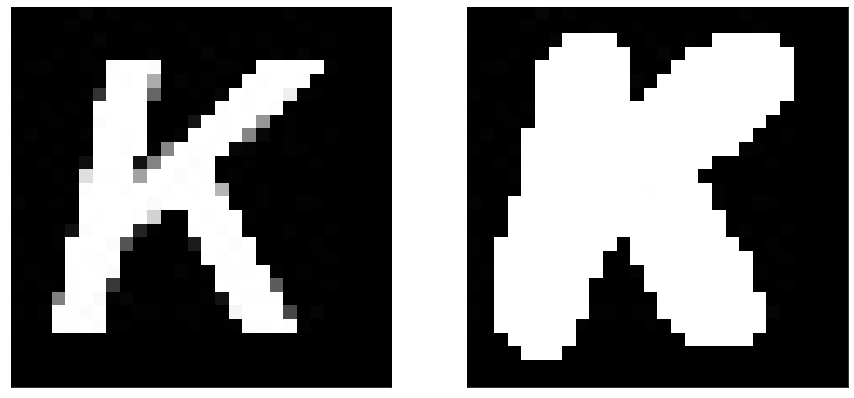

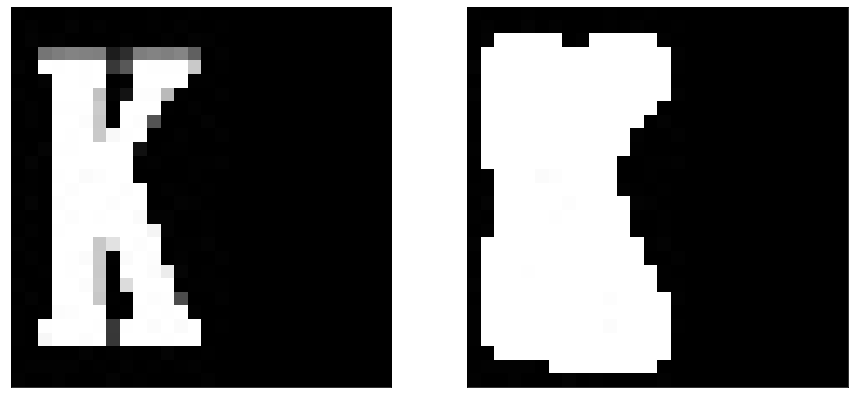

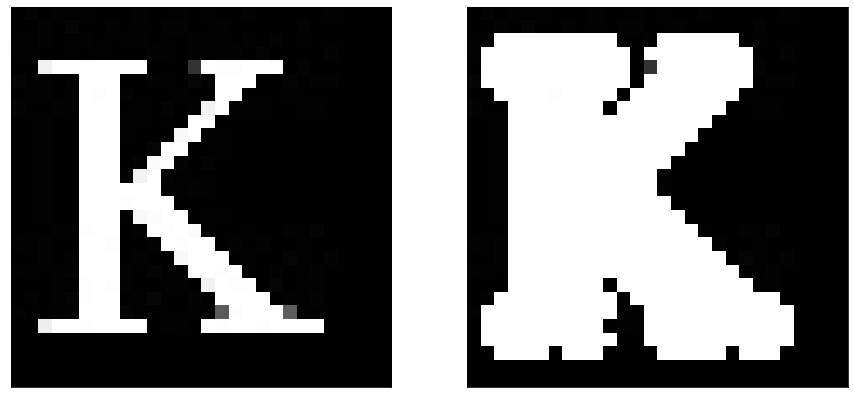

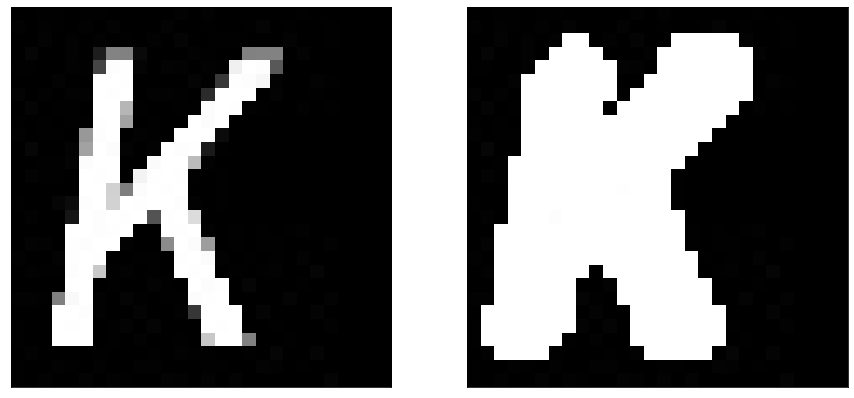

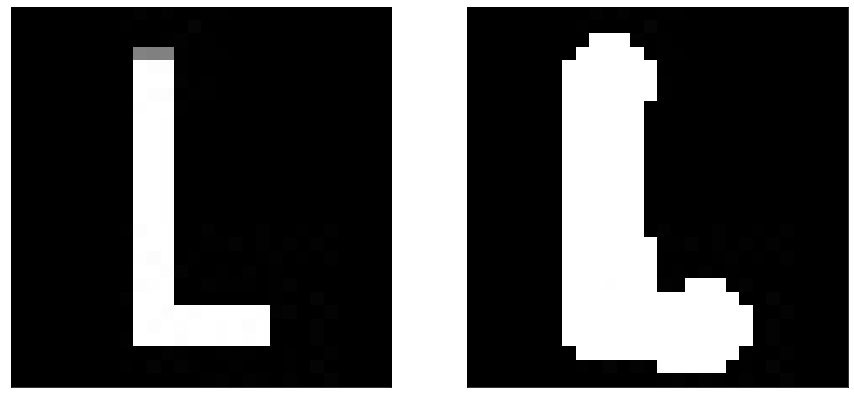

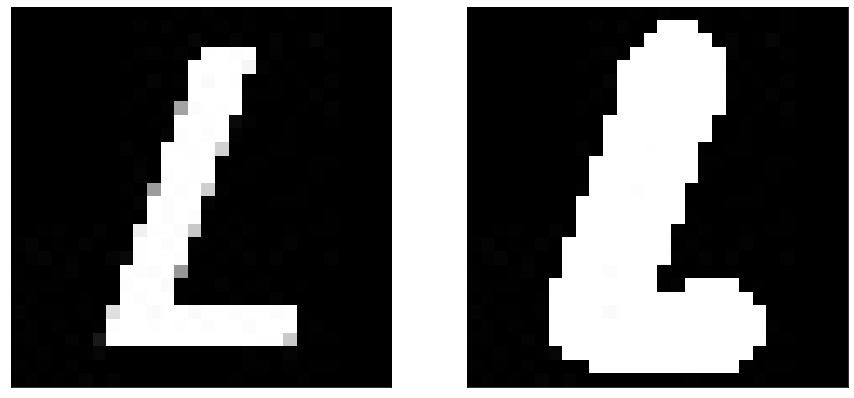

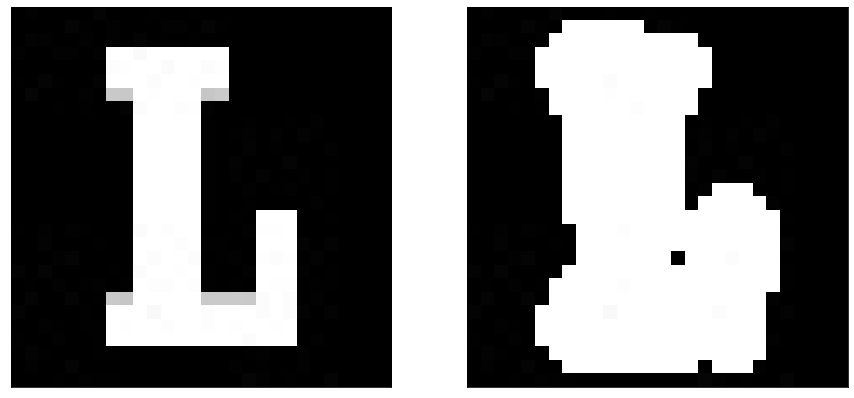

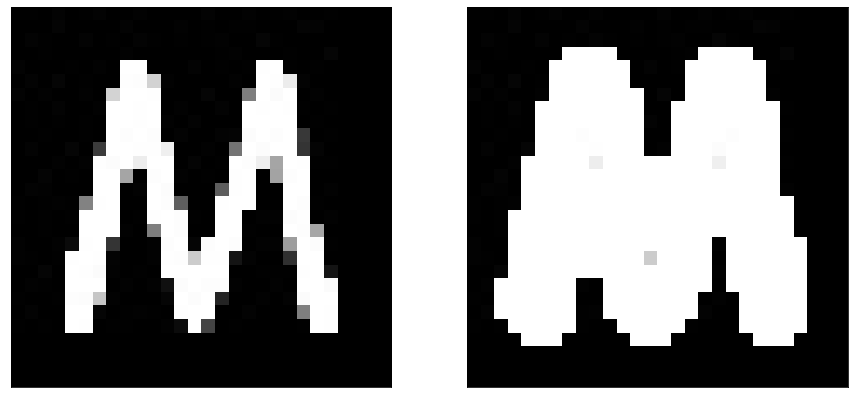

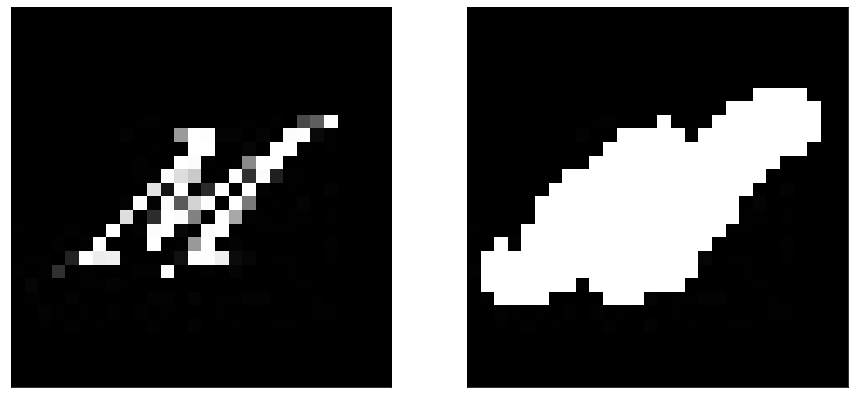

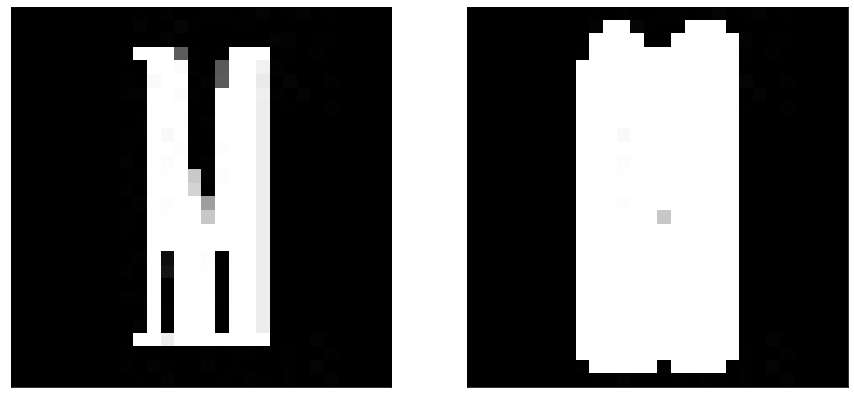

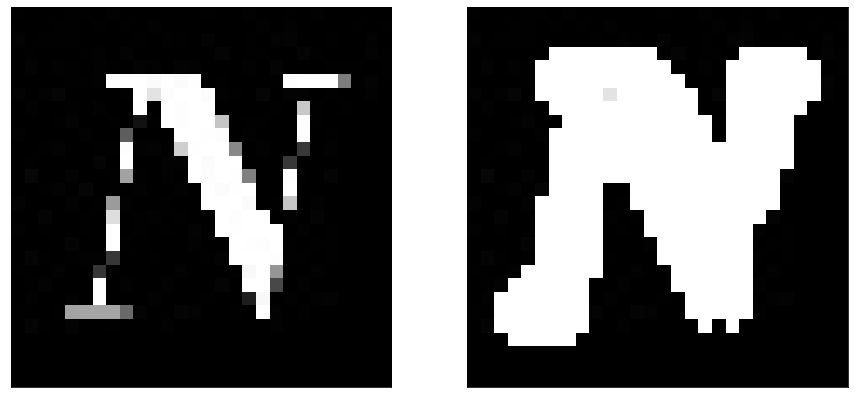

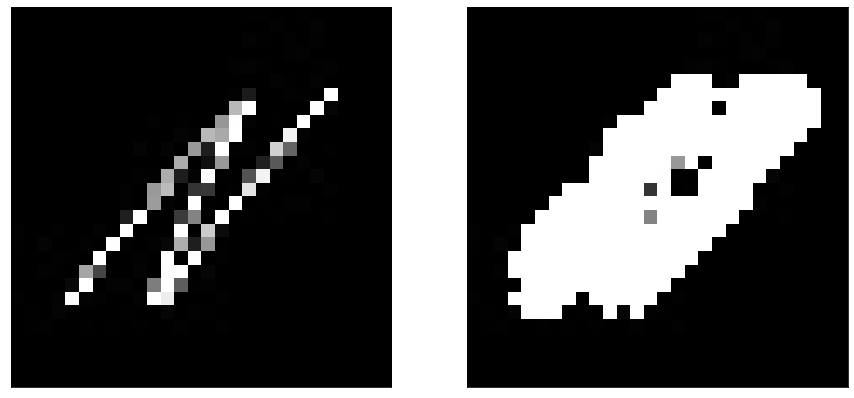

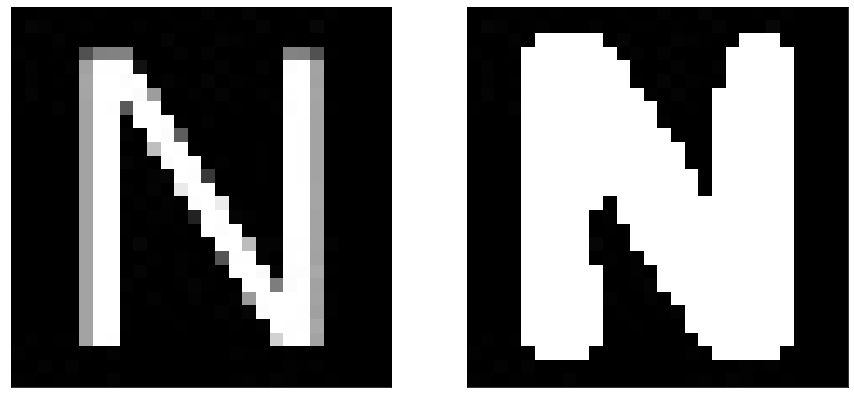

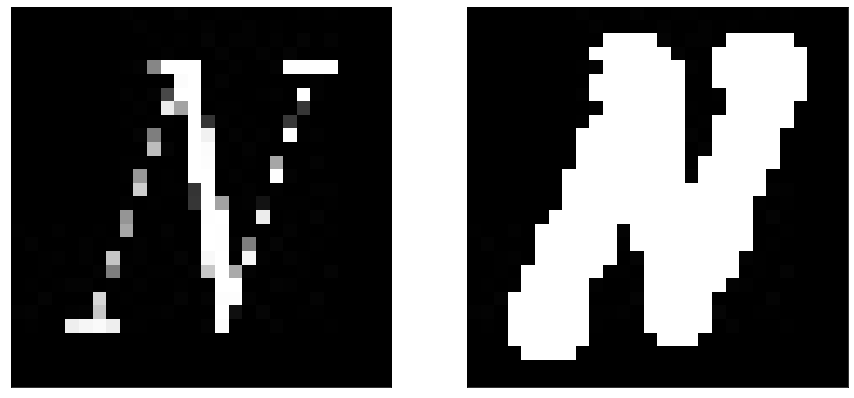

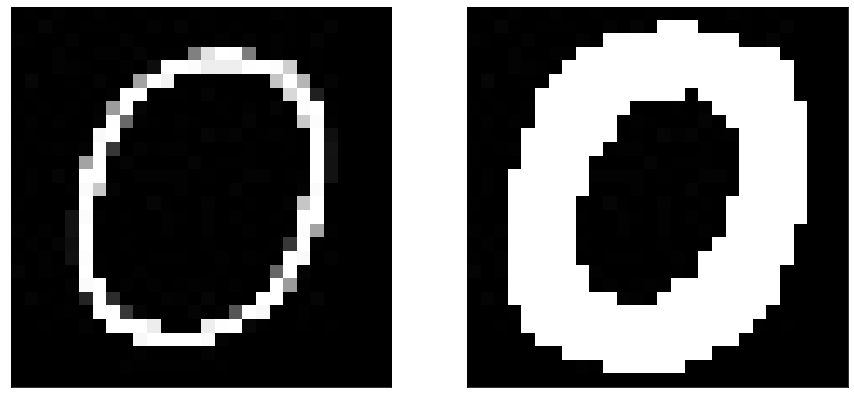

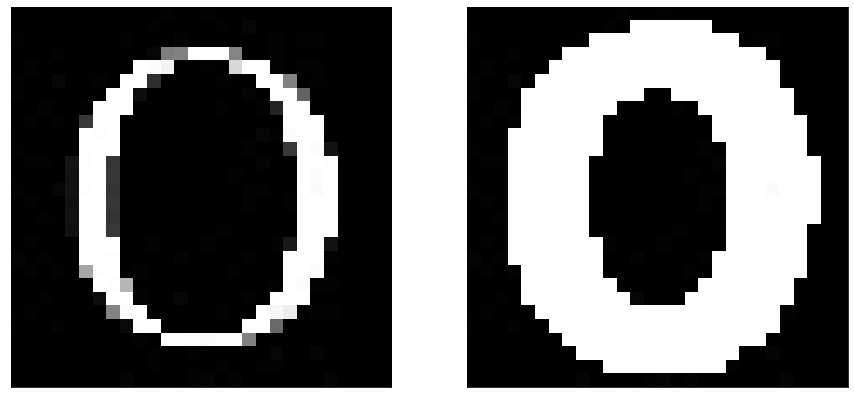

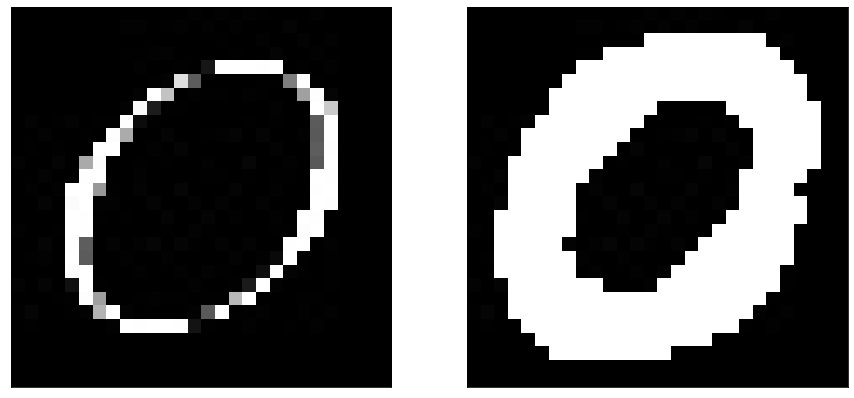

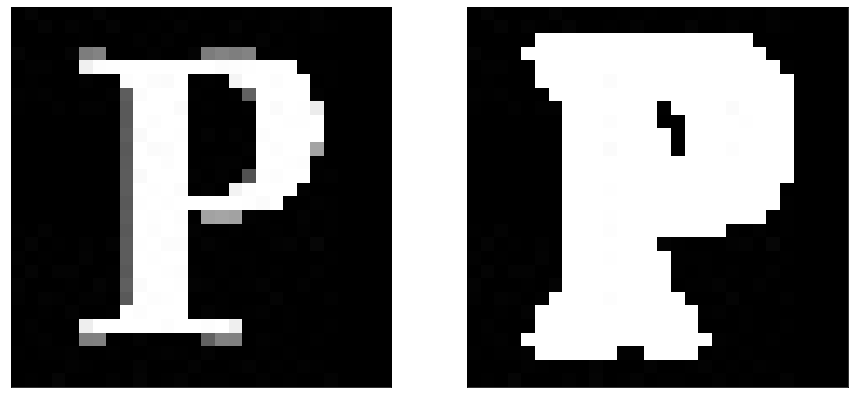

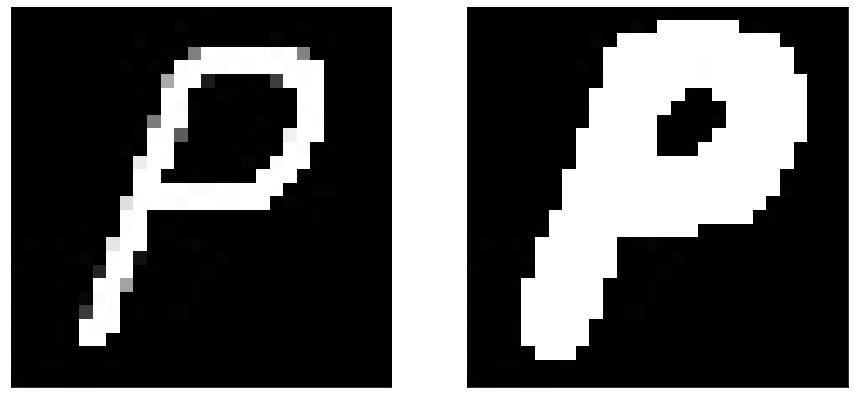

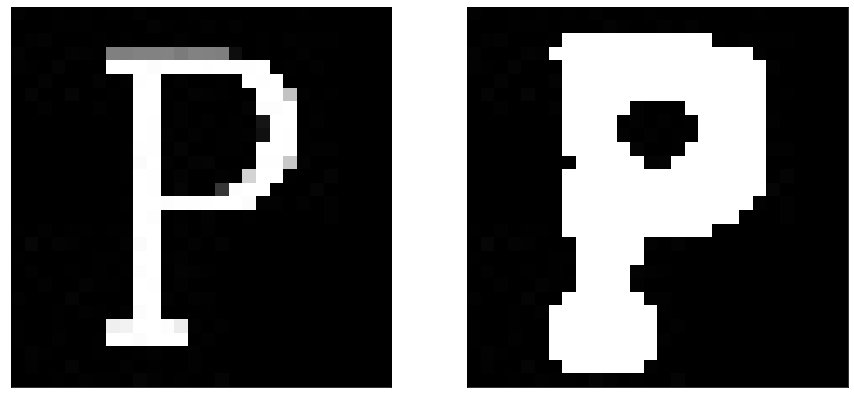

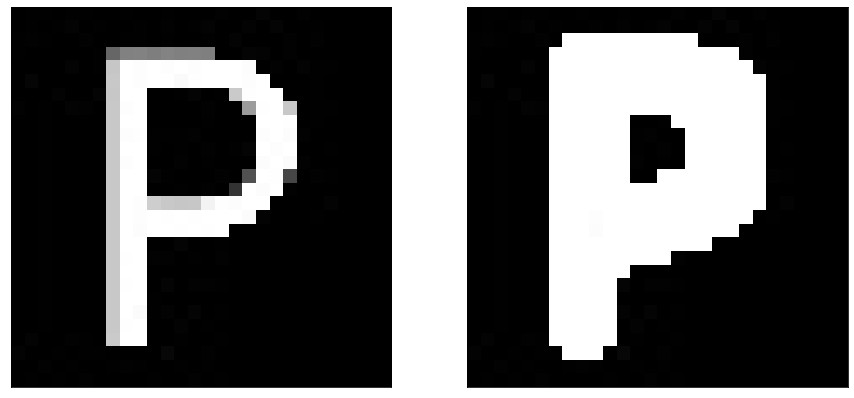

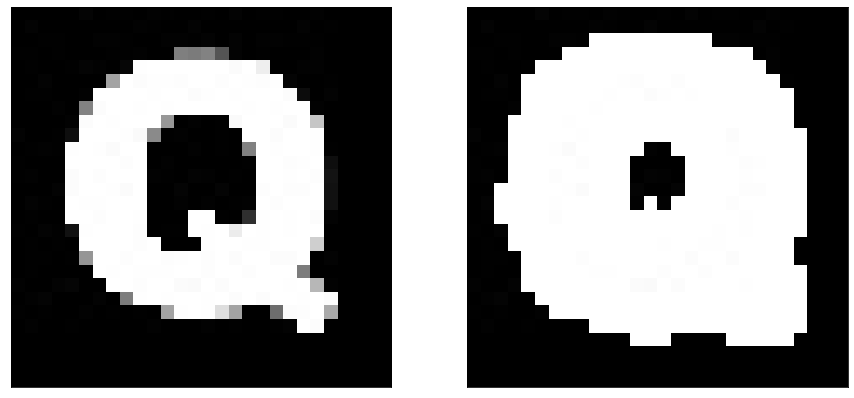

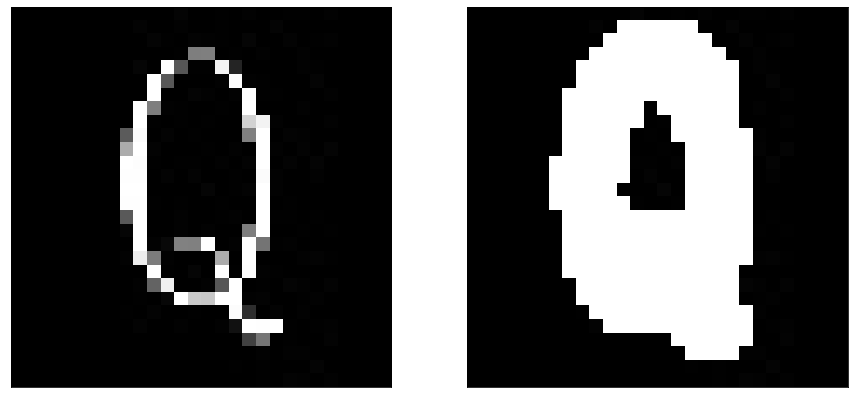

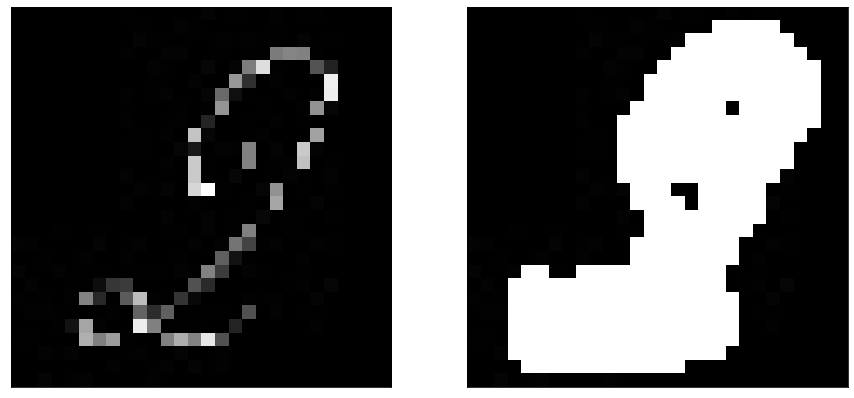

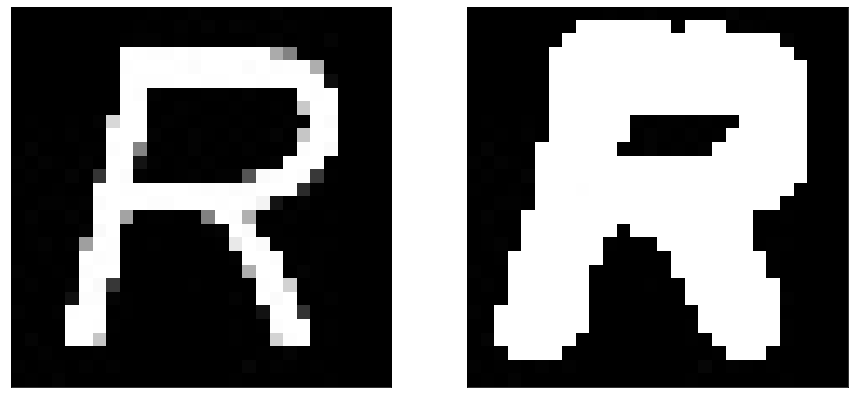

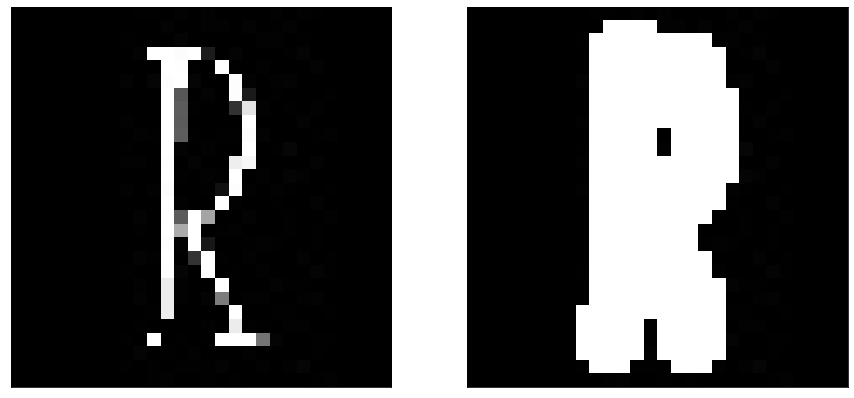

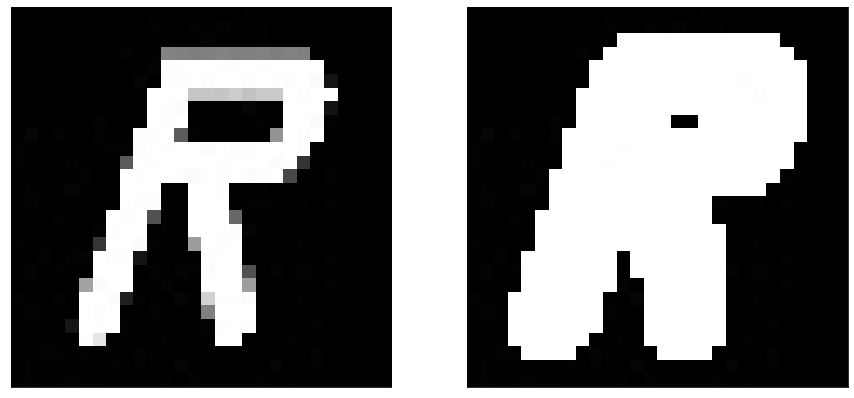

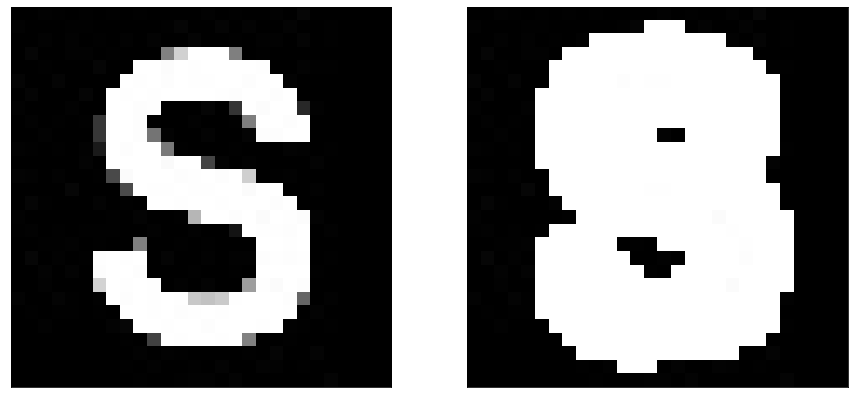

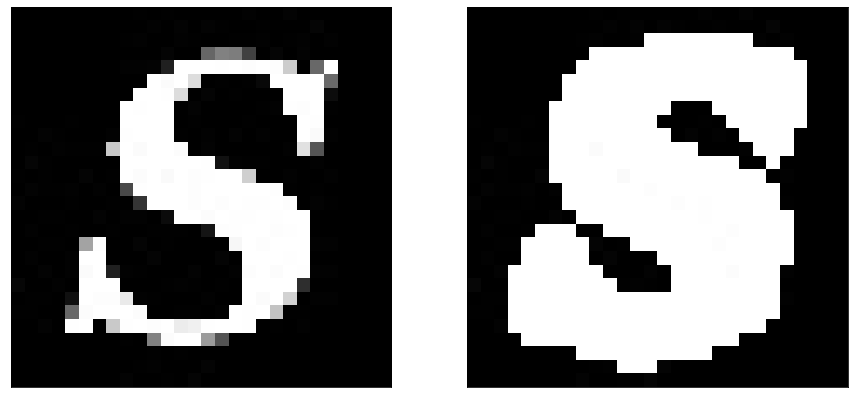

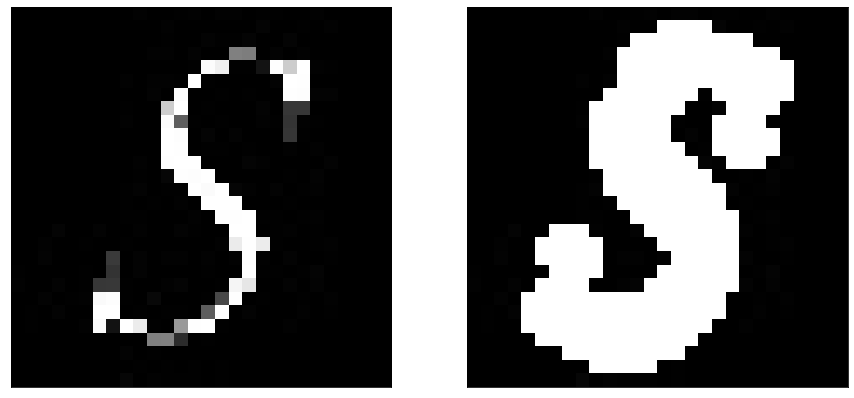

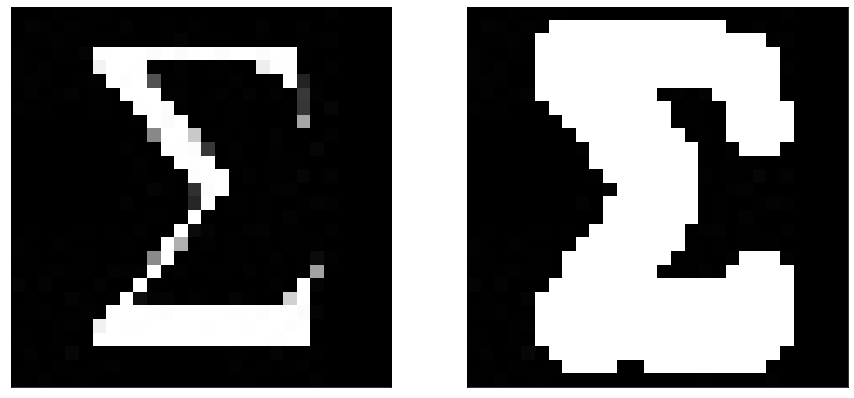

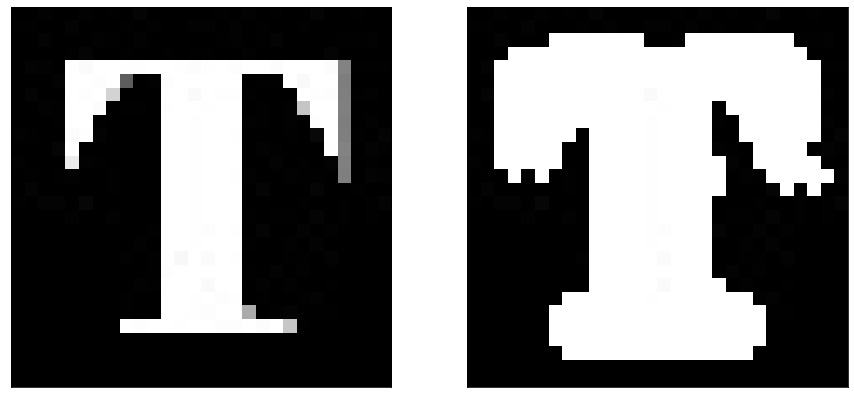

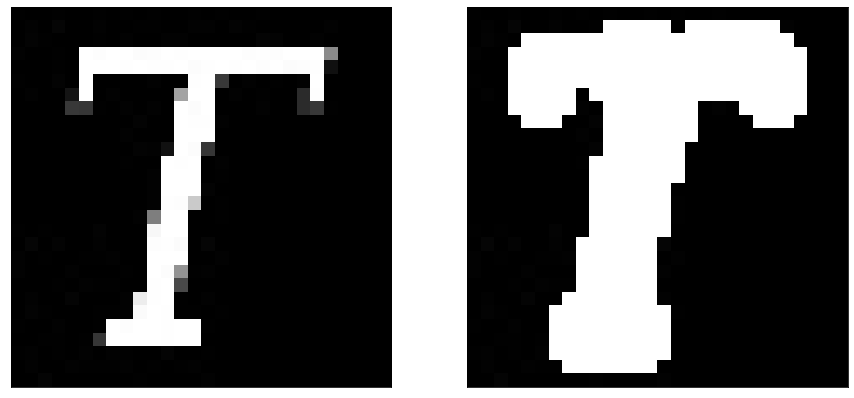

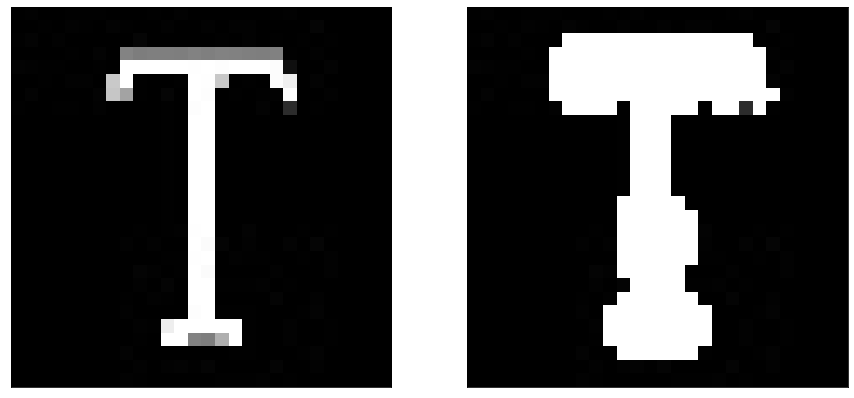

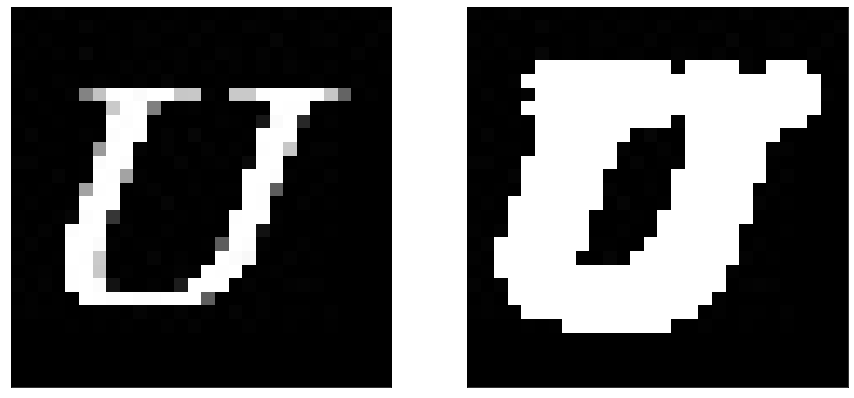

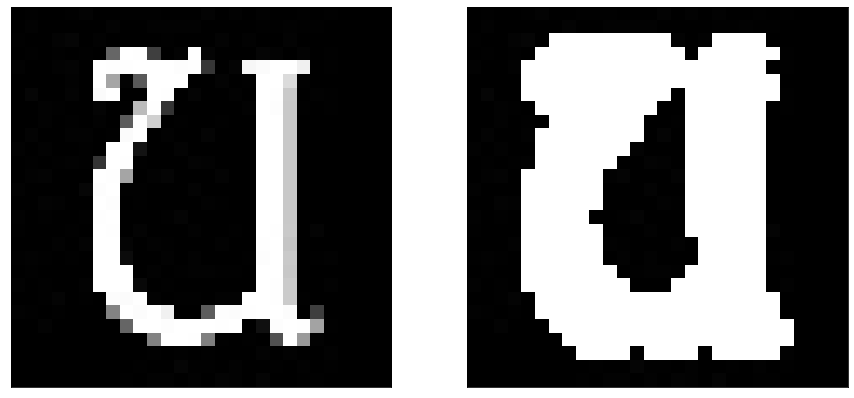

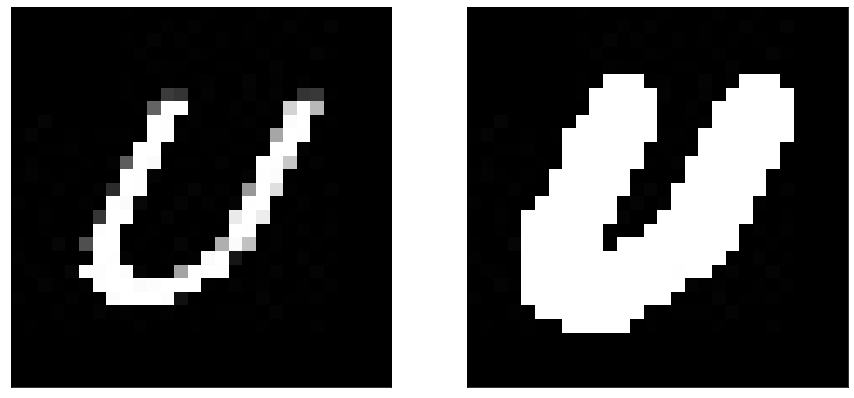

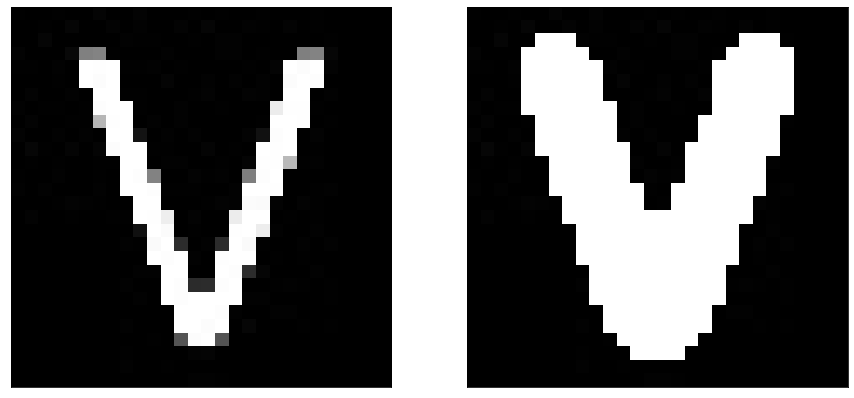

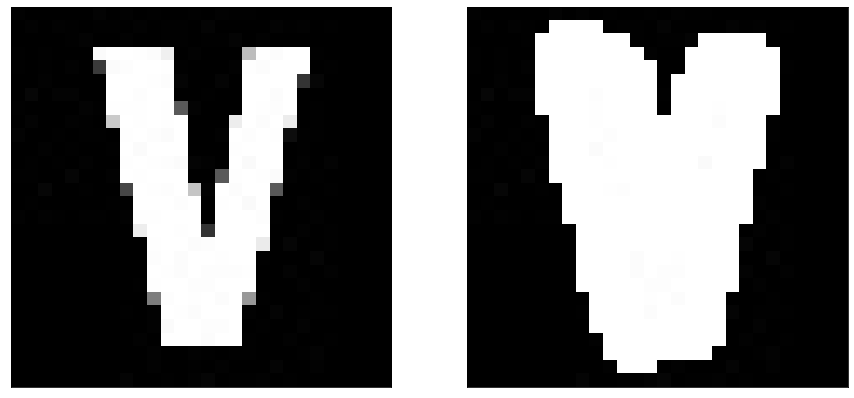

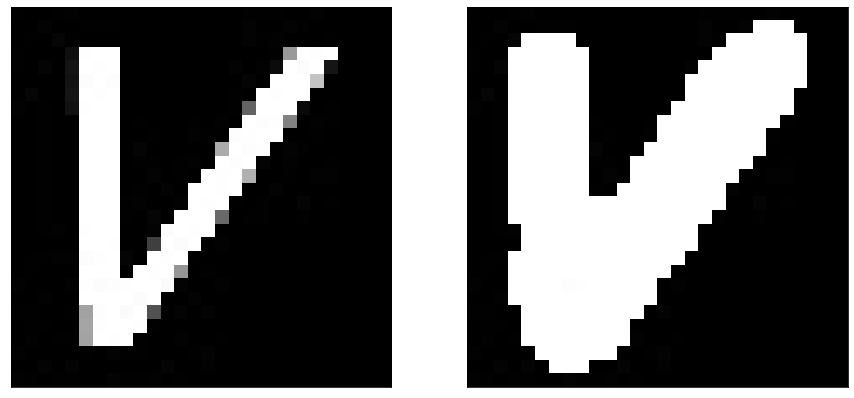

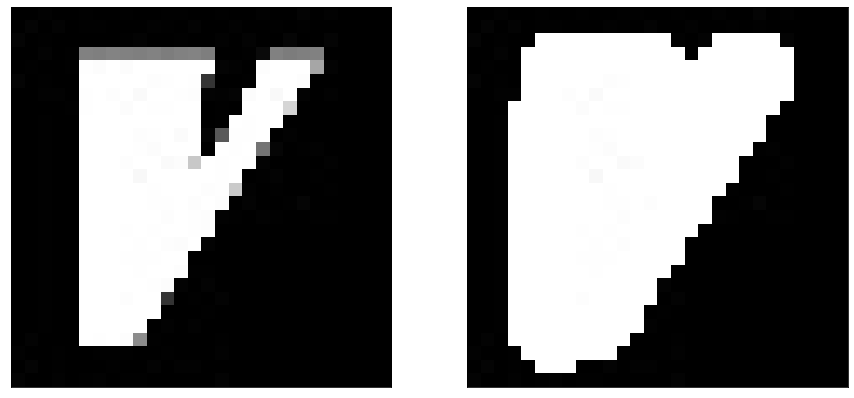

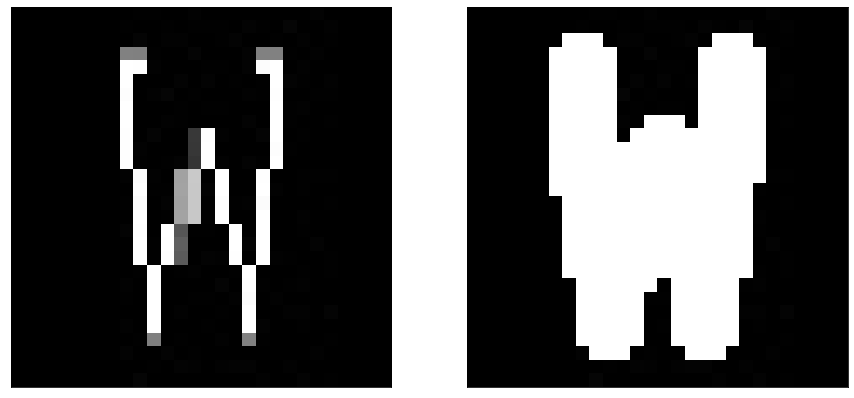

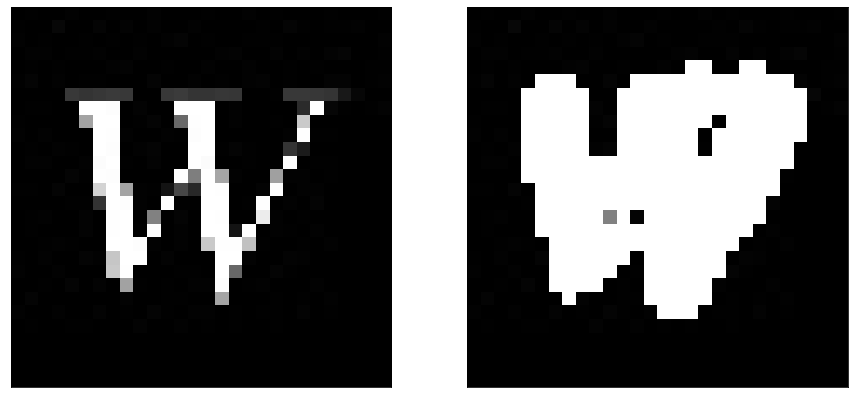

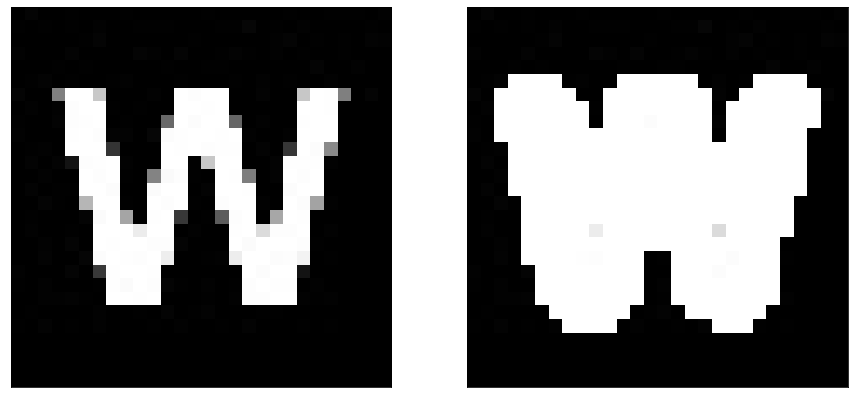

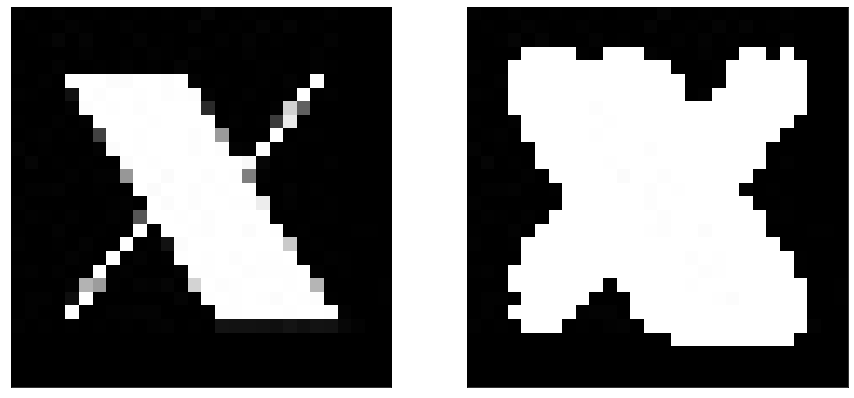

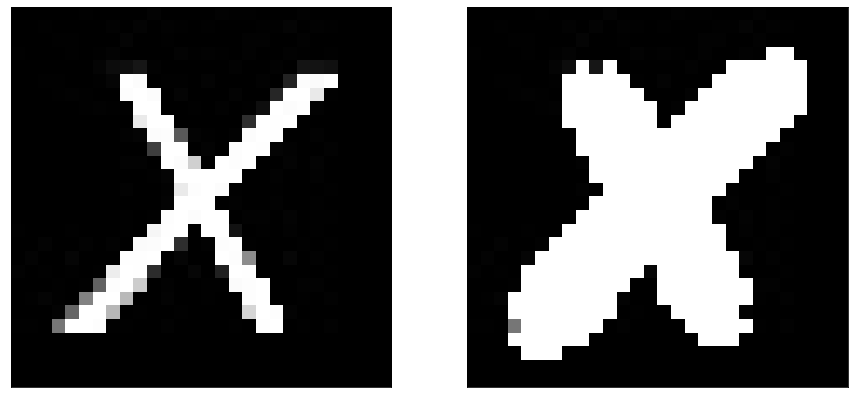

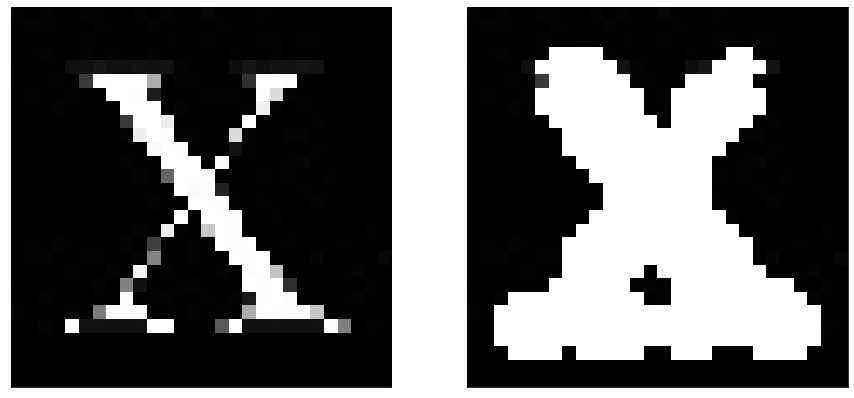

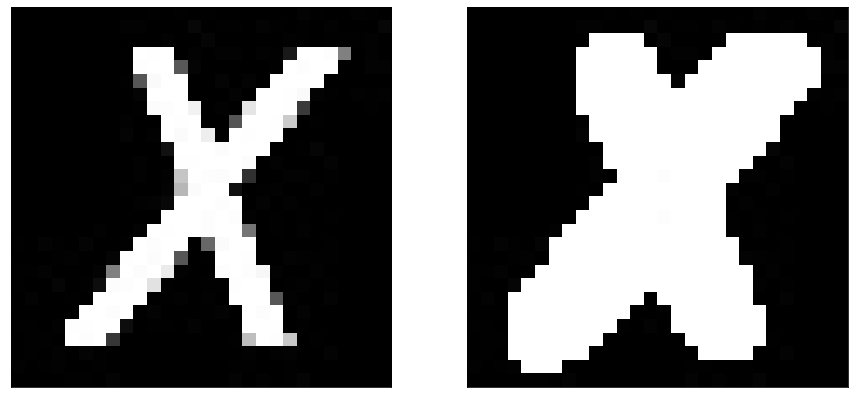

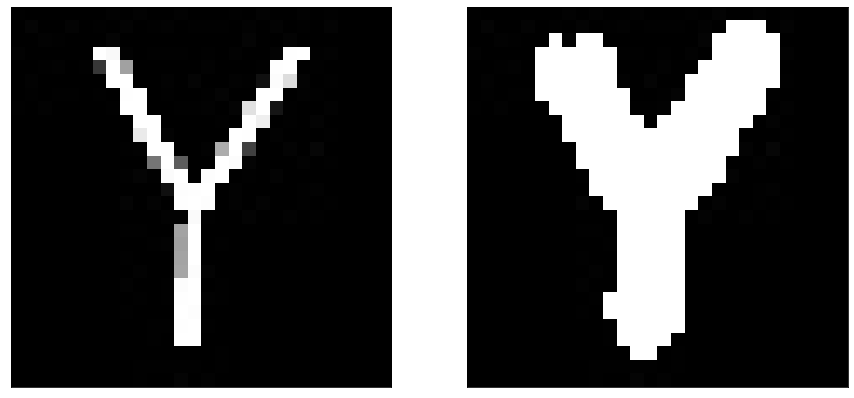

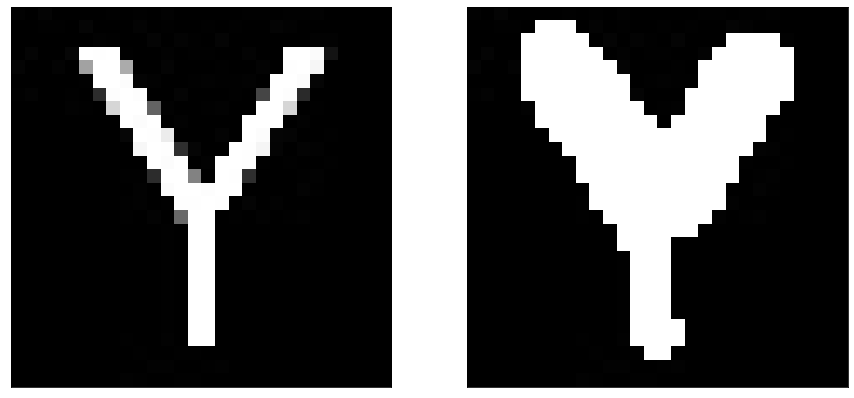

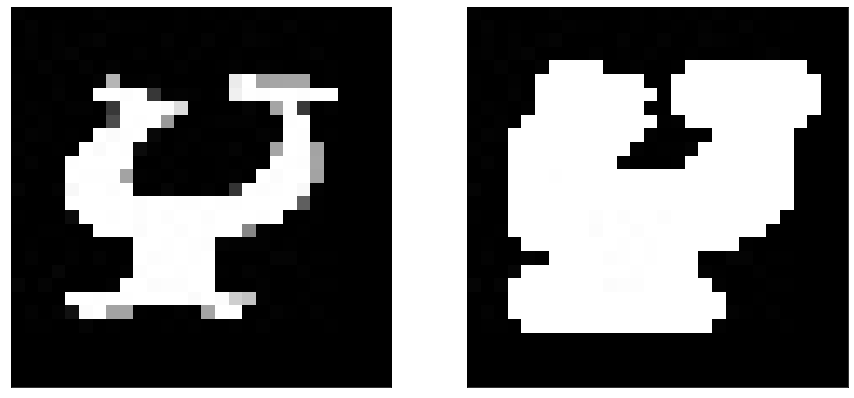

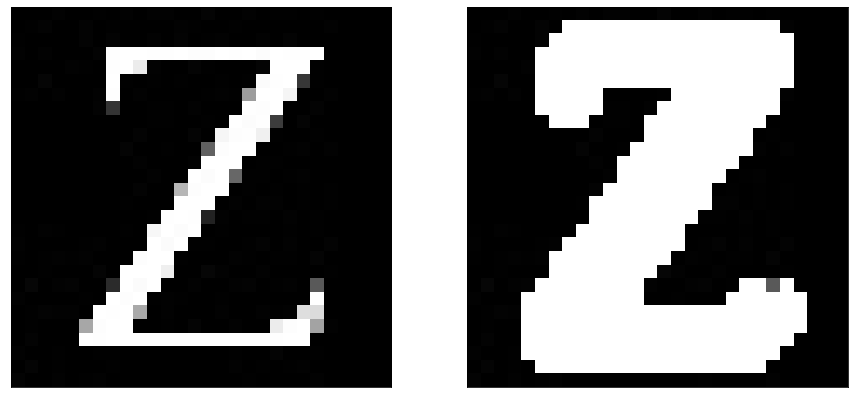

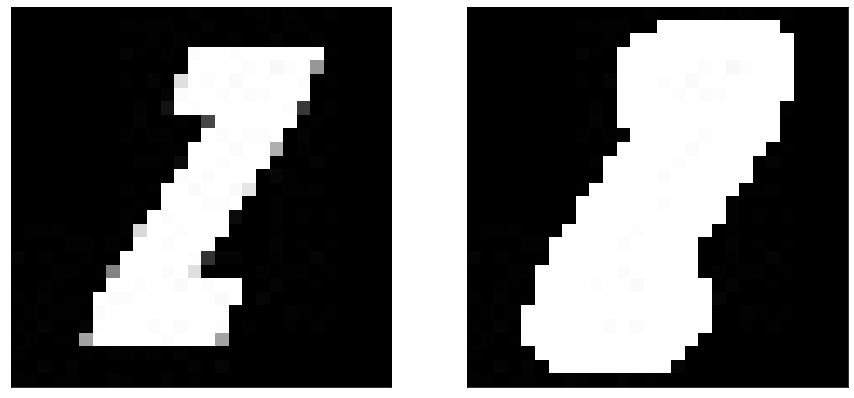

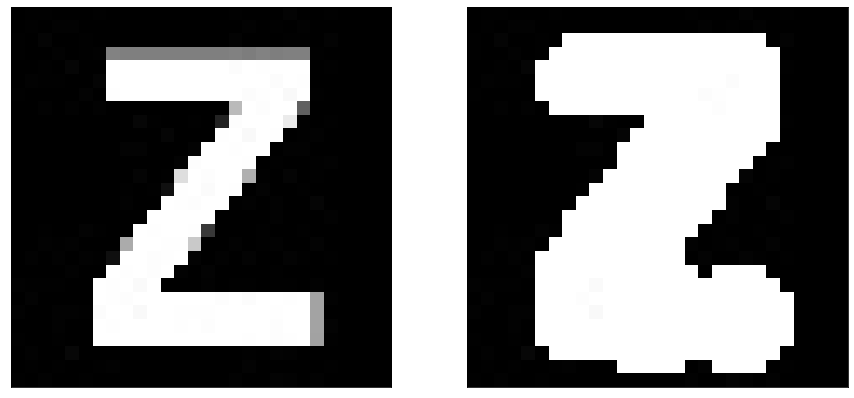

In [7]:
# for i in range(0,36575,300): 
#     edges1 = cv2.Canny(data[i], 30, 200)
#     cnts, new = cv2.findContours(edges1.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
#     image_copy = data[i].copy()
#     _ = cv2.drawContours(image_copy, cnts, -1, (255,0,255),2)
#     plot_images(data[i], image_copy)

Our target data contain the value from 0 to 9 and A to Z.

In [8]:
labels

array(['0', '0', '0', ..., 'Z', 'Z', 'Z'], dtype='<U1')

Sometime, image data have diffrent size like some images are in landscape and some are in portrait so, its good to check the size of the image. if its is not equal than we have to reshape the images. <br>
But, here,we get all images <b>28x28</b>. So we do not need to reshape it.

In [9]:
for i in range(0,36575,200):    
    print(data[i].shape)

(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(

Just look at image dimensions, confirm it's weather the images is byte <b>scaled</b> (0-255).
Here, we got min value 0 and max value 255.

In [10]:
for i in range(0,36575,200):    
    print(np.min(data[i]),np.max(data[i]))

0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 240
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 25

Here, we checked the shape of the data and we got 36576 rows(images) with the size of 28x28.

In [11]:
data.shape

(36576, 28, 28)

Same with the target variable, we got 36576 rows which is equal to corresponding data.

In [12]:
labels.shape

(36576,)

Here, we just checked missing values in the data.<br>
There is no null data in the data and labels

In [13]:
pd.isnull(labels).sum()

0

In [10]:
alphabets = ['0','1','2','3','4','5','6','7','8','9','A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']


In [11]:
dataset_classes = []
for cls in alphabets:
    dataset_classes.append([cls])

In [12]:
label_list = []
for i in labels:
    label_list.append([i])

# One hot encoding 

In [13]:
# One hot encoding                          As we have catagorical feature in our target variable
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(dataset_classes)
labels_ohe = ohe.transform(label_list).toarray() # So we transform the target data into binary form to get better result

In [14]:
labels_ohe            # encoded target variable

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

# Split the data

In [15]:
X_train, X_test, y_train, y_test = train_test_split(data, labels_ohe, test_size=0.20, random_state=42)

X_train = X_train.reshape(29260,28,28,1)
X_test = X_test.reshape(7316,28,28,1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(29260, 28, 28, 1)
(7316, 28, 28, 1)
(29260, 36)
(7316, 36)


# CNN Model

# Modeling 1

In [16]:
# CNN model
model1 = Sequential()
model1.add(Conv2D(32, (3, 3), padding='same', activation='tanh', input_shape=(28,28,1)))
model1.add(Conv2D(32, (3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Conv2D(64, (3, 3), padding='same', activation='tanh')) 
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.5))
model1.add(Flatten())
model1.add(Dense(512, activation='sigmoid'))
model1.add(Dropout(0.5))
model1.add(Dense(36, activation='softmax'))

In [17]:
model1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 26, 26, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 2, 2, 64)         

In [18]:
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model1 = model1.fit(X_train, y_train,validation_data=(X_test, y_test), epochs=6, batch_size=5)

Train on 29260 samples, validate on 7316 samples
Epoch 1/6
29260/29260 [==============================] - 259s 9ms/step - loss: 0.8289 - accuracy: 0.7744 - val_loss: 0.2574 - val_accuracy: 0.9247
Epoch 2/6
29260/29260 [==============================] - 256s 9ms/step - loss: 0.4359 - accuracy: 0.8777 - val_loss: 0.1988 - val_accuracy: 0.9374
Epoch 3/6
29260/29260 [==============================] - 261s 9ms/step - loss: 0.4017 - accuracy: 0.8862 - val_loss: 0.1969 - val_accuracy: 0.9410
Epoch 4/6
29260/29260 [==============================] - 264s 9ms/step - loss: 0.3995 - accuracy: 0.8859 - val_loss: 0.2182 - val_accuracy: 0.9322
Epoch 5/6
29260/29260 [==============================] - 266s 9ms/step - loss: 0.4216 - accuracy: 0.8818 - val_loss: 0.1833 - val_accuracy: 0.9437
Epoch 6/6
29260/29260 [==============================] - 266s 9ms/step - loss: 0.4105 - accuracy: 0.8861 - val_loss: 0.2057 - val_accuracy: 0.9369


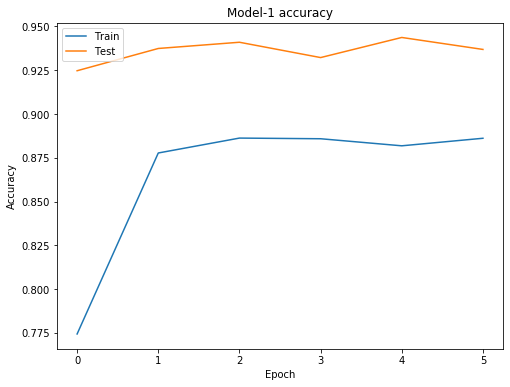

In [19]:
# Visualization
plt.figure(figsize=[8, 6])
plt.plot(model1.history['accuracy'])
plt.plot(model1.history['val_accuracy'])
plt.title('Model-1 accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

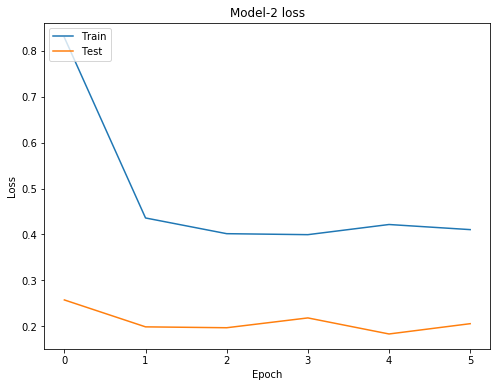

In [20]:
plt.figure(figsize=[8, 6])
plt.plot(model1.history['loss'])
plt.plot(model1.history['val_loss'])
plt.title('Model-2 loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Model-2

In [24]:
# CNN model
model2 = Sequential()
model2.add(Conv2D(32, (3, 3), padding='same', activation='tanh', input_shape=(28,28,1)))
model2.add(Conv2D(32, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Conv2D(64, (3, 3), padding='same', activation='tanh'))    

model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Flatten())
model2.add(Dense(512, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(36, activation='softmax'))

In [25]:
model2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 26, 26, 32)        9248      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 6, 6, 64)         

In [27]:
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model2History = model2.fit(X_train, y_train,validation_data=(X_test, y_test), epochs=5, batch_size=20)

Train on 29260 samples, validate on 7316 samples
Epoch 1/5
29260/29260 [==============================] - 304s 10ms/step - loss: 0.6161 - accuracy: 0.8331 - val_loss: 0.2079 - val_accuracy: 0.9356
Epoch 2/5
29260/29260 [==============================] - 299s 10ms/step - loss: 0.3079 - accuracy: 0.9113 - val_loss: 0.1770 - val_accuracy: 0.9459
Epoch 3/5
29260/29260 [==============================] - 306s 10ms/step - loss: 0.2723 - accuracy: 0.9207 - val_loss: 0.1580 - val_accuracy: 0.9496
Epoch 4/5
29260/29260 [==============================] - 311s 11ms/step - loss: 0.2464 - accuracy: 0.9270 - val_loss: 0.1398 - val_accuracy: 0.9549
Epoch 5/5
29260/29260 [==============================] - 312s 11ms/step - loss: 0.2397 - accuracy: 0.9286 - val_loss: 0.1315 - val_accuracy: 0.9604


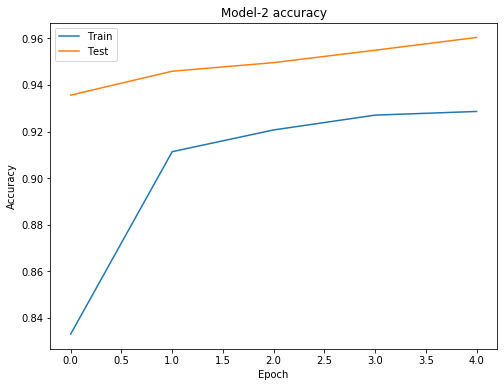

In [28]:
# Visualization
plt.figure(figsize=[8, 6])
plt.plot(model2History.history['accuracy'])
plt.plot(model2History.history['val_accuracy'])
plt.title('Model-2 accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

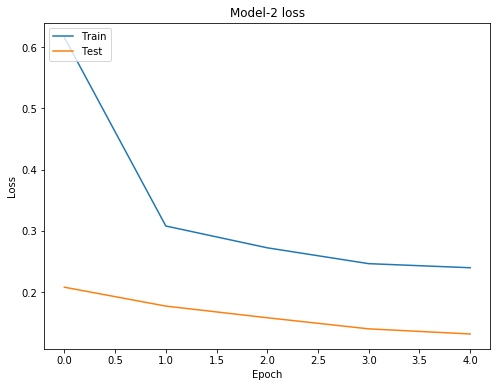

In [29]:
plt.figure(figsize=[8, 6])
plt.plot(model2History.history['loss'])
plt.plot(model2History.history['val_loss'])
plt.title('Model-2 loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Model-3

In [22]:
# CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))    
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(36, activation='softmax'))

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)         

In [24]:
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# history = model.fit(X_train, y_train,validation_data=(X_test, y_test), epochs=20, batch_size=64)
# model.save('cnn_classifier.h5')

Train on 29260 samples, validate on 7316 samples
Epoch 1/20
29260/29260 [==============================] - 235s 8ms/step - loss: 2.2234 - accuracy: 0.3837 - val_loss: 0.4365 - val_accuracy: 0.8792
Epoch 2/20
29260/29260 [==============================] - 231s 8ms/step - loss: 0.6279 - accuracy: 0.8193 - val_loss: 0.2878 - val_accuracy: 0.9157
Epoch 3/20
29260/29260 [==============================] - 217s 7ms/step - loss: 0.4425 - accuracy: 0.8725 - val_loss: 0.2206 - val_accuracy: 0.9385
Epoch 4/20
29260/29260 [==============================] - 227s 8ms/step - loss: 0.3562 - accuracy: 0.8964 - val_loss: 0.1944 - val_accuracy: 0.9422
Epoch 5/20
29260/29260 [==============================] - 232s 8ms/step - loss: 0.3192 - accuracy: 0.9061 - val_loss: 0.1846 - val_accuracy: 0.9442
Epoch 6/20
29260/29260 [==============================] - 253s 9ms/step - loss: 0.2833 - accuracy: 0.9141 - val_loss: 0.1608 - val_accuracy: 0.9516
Epoch 7/20
29260/29260 [==============================] - 291s 

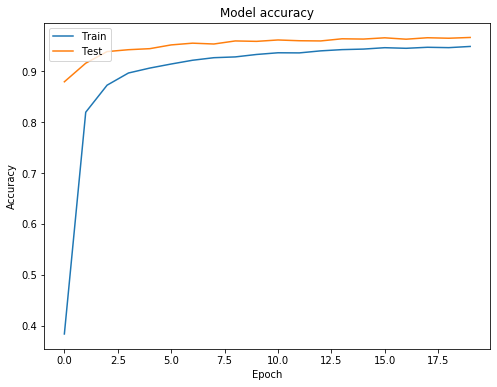

In [27]:
# Visualization
plt.figure(figsize=[8, 6])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

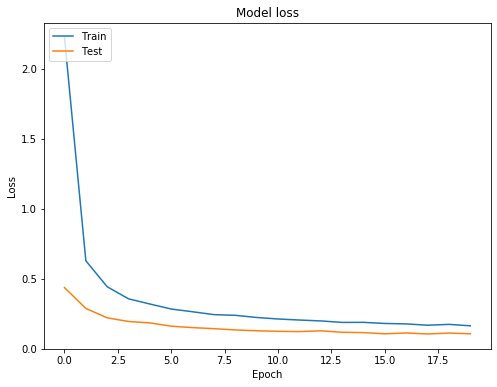

In [28]:
plt.figure(figsize=[8, 6])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

# Model for Detecting the number plate

(600, 1000)


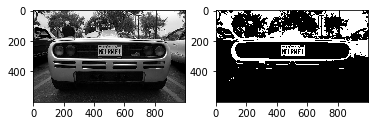

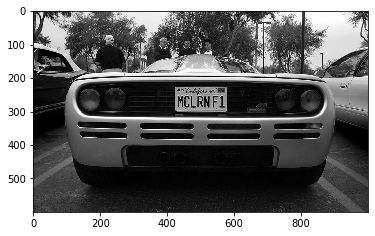

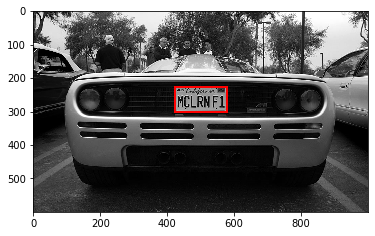

In [6]:
from skimage.io import imread
from skimage.filters import threshold_otsu
car_image = imread("car.png", as_gray=True)
# it should be a 2 dimensional array
print(car_image.shape)

# the next line is not compulsory however, a grey scale pixel
# in skimage ranges between 0 & 1. multiplying it with 255
# will make it range between 0 & 255 (something we can relate better with

gray_car_image = car_image * 255
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(gray_car_image, cmap="gray")
threshold_value = threshold_otsu(gray_car_image)
binary_car_image = gray_car_image > threshold_value
# print(binary_car_image)
ax2.imshow(binary_car_image, cmap="gray")
# ax2.imshow(gray_car_image, cmap="gray")
plt.show()

# CCA (finding connected regions) of binary image


from skimage import measure
from skimage.measure import regionprops
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# this gets all the connected regions and groups them together
label_image = measure.label(binary_car_image)

# print(label_image.shape[0]) #width of car img

# getting the maximum width, height and minimum width and height that a license plate can be
plate_dimensions = (0.03*label_image.shape[0], 0.08*label_image.shape[0], 0.15*label_image.shape[1], 0.3*label_image.shape[1])
plate_dimensions2 = (0.08*label_image.shape[0], 0.2*label_image.shape[0], 0.15*label_image.shape[1], 0.4*label_image.shape[1])
min_height, max_height, min_width, max_width = plate_dimensions
plate_objects_cordinates = []
plate_like_objects = []

fig, (ax1) = plt.subplots(1)
ax1.imshow(gray_car_image, cmap="gray")
flag =0
# regionprops creates a list of properties of all the labelled regions
for region in regionprops(label_image):
    # print(region)
    if region.area < 50:
        #if the region is so small then it's likely not a license plate
        continue
        # the bounding box coordinates
    min_row, min_col, max_row, max_col = region.bbox
    # print(min_row)
    # print(min_col)
    # print(max_row)
    # print(max_col)

    region_height = max_row - min_row
    region_width = max_col - min_col
    # print(region_height)
    # print(region_width)

    # ensuring that the region identified satisfies the condition of a typical license plate
    if region_height >= min_height and region_height <= max_height and region_width >= min_width and region_width <= max_width and region_width > region_height:
        flag = 1
        plate_like_objects.append(binary_car_image[min_row:max_row,
                                  min_col:max_col])
        plate_objects_cordinates.append((min_row, min_col,
                                         max_row, max_col))
        rectBorder = patches.Rectangle((min_col, min_row), max_col - min_col, max_row - min_row, edgecolor="red",
                                       linewidth=2, fill=False)
        ax1.add_patch(rectBorder)
        # let's draw a red rectangle over those regions
if(flag == 1):
    # print(plate_like_objects[0])
    plt.show()




if(flag==0):
    min_height, max_height, min_width, max_width = plate_dimensions2
    plate_objects_cordinates = []
    plate_like_objects = []

    fig, (ax1) = plt.subplots(1)
    ax1.imshow(gray_car_image, cmap="gray")

    # regionprops creates a list of properties of all the labelled regions
    for region in regionprops(label_image):
        if region.area < 50:
            #if the region is so small then it's likely not a license plate
            continue
            # the bounding box coordinates
        min_row, min_col, max_row, max_col = region.bbox
        # print(min_row)
        # print(min_col)
        # print(max_row)
        # print(max_col)

        region_height = max_row - min_row
        region_width = max_col - min_col
        # print(region_height)
        # print(region_width)

        # ensuring that the region identified satisfies the condition of a typical license plate
        if region_height >= min_height and region_height <= max_height and region_width >= min_width and region_width <= max_width and region_width > region_height:
            # print("hello")
            plate_like_objects.append(binary_car_image[min_row:max_row,
                                      min_col:max_col])
            plate_objects_cordinates.append((min_row, min_col,
                                             max_row, max_col))
            rectBorder = patches.Rectangle((min_col, min_row), max_col - min_col, max_row - min_row, edgecolor="red",
                                           linewidth=2, fill=False)
            ax1.add_patch(rectBorder)
            # let's draw a red rectangle over those regions
    # print(plate_like_objects[0])
    plt.show()

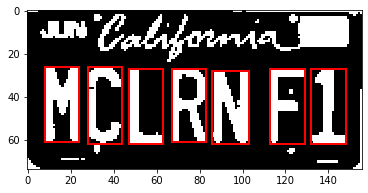

In [7]:
import numpy as np
from skimage.transform import resize
from skimage import measure
from skimage.measure import regionprops
import matplotlib.patches as patches
import matplotlib.pyplot as plt
#import DetectPlate

# The invert was done so as to convert the black pixel to white pixel and vice versa
license_plate = np.invert(plate_like_objects[0])

labelled_plate = measure.label(license_plate)

fig, ax1 = plt.subplots(1)
ax1.imshow(license_plate, cmap="gray")
# the next two lines is based on the assumptions that the width of
# a license plate should be between 5% and 15% of the license plate,
# and height should be between 35% and 60%
# this will eliminate some
character_dimensions = (0.35*license_plate.shape[0], 0.60*license_plate.shape[0], 0.05*license_plate.shape[1], 0.15*license_plate.shape[1])
min_height, max_height, min_width, max_width = character_dimensions

characters = []
counter=0
column_list = []
for regions in regionprops(labelled_plate):
    y0, x0, y1, x1 = regions.bbox
    region_height = y1 - y0
    region_width = x1 - x0

    if region_height > min_height and region_height < max_height and region_width > min_width and region_width < max_width:
        roi = license_plate[y0:y1, x0:x1]

        # draw a red bordered rectangle over the character.
        rect_border = patches.Rectangle((x0, y0), x1 - x0, y1 - y0, edgecolor="red",
                                       linewidth=2, fill=False)
        ax1.add_patch(rect_border)

        # resize the characters to 20X20 and then append each character into the characters list
        resized_char = resize(roi, (20, 20))
        characters.append(resized_char)

        # this is just to keep track of the arrangement of the characters
        column_list.append(x0)
# print(characters)
plt.show()

In [10]:
#import SegmentCharacters
import pickle
# print("Loading model")
filename = './finalized_model.sav'
model = pickle.load(open(filename, 'rb'))

# print('Model loaded. Predicting characters of number plate')
classification_result = []
for each_character in characters:
    # converts it to a 1D array
    each_character = each_character.reshape(1, -1);
    result = model.predict(each_character)
    classification_result.append(result)

# print('Classification result')
# print(classification_result)

plate_string = ''
for eachPredict in classification_result:
    plate_string += eachPredict[0]

print('Predicted license plate')
print(plate_string)

# it's possible the characters are wrongly arranged
# since that's a possibility, the column_list will be
# used to sort the letters in the right order

column_list_copy = column_list[:]
column_list.sort()
rightplate_string = ''
for each in column_list:
    rightplate_string += plate_string[column_list_copy.index(each)]

# print('License plate')
# print(rightplate_string)

Predicted license plate
MCLRF1N


In [36]:
DF = pd.read_csv("number_dataframe.csv")

In [37]:
DF

,name,number,year,color
0,BMW i8,MCLRF1N,1995,black


In [54]:
getNumber = []
for i in DF['number']:
    getNumber = i

In [55]:
getNumber

'MCLRF1N'

In [56]:
if plate_string == getNumber:
    print("Vehicle has found")
else:
    print("Vehicle is not found")

Vehicle has found
